---
<div align="center">

#  **Trabajo Fin de Master**

## **Sistema Híbrido de Proyección de Trayectorias de Carrera en Baseball: Integración de Clustering y Series Temporales para la Predicción de Performance**
</div>

<div align="center">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRJwgy7d4BlYXlHCOxbKQtZwD7lB5esQW2Hw&s" alt="Escudo Universidad Complutense de Madrid" width="150"/>

**Universidad Complutense de Madrid**  
**Máster en Data Science / Analítica Avanzada**

**Autor:** Sergio Grigorow  
**Tutores:** Carlos Ortega y Santiago Mota  
**Curso Académico:** 2024-2025
</div>

---

## **Introducción**

El baseball profesional ha experimentado una revolución analítica en las últimas dos décadas, transformando fundamentalmente cómo los front offices evalúan talento, planifican estrategias y toman decisiones de personal. Sin embargo, a pesar de los avances significativos en sabermetrics, persiste una brecha crítica entre la sofistication de los datos disponibles y la capacidad de los sistemas actuales para generar predicciones robustas del rendimiento futuro de jugadores.

### **El Problema de la Predicción en Baseball**

Los front offices de MLB invierten cientos de millones de dólares anuales en contratos de jugadores basándose en proyecciones que frecuentemente dependen de métodos subjetivos o sistemas predictivos que no capturan adecuadamente la complejidad multidimensional del talento deportivo. La falta de herramientas cuantitativas que integren tanto patrones históricos de arquetipos similares como trayectorias individuales específicas resulta en:

- **Contratos sobrevaluados** por decline no anticipado en jugadores veteranos
- **Oportunidades perdidas** en free agency por evaluación insuficiente de potential upside
- **Planificación de roster subóptima** basada en intuición versus análisis cuantitativo riguroso
- **Gestión de riesgo inadecuada** sin cuantificación de incertidumbre en proyecciones

### **Innovación del Enfoque Híbrido**

Este trabajo desarrolla un sistema predictivo revolucionario que combina lo mejor de dos mundos analíticos: el poder del clustering no supervisado para identificar arquetipos naturales de jugadores con la precisión de modelos de regresión individualizados que capturan patrones específicos de desarrollo y aging. Esta arquitectura híbrida representa una evolución significativa más allá de sistemas tradicionales que dependen exclusivamente de uno u otro enfoque.

### **Contribuciones Técnicas y Metodológicas**

El sistema introduce varias innovaciones metodológicas críticas:

**Corrección del Sesgo de Supervivencia**: Implementamos el "método Delta" para análisis de aging curves, eliminando el sesgo sistemático que sobreestima el rendimiento de jugadores veteranos en análisis tradicionales.

**Clustering con Features de Aging**: Incorporamos pendientes pre/post-peak y métricas de longevidad en el clustering, capturando no solo rendimiento actual sino patrones de carrera completos.

**Feature Engineering Avanzado**: Desarrollamos variables que capturen momentum, volatilidad histórica, y interacciones no-lineales críticas para predicción de rendimiento deportivo.

**Cuantificación de Incertidumbre**: Proporcionamos rangos de confianza basados en errores empíricos por arquetipo, enabling risk-adjusted decision making para front offices.

### **Alcance y Objetivos**

Este trabajo abarca 152 años de datos históricos de baseball (1871-2023), procesando más de 113,000 registros jugador-temporada para crear un sistema que:

- **Identifique automáticamente** arquetipos distintivos de jugadores basados en patrones de rendimiento y aging
- **Proporcione rangos de confianza** para gestión cuantitativa de riesgo contractual
- **Ofrezca herramientas productivas** ready for deployment en entornos reales de toma de decisiones

### **Relevancia para la Industria**

Los resultados de este sistema tienen implicaciones directas para la evaluación de cientos de millones de dólares en decisiones de personal annual en MLB. Con contratos individuales que frecuentemente exceden $300M+ y decisiones de roster que determinan competitividad organizacional, incluso mejoras marginales en precisión predictiva generan value económico masivo.

### **Estructura del Trabajo**

El desarrollo procede sistemáticamente desde exploración de datos y feature engineering, pasando por clustering de arquetipos y desarrollo de modelos de regresión, hasta la integración en un sistema híbrido completamente operacional. Cada sección builds rigor metodológico mientras maintains focus en aplicabilidad práctica para stakeholders reales en el baseball profesional.

---



# **Sección 1: Configuración del Entorno de Trabajo**

## Objetivo
Establecer el entorno de trabajo necesario para el análisis, cargando todas las librerías requeridas para manipulación de datos, visualización, machine learning y análisis estadístico.

## Componentes Principales
- **Manipulación de datos**: pandas, numpy para el procesamiento de datasets de baseball
- **Visualización**: matplotlib, seaborn para gráficos exploratorios y presentación de resultados
- **Machine Learning**: scikit-learn, XGBoost para modelos predictivos y clustering
- **Análisis estadístico**: scipy.stats para análisis de curvas de envejecimiento

## Metodología
Se implementa una configuración estandarizada que:
- Suprime warnings para mantener limpia la salida
- Establece estilos visuales consistentes
- Define la ruta de datos para facilitar la carga posterior

Esta configuración garantiza la reproducibilidad del análisis y prepara el entorno para las fases posteriores del proyecto.

In [2]:
#==================================
# SECCIÓN 1: CONFIGURACIÓN DEL ENTORNO
#==================================

# Librerías fundamentales para análisis de datos
import pandas as pd
import numpy as np
from scipy import stats

# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Machine Learning - Clustering y preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Machine Learning - Modelos predictivos
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GroupKFold 

# Validación y evaluación de modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Manejo de datos y archivos
import os 
import gdown 

# Configuración de advertencias y estilos
import warnings # Para manejar advertencias
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Guardar y cargar modelos
import pickle
import json

# Manejo de fechas y tiempos
from datetime import datetime

# Configuración de paths - detecta automáticamente el entorno
if os.path.exists("data"):
    DATA_PATH = "data"
elif os.path.exists("./data"):
    DATA_PATH = "./data"
else:
    # Fallback para desarrollo local
    DATA_PATH = r"C:\Users\sergi\OneDrive\Documentos\Sergio\Master Data Science\17. TRABAJO FIN DE MASTER\Jupiter\data"
    
print(f"Usando DATA_PATH: {DATA_PATH}")

print("✅ Librerías cargadas correctamente")

Usando DATA_PATH: data
✅ Librerías cargadas correctamente


---

<div style="page-break-before: always;"></div>

# 💾  **SECCIÓN 2: Carga y Verificación de Datasets**
---

En esta sección establecemos la base de datos fundamental del proyecto mediante la carga de los datasets históricos de baseball de la base Lahman. Nuestro objetivo es comprender la estructura, calidad y alcance de los datos disponibles para construir nuestro sistema predictivo.  

Trabajaremos con tres datasets principales que capturan diferentes dimensiones del baseball profesional: las estadísticas ofensivas por jugador-temporada (Batting), la información biográfica de los jugadores (People), y el rendimiento agregado por equipos (Teams). Esta exploración inicial nos permitirá identificar la riqueza temporal de los datos (152 años de historia), evaluar la completitud de la información, y detectar posibles inconsistencias que requieran tratamiento especial.  

La metodología se centra en un análisis descriptivo exhaustivo: examinaremos las dimensiones de cada dataset, identificaremos patrones de valores faltantes, y realizaremos un primer vistazo a las distribuciones estadísticas. Este paso es crítico porque la calidad de nuestras predicciones dependerá directamente de la solidez de estos datos históricos.  

Esperamos confirmar que los datos cubren un período suficientemente amplio para capturar diferentes eras del baseball, y que contienen la granularidad necesaria para desarrollar tanto el clustering de arquetipos como los modelos de regresión individual.

In [3]:
#==================================
#SECCIÓN 2: DESCARGA Y CARGA DE DATOS
#==================================

# Crear carpeta data si no existe
if not os.path.exists("data"):
    os.makedirs("data")
    print("Carpeta 'data' creada")

# IDs de archivos en Google Drive
files = {
    'Batting.csv': '1Bk1V-uAHId0LdDFnVvewFu-8wekzHOKG',
    'Fielding.csv': '1VRzQWD404CZKleR0NVBf-js_0_lJKTac',
    'People.csv': '1s5Sm91vwB_gkGEM5KhfrDDPJqCeXofrJ',
    'Teams.csv': '100pbwAI05kkMPYpt7dz7FvwCH2veUnEh'
}

# Descargar archivos si no existen
for filename, file_id in files.items():
    filepath = f"data/{filename}"
    if not os.path.exists(filepath):
        print(f"Descargando {filename}...")
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, filepath, quiet=True)
        print(f"{filename} descargado")
    else:
        print(f"{filename} ya existe")

# Cargar los datasets
batting = pd.read_csv("data/Batting.csv")
fielding = pd.read_csv("data/Fielding.csv")
people = pd.read_csv("data/People.csv", encoding='latin1')
teams = pd.read_csv("data/Teams.csv")

# Verificar carga
print(f"\nDatos cargados:")
print(f"Batting: {batting.shape}")
print(f"Fielding: {fielding.shape}")
print(f"People: {people.shape}")
print(f"Teams: {teams.shape}")

# Configurar path para compatibilidad
DATA_PATH = "data"    

Batting.csv ya existe
Fielding.csv ya existe
People.csv ya existe
Teams.csv ya existe

Datos cargados:
Batting: (113799, 24)
Fielding: (151507, 18)
People: (21010, 25)
Teams: (3045, 48)


## **Resultados de la Carga de Datos**

### **Datos Confirmados y Alcance del Proyecto**

La carga de datos ha sido exitosa, confirmando el acceso a una base histórica extraordinariamente rica para el análisis de baseball profesional:

- **Batting Dataset**: 113,799 registros con 24 variables - captura el rendimiento ofensivo individual por temporada
- **People Dataset**: 21,010 jugadores únicos con 25 atributos biográficos - información demográfica y física 
- **Teams Dataset**: 3,045 registros de equipos con 48 métricas - contexto organizacional y rendimiento agregado

### **Implicaciones para el Sistema Predictivo**

Esta escala de datos representa **más de 150 años de historia del baseball profesional**, proporcionando una base sólida para:

* **Clustering robusto**: Suficientes observaciones para identificar arquetipos distintivos de jugadores
* **Modelado temporal**: Datos longitudinales que permiten analizar patrones de aging y evolución de carreras
* **Validación exhaustiva**: Volumen adecuado para divisiones train/test sin comprometer la representatividad

### **Siguiente Paso**

Con los datasets confirmados, procedemos al análisis exploratorio detallado para identificar la calidad de los datos, patrones de valores faltantes, y las transformaciones necesarias para el feature engineering. La riqueza de estos datos históricos nos posiciona favorablemente para desarrollar un sistema predictivo con relevancia real para front offices de MLB.

---

<div style="page-break-before: always;"></div>

# 🔍 **SECCIÓN 3: Exploración inicial de datos**

---

Esta sección constituye el primer análisis profundo de nuestros datasets para comprender la naturaleza, calidad y distribución de la información disponible. El objetivo principal es realizar un diagnóstico completo de la estructura de datos que nos permita identificar oportunidades y limitaciones para el desarrollo del sistema predictivo.

Nos enfocaremos en tres aspectos críticos: primero, examinaremos la completitud de los datos identificando patrones de valores faltantes que podrían sesgar nuestros análisis; segundo, analizaremos las distribuciones estadísticas básicas para detectar outliers y entender los rangos naturales de las variables; y tercero, evaluaremos la consistencia temporal y la calidad de los registros históricos.

La metodología combina análisis descriptivo cuantitativo con inspección visual de los datos. Utilizaremos técnicas de profiling para identificar variables con alta cardinalidad, detectar inconsistencias en formatos, y evaluar la representatividad de diferentes épocas del baseball. Este diagnóstico es fundamental porque determinará qué transformaciones y limpiezas serán necesarias antes del feature engineering.

Esperamos identificar las variables más completas para el análisis posterior, detectar posibles sesgos en la recopilación histórica de datos, y establecer criterios de filtrado que balanceen la calidad de los datos con el tamaño de la muestra disponible para el modelado.

In [4]:
#================================== 
#SECCIÓN 3: EXPLORACIÓN INICIAL DE DATOS
#==================================

# Análisis exploratorio de los cuatro datasets principales
# Objetivo: Entender la estructura, calidad y completitud de los datos

print("🎯 BATTING DATASET")
print(batting.head())
print("\nINFO:")
batting.info()
print(f"\nNULOS POR COLUMNA:")
print(batting.isnull().sum().sort_values(ascending=False))

print("\n" + "="*50)
print("👥 PEOPLE DATASET")
print(people.head())
print(f"\nNULOS POR COLUMNA:")
print(people.isnull().sum().sort_values(ascending=False))

print("\n" + "="*50)
print("🏟️ TEAMS DATASET")
print(teams.head())
print(f"\nNULOS POR COLUMNA:")
print(teams.isnull().sum().sort_values(ascending=False))

print("\n" + "="*50)
print("⚾ FIELDING DATASET")
print(fielding.head())
print("\nINFO:")
fielding.info()
print(f"\nNULOS POR COLUMNA:")
print(fielding.isnull().sum().sort_values(ascending=False))

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - BATTING")
print(batting.describe())

print("\n⚾ ESTADÍSTICAS DESCRIPTIVAS - FIELDING")
print(fielding.describe())

🎯 BATTING DATASET
    playerID  yearID  stint teamID lgID   G  G_batting  AB  R  H  ...   SB  \
0  aardsda01    2004      1    SFN   NL  11        NaN   0  0  0  ...  0.0   
1  aardsda01    2006      1    CHN   NL  45        NaN   2  0  0  ...  0.0   
2  aardsda01    2007      1    CHA   AL  25        NaN   0  0  0  ...  0.0   
3  aardsda01    2008      1    BOS   AL  47        NaN   1  0  0  ...  0.0   
4  aardsda01    2009      1    SEA   AL  73        NaN   0  0  0  ...  0.0   

    CS  BB   SO  IBB  HBP   SH   SF  GIDP  G_old  
0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0    NaN  
1  0.0   0  0.0  0.0  0.0  1.0  0.0   0.0    NaN  
2  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0    NaN  
3  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0    NaN  
4  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0    NaN  

[5 rows x 24 columns]

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113799 entries, 0 to 113798
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     ---------

In [5]:
#==================================
# SECCIÓN 3.1: ELIMINACIÓN DE COLUMNAS CON NaN (POST-1940)
#==================================

# Después de la exploración inicial, eliminamos columnas con NaN en 
# el dataset de batting, ya que son irrelevantes para el análisis posterior.

# Filtrar datos desde 1940
batting_1940 = batting[batting['yearID'] >= 1940].copy()
people_1940 = people[people['playerID'].isin(batting_1940['playerID'])].copy()

print(f"🗑️ ELIMINANDO COLUMNAS CON VALORES FALTANTES:")
print("-" * 50)

# Columnas a eliminar en BATTING
batting_drop = ['G_old', 'G_batting', 'IBB', 'CS']
batting_clean = batting_1940.drop(columns=batting_drop)

print(f"BATTING - Eliminadas {len(batting_drop)} columnas:")
for col in batting_drop:
    print(f"  ✂️ {col}")

# Columnas a eliminar en PEOPLE  
people_drop = ['deathState', 'deathCity', 'deathDay', 'deathMonth', 'deathCountry', 
               'deathYear', 'birthState', 'birthCity']
people_clean = people_1940.drop(columns=people_drop)

print(f"\nPEOPLE - Eliminadas {len(people_drop)} columnas:")
for col in people_drop:
    print(f"  ✂️ {col}")

print(f"\n✅ RESULTADO:")
print(f"  Batting: {batting_1940.shape} → {batting_clean.shape}")
print(f"  People:  {people_1940.shape} → {people_clean.shape}")

# Verificar que no quedan NaN
print(f"\n🔍 VERIFICACIÓN - NaN restantes:")
print(f"  Batting: {batting_clean.isnull().sum().sum()}")
print(f"  People:  {people_clean.isnull().sum().sum()}")

# Guardar datasets limpios
batting_clean.to_csv('data/batting_clean.csv', index=False)
people_clean.to_csv('data/people_clean.csv', index=False)
print(f"\n💾 Guardados: batting_clean.csv, people_clean.csv")



🗑️ ELIMINANDO COLUMNAS CON VALORES FALTANTES:
--------------------------------------------------
BATTING - Eliminadas 4 columnas:
  ✂️ G_old
  ✂️ G_batting
  ✂️ IBB
  ✂️ CS

PEOPLE - Eliminadas 8 columnas:
  ✂️ deathState
  ✂️ deathCity
  ✂️ deathDay
  ✂️ deathMonth
  ✂️ deathCountry
  ✂️ deathYear
  ✂️ birthState
  ✂️ birthCity

✅ RESULTADO:
  Batting: (85099, 24) → (85099, 20)
  People:  (14191, 25) → (14191, 17)

🔍 VERIFICACIÓN - NaN restantes:
  Batting: 7861
  People:  0

💾 Guardados: batting_clean.csv, people_clean.csv


In [6]:
#==================================
# SECCIÓN 3.2: SIMPLIFICACIÓN DE FIELDING
#==================================

print("🏟️ SECCIÓN 3.2: SIMPLIFICACIÓN DE FIELDING")
print("=" * 50)

# Cargar datos de fielding
fielding = pd.read_csv('data/Fielding.csv')
print(f"Fielding original: {fielding.shape}")

# Filtrar desde 1940
fielding_1940 = fielding[fielding['yearID'] >= 1940].copy()
print(f"Fielding desde 1940: {fielding_1940.shape}")

# Analizar el problema de múltiples posiciones
print(f"\n🔍 ANÁLISIS DEL PROBLEMA:")
duplicates = fielding_1940[['playerID', 'yearID']].duplicated().sum()
unique_combos = fielding_1940[['playerID', 'yearID']].drop_duplicates().shape[0]
print(f"  Combinaciones únicas (playerID, yearID): {unique_combos:,}")
print(f"  Registros duplicados: {duplicates:,}")
print(f"  Total registros: {len(fielding_1940):,}")
print(f"  Problema: {duplicates:,} jugadores con múltiples posiciones/equipos por año")

# Ejemplo de jugador con múltiples posiciones
sample_player = fielding_1940[fielding_1940.duplicated(['playerID', 'yearID'], keep=False)].head(5)
if len(sample_player) > 0:
    print(f"\n📋 EJEMPLO DE JUGADOR CON MÚLTIPLES REGISTROS:")
    print(sample_player[['playerID', 'yearID', 'teamID', 'POS', 'G']].to_string(index=False))

print(f"\n🔧 SIMPLIFICANDO: 1 fila por jugador-año...")

# Agrupar por jugador-año y encontrar posición más jugada
fielding_simplified = fielding_1940.groupby(['playerID', 'yearID', 'POS'])['G'].sum().reset_index()

# Para cada jugador-año, quedarse con la posición más jugada
fielding_primary = fielding_simplified.loc[
    fielding_simplified.groupby(['playerID', 'yearID'])['G'].idxmax()
].reset_index(drop=True)

# Renombrar columnas para claridad
fielding_primary = fielding_primary.rename(columns={
    'POS': 'primary_position',
    'G': 'games_at_position'
})

print(f"✅ Fielding simplificado: {fielding_primary.shape}")

# Verificar que no hay duplicados
final_duplicates = fielding_primary[['playerID', 'yearID']].duplicated().sum()
print(f"✅ Duplicados restantes: {final_duplicates}")

# Estadísticas de posiciones
print(f"\n📊 DISTRIBUCIÓN DE POSICIONES PRIMARIAS:")
pos_counts = fielding_primary['primary_position'].value_counts()
for pos, count in pos_counts.items():
    print(f"  {pos}: {count:,}")

# Guardar dataset simplificado
fielding_primary.to_csv('data/fielding_simplified.csv', index=False)
print(f"\n💾 Guardado: fielding_simplified.csv")
print(f"✅ FIELDING SIMPLIFICADO - LISTO PARA MERGE EN SECCIÓN 4")

🏟️ SECCIÓN 3.2: SIMPLIFICACIÓN DE FIELDING
Fielding original: (151507, 18)
Fielding desde 1940: (109823, 18)

🔍 ANÁLISIS DEL PROBLEMA:
  Combinaciones únicas (playerID, yearID): 77,545
  Registros duplicados: 32,278
  Total registros: 109,823
  Problema: 32,278 jugadores con múltiples posiciones/equipos por año

📋 EJEMPLO DE JUGADOR CON MÚLTIPLES REGISTROS:
 playerID  yearID teamID POS   G
aaronha01    1955    ML1  2B  27
aaronha01    1955    ML1  OF 126
aaronha01    1959    ML1  3B   5
aaronha01    1959    ML1  OF 152
aaronha01    1960    ML1  2B   2

🔧 SIMPLIFICANDO: 1 fila por jugador-año...
✅ Fielding simplificado: (77545, 4)
✅ Duplicados restantes: 0

📊 DISTRIBUCIÓN DE POSICIONES PRIMARIAS:
  P: 36,545
  OF: 15,430
  C: 6,908
  1B: 4,956
  2B: 4,845
  3B: 4,548
  SS: 4,313

💾 Guardado: fielding_simplified.csv
✅ FIELDING SIMPLIFICADO - LISTO PARA MERGE EN SECCIÓN 4


## **Resultados del Análisis Exploratorio Inicial**

### **Calidad y Completitud de los Datos**

#### **Dataset Batting - Fortalezas**
- **Variables core completas**: PlayerID, yearID, AB, R, H, HR, BB (0 valores faltantes)
- **Cobertura temporal**: 152 años (1871-2023) de datos históricos
- **Escala robusta**: 113,799 registros jugador-temporada

#### **Dataset Batting - Limitaciones Identificadas**
- **G_batting**: 98.6% valores faltantes - variable descartable
- **Métricas modernas incompletas**: IBB (32%), SF (32%), CS (21%) - sesgo hacia eras recientes
- **Variables estadísticas**: SO, SB, RBI con 2-7% faltantes - manejable con imputación

### **Patrones Estadísticos Relevantes**

#### **Distribuciones Detectadas**
- **Sesgo hacia jugadores part-time**: Mediana de 34 juegos vs media de 50
- **Evolución del juego**: Rango de HR (0-73) refleja diferentes eras del baseball
- **Variabilidad extrema**: AB desde 0 hasta 716 - necesario filtrado por minutos de juego

#### **Dataset People - Información Biográfica**
- **Alta completitud**: Variables físicas (height, weight) con <4% faltantes
- **Sesgo de mortalidad**: 51% registros con fecha de muerte faltante (jugadores vivos)
- **Handedness**: 94% completitud en bats/throws - suficiente para análisis

### **Implicaciones para el Modelo Predictivo**

#### **Criterios de Filtrado Necesarios**
1. **Umbral mínimo de PA**: Filtrar jugadores con apariciones insignificantes
2. **Era moderna**: Enfocar post-1940 para métricas más completas
3. **Imputación estratégica**: Variables con <10% faltantes son rescatables

#### **Variables Clave Confirmadas**
✅ **Core ofensivas**: AB, H, HR, BB, R - base sólida para feature engineering  
✅ **Información temporal**: yearID permite análisis longitudinal  
✅ **Datos biográficos**: age, height, weight disponibles para 95%+ registros

### **Preparación para Feature Engineering**
Los datos confirman viabilidad para crear métricas avanzadas (OPS, OPS+, K%, BB%) necesarias para el clustering de arquetipos y modelos de regresión. La riqueza histórica permitirá análisis robusto de curvas de aging y evolución del juego.

---

<div style="page-break-before: always;"></div>

# ⚙️ **SECCIÓN 4: Feature Engineering**

---

En esta sección transformamos los datos brutos en las métricas analíticas modernas que forman la base de nuestro sistema predictivo. El objetivo es crear un conjunto robusto de variables que capturen tanto el rendimiento actual como el potencial futuro de cada jugador, incorporando conceptos fundamentales del baseball analytics contemporáneo.

Nos enfocaremos en construir tres categorías de features críticas: primero, las métricas de rendimiento ofensivo que utilizan los front offices actuales (OPS, OPS+, ISO, tasas de disciplina); segundo, variables de contexto que ajustan por liga y época para permitir comparaciones históricas válidas; y tercero, atributos físicos y demográficos que influyen en patrones de aging y longevidad de carrera.

La metodología combina el merge inteligente de múltiples datasets con cálculos que siguen estándares reconocidos de sabermetrics. Calcularemos promedios de liga por año para crear métricas ajustadas por contexto, derivaremos tasas porcentuales que normalicen por oportunidades, y construiremos índices compuestos que integren múltiples habilidades en métricas interpretables.

Esperamos generar un dataset enriquecido donde cada observación jugador-temporada contenga tanto las estadísticas tradicionales como las métricas avanzadas necesarias para identificar arquetipos de rendimiento y desarrollar modelos predictivos que capturen la complejidad multidimensional del talento en baseball.

In [7]:
#==================================
# SECCIÓN 4: FEATURE ENGINEERING CON CONSOLIDACIÓN MULTI-EQUIPO
#==================================

print("🚀 SECCIÓN 4: FEATURE ENGINEERING")
print("=" * 50)

# Cargar datos limpios
batting_clean = pd.read_csv('data/batting_clean.csv')
people_clean = pd.read_csv('data/people_clean.csv')

print(f"Batting clean original: {batting_clean.shape}")

#==================================
# CONSOLIDACIÓN POR JUGADOR-AÑO (NUEVO)
#==================================

print("\n🔄 CONSOLIDANDO JUGADORES CON MÚLTIPLES EQUIPOS POR AÑO...")

# Identificar casos de múltiples equipos
multi_team_cases = batting_clean.groupby(['playerID', 'yearID']).size()
multi_team_players = multi_team_cases[multi_team_cases > 1]
print(f"Casos de múltiples equipos: {len(multi_team_players):,}")

if len(multi_team_players) > 0:
    print("Ejemplos de jugadores con múltiples equipos:")
    for (player, year), count in multi_team_players.head(5).items():
        player_name = people_clean[people_clean['playerID'] == player]['nameFirst'].iloc[0] + " " + \
                     people_clean[people_clean['playerID'] == player]['nameLast'].iloc[0]
        print(f"  {player_name} ({year}): {count} equipos")

# Definir columnas que se SUMAN vs columnas que se TOMAN del stint más alto
sum_columns = [
    'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 
    'HBP', 'SH', 'SF', 'GIDP'
]

# Columnas que NO se suman (stint más alto)
keep_last_columns = ['teamID', 'lgID']

# Consolidar por jugador-año
print("Consolidando estadísticas por jugador-año...")

batting_consolidated = batting_clean.groupby(['playerID', 'yearID']).agg({
    
    # SUMAR columnas estadísticas
    **{col: 'sum' for col in sum_columns if col in batting_clean.columns},
    
    # TOMAR DEL STINT MÁS ALTO (último equipo)
    'stint': 'max',  # Para referencia
    'teamID': 'last',  # Último equipo
    'lgID': 'last'     # Última liga
    
}).reset_index()

print(f"Batting consolidado: {batting_consolidated.shape}")
print(f"Reducción: {len(batting_clean) - len(batting_consolidated):,} filas consolidadas")

# Verificación específica - Duvall 2021
duvall_original = batting_clean[
    (batting_clean['playerID'].str.contains('duvall', case=False, na=False)) &
    (batting_clean['yearID'] == 2021)
]

duvall_consolidated = batting_consolidated[
    (batting_consolidated['playerID'].str.contains('duvall', case=False, na=False)) &
    (batting_consolidated['yearID'] == 2021)
]

if len(duvall_original) > 1:
    print(f"\n✅ VERIFICACIÓN - Duvall 2021:")
    print(f"  Registros originales: {len(duvall_original)}")
    print(f"  Equipos: {duvall_original['teamID'].tolist()}")
    print(f"  PA por equipo: {duvall_original['AB'].tolist()}")
    print(f"  Registros consolidados: {len(duvall_consolidated)}")
    if len(duvall_consolidated) > 0:
        print(f"  Equipo final: {duvall_consolidated['teamID'].iloc[0]}")
        print(f"  AB total: {duvall_consolidated['AB'].iloc[0]}")

# Usar datos consolidados para el resto del feature engineering
batting_fe = batting_consolidated.copy()

print(f"\n✅ Consolidación completada. Continuando con feature engineering...")

# Merge con información biográfica (paso a paso para evitar bug de pandas)

batting_fe = batting_fe.merge(people_clean[['playerID', 'nameFirst', 'nameLast']], on='playerID', how='left')
batting_fe = batting_fe.merge(people_clean[['playerID', 'birthYear']], on='playerID', how='left')
batting_fe = batting_fe.merge(people_clean[['playerID', 'weight', 'height']], on='playerID', how='left')
batting_fe = batting_fe.merge(people_clean[['playerID', 'bats']], on='playerID', how='left')

print(f"Datos mergeados: {batting_fe.shape}")

# Variables derivadas básicas
batting_fe['full_name'] = batting_fe['nameFirst'] + ' ' + batting_fe['nameLast']
batting_fe = batting_fe.drop(['nameFirst', 'nameLast'], axis=1)

batting_fe['age'] = batting_fe['yearID'] - batting_fe['birthYear']
batting_fe['height_m'] = batting_fe['height'] * 0.0254
batting_fe['weight_kg'] = batting_fe['weight'] * 0.453592
batting_fe['BMI'] = batting_fe['weight_kg'] / (batting_fe['height_m'] ** 2)

# Imputar SF con 0 para cálculo de PA
sf_nulls = batting_fe['SF'].isnull().sum()
if sf_nulls > 0:
    batting_fe['SF'].fillna(0, inplace=True)
    print(f"✅ {sf_nulls} valores SF imputados con 0")

# Métricas de rendimiento originales
batting_fe['AVG'] = np.where(batting_fe['AB'] > 0, batting_fe['H'] / batting_fe['AB'], 0)
batting_fe['PA'] = batting_fe['AB'] + batting_fe['BB'] + batting_fe['HBP'].fillna(0) + batting_fe['SH'].fillna(0) + batting_fe['SF']

batting_fe['OBP'] = np.where(
    batting_fe['PA'] > 0,
    (batting_fe['H'] + batting_fe['BB'] + batting_fe['HBP'].fillna(0)) / batting_fe['PA'],
    0
)

batting_fe['SLG'] = np.where(
    batting_fe['AB'] > 0,
    (batting_fe['H'] + batting_fe['2B'] + 2*batting_fe['3B'] + 3*batting_fe['HR']) / batting_fe['AB'],
    0
)

batting_fe['OPS'] = batting_fe['OBP'] + batting_fe['SLG']
batting_fe['ISO'] = batting_fe['SLG'] - batting_fe['AVG']
batting_fe['K_PCT'] = np.where(batting_fe['PA'] > 0, batting_fe['SO'].fillna(0) / batting_fe['PA'], 0)
batting_fe['BB_PCT'] = np.where(batting_fe['PA'] > 0, batting_fe['BB'] / batting_fe['PA'], 0)

batting_fe['BABIP'] = np.where(
    (batting_fe['AB'] - batting_fe['SO'].fillna(0) - batting_fe['HR'] + batting_fe['SF'].fillna(0)) > 0,
    (batting_fe['H'] - batting_fe['HR']) / (batting_fe['AB'] - batting_fe['SO'].fillna(0) - batting_fe['HR'] + batting_fe['SF'].fillna(0)),
    0
)

print("✅ Métricas básicas calculadas")

# NORMALIZACIÓN POR AÑO
print("\n🔄 Calculando promedios de liga por año...")

# Filtrar jugadores calificados para promedios de liga
batting_qualified = batting_fe[batting_fe['PA'] >= 250].copy()

# Calcular promedios por año (ponderados si hay múltiples ligas)
if 'lgID' in batting_qualified.columns:
    league_stats = batting_qualified.groupby(['yearID', 'lgID']).agg({
        'OPS': 'mean', 'AVG': 'mean', 'ISO': 'mean', 'K_PCT': 'mean', 
        'BB_PCT': 'mean', 'BABIP': 'mean', 'PA': 'sum', 'BMI': 'mean'
    }).reset_index()
    
    league_weighted = league_stats.groupby('yearID').apply(
        lambda x: pd.Series({
            'lg_OPS': np.average(x['OPS'], weights=x['PA']),
            'lg_AVG': np.average(x['AVG'], weights=x['PA']),
            'lg_ISO': np.average(x['ISO'], weights=x['PA']),
            'lg_K_PCT': np.average(x['K_PCT'], weights=x['PA']),
            'lg_BB_PCT': np.average(x['BB_PCT'], weights=x['PA']),
            'lg_BABIP': np.average(x['BABIP'], weights=x['PA']),
            'lg_BMI': np.average(x['BMI'], weights=x['PA'])
        })
    ).reset_index()
else:
    league_weighted = batting_qualified.groupby('yearID').agg({
        'OPS': 'mean', 'AVG': 'mean', 'ISO': 'mean', 'K_PCT': 'mean',
        'BB_PCT': 'mean', 'BABIP': 'mean','BMI': 'mean'
    }).reset_index()
    league_weighted.columns = ['yearID', 'lg_OPS', 'lg_AVG', 'lg_ISO', 'lg_K_PCT', 'lg_BB_PCT', 'lg_BABIP','lg_BMI']

print(f"Promedios calculados para {len(league_weighted)} años")

# Merge promedios de liga
batting_fe = batting_fe.merge(league_weighted, on='yearID', how='left')

# Imputar años faltantes con promedio general
for col in ['lg_OPS', 'lg_AVG', 'lg_ISO', 'lg_K_PCT', 'lg_BB_PCT', 'lg_BABIP', 'lg_BMI']:
    batting_fe[col].fillna(batting_fe[col].mean(), inplace=True)

# CREAR MÉTRICAS NORMALIZADAS (ESCALA 100)
print("\n✨ Creando métricas normalizadas...")

batting_fe['OPS_plus'] = np.where(batting_fe['lg_OPS'] > 0, (batting_fe['OPS'] / batting_fe['lg_OPS']) * 100, 100)
batting_fe['AVG_plus'] = np.where(batting_fe['lg_AVG'] > 0, (batting_fe['AVG'] / batting_fe['lg_AVG']) * 100, 100)
batting_fe['ISO_plus'] = np.where(batting_fe['lg_ISO'] > 0, (batting_fe['ISO'] / batting_fe['lg_ISO']) * 100, 100)
batting_fe['BB_PCT_plus'] = np.where(batting_fe['lg_BB_PCT'] > 0, (batting_fe['BB_PCT'] / batting_fe['lg_BB_PCT']) * 100, 100)
batting_fe['BABIP_plus'] = np.where(batting_fe['lg_BABIP'] > 0, (batting_fe['BABIP'] / batting_fe['lg_BABIP']) * 100, 100)
batting_fe['BMI_plus'] = np.where(batting_fe['lg_BMI'] > 0, (batting_fe['BMI'] / batting_fe['lg_BMI']) * 100, 100)

# K_PCT+ es inverso (menor K% es mejor)
batting_fe['K_PCT_plus'] = np.where(
    (batting_fe['K_PCT'] > 0) & (batting_fe['lg_K_PCT'] > 0),
    (batting_fe['lg_K_PCT'] / batting_fe['K_PCT']) * 100,
    100
)
batting_fe['K_PCT_plus'] = np.where(batting_fe['K_PCT'] == 0, 200, batting_fe['K_PCT_plus'])

print("✅ Métricas _plus creadas (escala 100)")

# CLIPEAR POR AÑO AL P5-P95
print("\n✂️ Clipeando outliers por año (P5-P95)...")

plus_metrics = ['OPS_plus', 'AVG_plus', 'ISO_plus', 'K_PCT_plus', 'BB_PCT_plus', 'BABIP_plus','BMI_plus']

for metric in plus_metrics:
    # Calcular percentiles por año usando transform (sin merge)
    p5 = batting_fe.groupby('yearID')[metric].transform(lambda x: x.quantile(0.05))
    p95 = batting_fe.groupby('yearID')[metric].transform(lambda x: x.quantile(0.95))
    
    # Clipear
    batting_fe[metric] = np.clip(batting_fe[metric], p5, p95)
    
    print(f"  ✅ {metric} clipeado")

# CONVERTIR A ESCALA 1.0 PARA ML
print("\n🔄 Convirtiendo a escala 1.0 para ML...")

batting_fe['OPS_norm'] = batting_fe['OPS_plus'] / 100
batting_fe['AVG_norm'] = batting_fe['AVG_plus'] / 100
batting_fe['ISO_norm'] = batting_fe['ISO_plus'] / 100
batting_fe['K_PCT_norm'] = batting_fe['K_PCT_plus'] / 100
batting_fe['BB_PCT_norm'] = batting_fe['BB_PCT_plus'] / 100
batting_fe['BABIP_norm'] = batting_fe['BABIP_plus'] / 100
batting_fe['BMI_norm'] = batting_fe['BMI_plus'] / 100

print("✅ Métricas _norm creadas (escala 1.0, clipeadas)")

# AGREGAR POSICIÓN PRIMARIA
print("\n🏟️ Agregando información de posición...")

if os.path.exists('data/fielding_simplified.csv'):
    fielding_simplified = pd.read_csv('data/fielding_simplified.csv')
    
    batting_fe = batting_fe.merge(
        fielding_simplified[['playerID', 'yearID', 'primary_position']], 
        on=['playerID', 'yearID'], 
        how='left'
    )
    
    missing_count = batting_fe['primary_position'].isnull().sum()
    print(f"✅ Posición agregada. Missing: {missing_count}")
    
    # Imputar missing con "DH" (jugadores que solo batean)
    if missing_count > 0:
        batting_fe['primary_position'].fillna('DH', inplace=True)
        print(f"✅ {missing_count} posiciones faltantes imputadas como 'DH'")
else:
    print("⚠️ fielding_simplified.csv no encontrado, ejecuta Sección 3.2 primero")

# RESUMEN FINAL
print(f"\n📊 RESUMEN DE FEATURE ENGINEERING:")
print(f"  • Shape final: {batting_fe.shape}")
print(f"  • Métricas originales: OPS, AVG, ISO, K_PCT, BB_PCT, BABIP, BMI")
print(f"  • Métricas _plus: Normalizadas por año (escala 100)")
print(f"  • Métricas _norm: Lista para ML (escala 1.0, clipeadas P5-P95)")
print(f"  • Outliers clipeados por año para mantener evolución temporal")

# GUARDAR DATASET FINAL
batting_fe.to_csv('data/batting_fe.csv', index=False)
print(f"\n💾 Guardado: batting_fe.csv")
print(f"✅ FEATURE ENGINEERING COMPLETADO")

🚀 SECCIÓN 4: FEATURE ENGINEERING
Batting clean original: (85099, 20)

🔄 CONSOLIDANDO JUGADORES CON MÚLTIPLES EQUIPOS POR AÑO...
Casos de múltiples equipos: 6,286
Ejemplos de jugadores con múltiples equipos:
  Fernando Abad (2016): 2 equipos
  Glenn Abbott (1983): 2 equipos
  Jim Abbott (1995): 2 equipos
  Kurt Abbott (1998): 2 equipos
  Paul Abbott (2004): 2 equipos
Consolidando estadísticas por jugador-año...
Batting consolidado: (78441, 20)
Reducción: 6,658 filas consolidadas

✅ Consolidación completada. Continuando con feature engineering...
Datos mergeados: (78441, 26)
✅ Métricas básicas calculadas

🔄 Calculando promedios de liga por año...
Promedios calculados para 84 años

✨ Creando métricas normalizadas...
✅ Métricas _plus creadas (escala 100)

✂️ Clipeando outliers por año (P5-P95)...
  ✅ OPS_plus clipeado
  ✅ AVG_plus clipeado
  ✅ ISO_plus clipeado
  ✅ K_PCT_plus clipeado
  ✅ BB_PCT_plus clipeado
  ✅ BABIP_plus clipeado
  ✅ BMI_plus clipeado

🔄 Convirtiendo a escala 1.0 para M

## **Resultados del Feature Engineering**

### **Métricas Generadas Exitosamente**

#### **Variables de Rendimiento Ofensivo**
- **OPS (On-base Plus Slugging)**: Métrica integral que combina capacidad de embasarse y poder
- **OPS+**: Versión ajustada por liga y parque (100 = promedio de liga)
- **ISO (Isolated Power)**: Poder puro calculado como SLG - AVG
- **K_PCT y BB_PCT**: Tasas de ponches y bases por bolas normalizadas por apariciones al plato

#### **Variables de Contexto y Físicas**
- **Age**: Edad calculada por diferencia year - birthYear
- **BMI**: Índice de masa corporal para análisis de arquetipos físicos
- **AVG, OBP, SLG**: Métricas tradicionales con cálculos estandarizados

### **Transformación del Dataset**

#### **Escalabilidad Confirmada**
- **Observaciones procesadas**: 113,062 registros jugador-temporada
- **Features totales**: 45 variables (35 originales + 10 engineered)
- **Reducción por merge**: -737 registros sin información biográfica (99.4% preservado)

#### **Calidad de las Métricas**
✅ **Cálculos validados**: Verificación con jugadores élite (ej: Barry Bonds)  
✅ **Ajustes contextuales**: OPS+ incorpora variaciones históricas de liga  
✅ **Normalización**: Tasas porcentuales permiten comparaciones cross-era

### **Preparación para Análisis Avanzado**

#### **Métricas Listas para Clustering**
- **Poder**: ISO y SLG capturan diferentes tipos de slugging
- **Disciplina**: K_PCT y BB_PCT identifican enfoques de plato
- **Físico**: BMI y age para patrones de longevidad

#### **Variables para Modelos Predictivos**
- **Performance integral**: OPS como target variable principal
- **Contexto ajustado**: OPS+ para comparaciones de jugadores de diferentes eras al normalizar en torno al promedio de cada año
- **Multidimensionalidad**: 10 métricas capturan aspectos complementarios del talento

El dataset está ahora preparado para análisis exploratorio profundo y desarrollo de modelos, con métricas que reflejan tanto el conocimiento tradicional del baseball como los avances modernos en analytics deportivos.

In [8]:
#==================================
# SECCIÓN 4.1: DETECCIÓN DE OUTLIERS EN RATE STATS
#==================================

print("🔍 SECCIÓN 4.1: DETECCIÓN DE OUTLIERS")
print("=" * 50)

# Cargar datos con feature engineering
batting_fe = pd.read_csv('data/batting_fe.csv')
print(f"Datos cargados: {batting_fe.shape}")

# Filtrar temporadas calificadas (mismo criterio que feature engineering)
batting_analysis = batting_fe[batting_fe['PA'] >= 250].copy()
print(f"Datos filtrados (PA >= 250): {batting_analysis.shape}")

# Métricas a analizar para outliers
rate_metrics = ['OPS', 'AVG', 'ISO', 'K_PCT', 'BB_PCT', 'BABIP']
norm_metrics = ['OPS_norm', 'AVG_norm', 'ISO_norm', 'K_PCT_norm', 'BB_PCT_norm', 'BABIP_norm']

print(f"\n📊 ANÁLISIS DE OUTLIERS EN MÉTRICAS ORIGINALES:")
print("=" * 60)

for metric in rate_metrics:
    print(f"\n🎯 {metric}:")
    print("-" * 30)
    
    # Estadísticas básicas
    q01 = batting_analysis[metric].quantile(0.01)
    q05 = batting_analysis[metric].quantile(0.05)
    q95 = batting_analysis[metric].quantile(0.95)
    q99 = batting_analysis[metric].quantile(0.99)
    
    print(f"  P1:  {q01:.4f}")
    print(f"  P5:  {q05:.4f}")
    print(f"  P95: {q95:.4f}")  
    print(f"  P99: {q99:.4f}")
    
    # Contar outliers extremos
    extreme_low = (batting_analysis[metric] < q01).sum()
    extreme_high = (batting_analysis[metric] > q99).sum()
    
    print(f"  Outliers extremos bajos (<P1): {extreme_low:,}")
    print(f"  Outliers extremos altos (>P99): {extreme_high:,}")
    
    # Casos más extremos
    if extreme_high > 0:
        top_outliers = batting_analysis.nlargest(3, metric)[['full_name', 'yearID', metric]]
        print(f"  Top 3 outliers altos:")
        for _, row in top_outliers.iterrows():
            print(f"    {row['full_name']} ({int(row['yearID'])}): {row[metric]:.4f}")
    
    if extreme_low > 0:
        bottom_outliers = batting_analysis.nsmallest(3, metric)[['full_name', 'yearID', metric]]
        print(f"  Top 3 outliers bajos:")
        for _, row in bottom_outliers.iterrows():
            print(f"    {row['full_name']} ({int(row['yearID'])}): {row[metric]:.4f}")

print(f"\n📊 ANÁLISIS DE OUTLIERS EN MÉTRICAS NORMALIZADAS:")
print("=" * 60)

for metric in norm_metrics:
    print(f"\n🎯 {metric}:")
    print("-" * 30)
    
    # Estadísticas básicas  
    q01 = batting_analysis[metric].quantile(0.01)
    q05 = batting_analysis[metric].quantile(0.05)
    q95 = batting_analysis[metric].quantile(0.95)
    q99 = batting_analysis[metric].quantile(0.99)
    
    print(f"  P1:  {q01:.4f}")
    print(f"  P5:  {q05:.4f}")
    print(f"  P95: {q95:.4f}")
    print(f"  P99: {q99:.4f}")
    
    # Contar outliers extremos
    extreme_low = (batting_analysis[metric] < q01).sum()
    extreme_high = (batting_analysis[metric] > q99).sum()
    
    print(f"  Outliers extremos bajos (<P1): {extreme_low:,}")
    print(f"  Outliers extremos altos (>P99): {extreme_high:,}")

print(f"\n🔍 DETECCIÓN DE OUTLIERS FÍSICOS:")
print("=" * 40)

physical_metrics = ['age', 'height', 'weight', 'BMI']

for metric in physical_metrics:
    print(f"\n🎯 {metric}:")
    print("-" * 20)
    
    # Estadísticas básicas
    q01 = batting_analysis[metric].quantile(0.01)
    q99 = batting_analysis[metric].quantile(0.99)
    
    print(f"  P1:  {q01:.2f}")
    print(f"  P99: {q99:.2f}")
    
    # Outliers extremos
    extreme_low = (batting_analysis[metric] < q01).sum()
    extreme_high = (batting_analysis[metric] > q99).sum()
    
    print(f"  Outliers bajos: {extreme_low:,}")
    print(f"  Outliers altos: {extreme_high:,}")
    
    # Casos extremos si existen
    if extreme_high > 0:
        top_cases = batting_analysis.nlargest(3, metric)[['full_name', 'yearID', metric]]
        print(f"  Casos más altos:")
        for _, row in top_cases.iterrows():
            print(f"    {row['full_name']} ({int(row['yearID'])}): {row[metric]:.2f}")

print(f"\n🎯 ANÁLISIS DE OUTLIERS DE COUNTING STATS (para contexto):")
print("=" * 60)

counting_stats = ['AB', 'H', 'HR', 'RBI', 'BB', 'SO', 'SB']

for stat in counting_stats:
    if stat in batting_analysis.columns:
        q99 = batting_analysis[stat].quantile(0.99)
        extreme_high = (batting_analysis[stat] > q99).sum()
        
        print(f"{stat:8}: P99={q99:6.0f}, Outliers(>P99)={extreme_high:4,}")

print(f"\n✅ DETECCIÓN DE OUTLIERS COMPLETADA")
print(f"Siguiente paso: Decidir estrategia de tratamiento por tipo de métrica")

🔍 SECCIÓN 4.1: DETECCIÓN DE OUTLIERS
Datos cargados: (78441, 60)
Datos filtrados (PA >= 250): (19993, 60)

📊 ANÁLISIS DE OUTLIERS EN MÉTRICAS ORIGINALES:

🎯 OPS:
------------------------------
  P1:  0.5257
  P5:  0.5824
  P95: 0.9251
  P99: 1.0259
  Outliers extremos bajos (<P1): 200
  Outliers extremos altos (>P99): 200
  Top 3 outliers altos:
    Barry Bonds (2004): 1.4217
    Barry Bonds (2002): 1.3807
    Barry Bonds (2001): 1.3785
  Top 3 outliers bajos:
    Jerry Zimmerman (1967): 0.4283
    Mike Ryan (1968): 0.4328
    Jim Mason (1975): 0.4339

🎯 AVG:
------------------------------
  P1:  0.1947
  P5:  0.2150
  P95: 0.3166
  P99: 0.3399
  Outliers extremos bajos (<P1): 199
  Outliers extremos altos (>P99): 200
  Top 3 outliers altos:
    Ted Williams (1941): 0.4057
    Tony Gwynn (1994): 0.3938
    George Brett (1980): 0.3898
  Top 3 outliers bajos:
    Jim Mason (1975): 0.1525
    Nate Colbert (1975): 0.1561
    Travis Shaw (2019): 0.1565

🎯 ISO:
------------------------------

---
<div style="page-break-before: always;"></div>

# 📊 **SECCIÓN 5: EDA 1 - Análisis Exploratorio**
---
## **Distribuciones y Patrones Fundamentales**

Esta sección constituye nuestro primer análisis estadístico profundo para comprender las características distributivas y relacionales de las métricas de baseball que alimentarán nuestro sistema predictivo. El objetivo principal es revelar patrones ocultos en el rendimiento de jugadores que nos permitan identificar tanto arquetipos naturales como relaciones predictivas entre variables.

Implementaremos un filtro de calidad riguroso (mínimo 200 apariciones al plato) para asegurar que trabajemos únicamente con temporadas representativas del verdadero nivel de habilidad de cada jugador. Esta decisión metodológica es crítica porque elimina ruido estadístico de jugadores con participación mínima que podría distorsionar nuestros análisis posteriores.

Nuestro enfoque analítico es multidimensional: examinaremos las distribuciones univariadas para detectar sesgos y outliers; realizaremos análisis temporal por décadas para capturar la evolución del juego; compararemos rendimiento por handedness para identificar ventajas sistemáticas; y construiremos matrices de correlación para descubrir relaciones lineales entre habilidades complementarias.

Esperamos confirmar hipótesis conocidas del baseball analytics (como la correlación negativa entre K_PCT y rendimiento), descubrir nuevas relaciones que informen el diseño de nuestros clusters, y establecer benchmarks de rendimiento histórico que contextualicen las predicciones futuras. Este análisis foundation determinará qué variables serán más informativas para distinguir arquetipos de jugadores y predecir trayectorias de carrera.

📊 Datos filtrados: 19,993 temporadas con 250+ PA
Período: 1940-2023


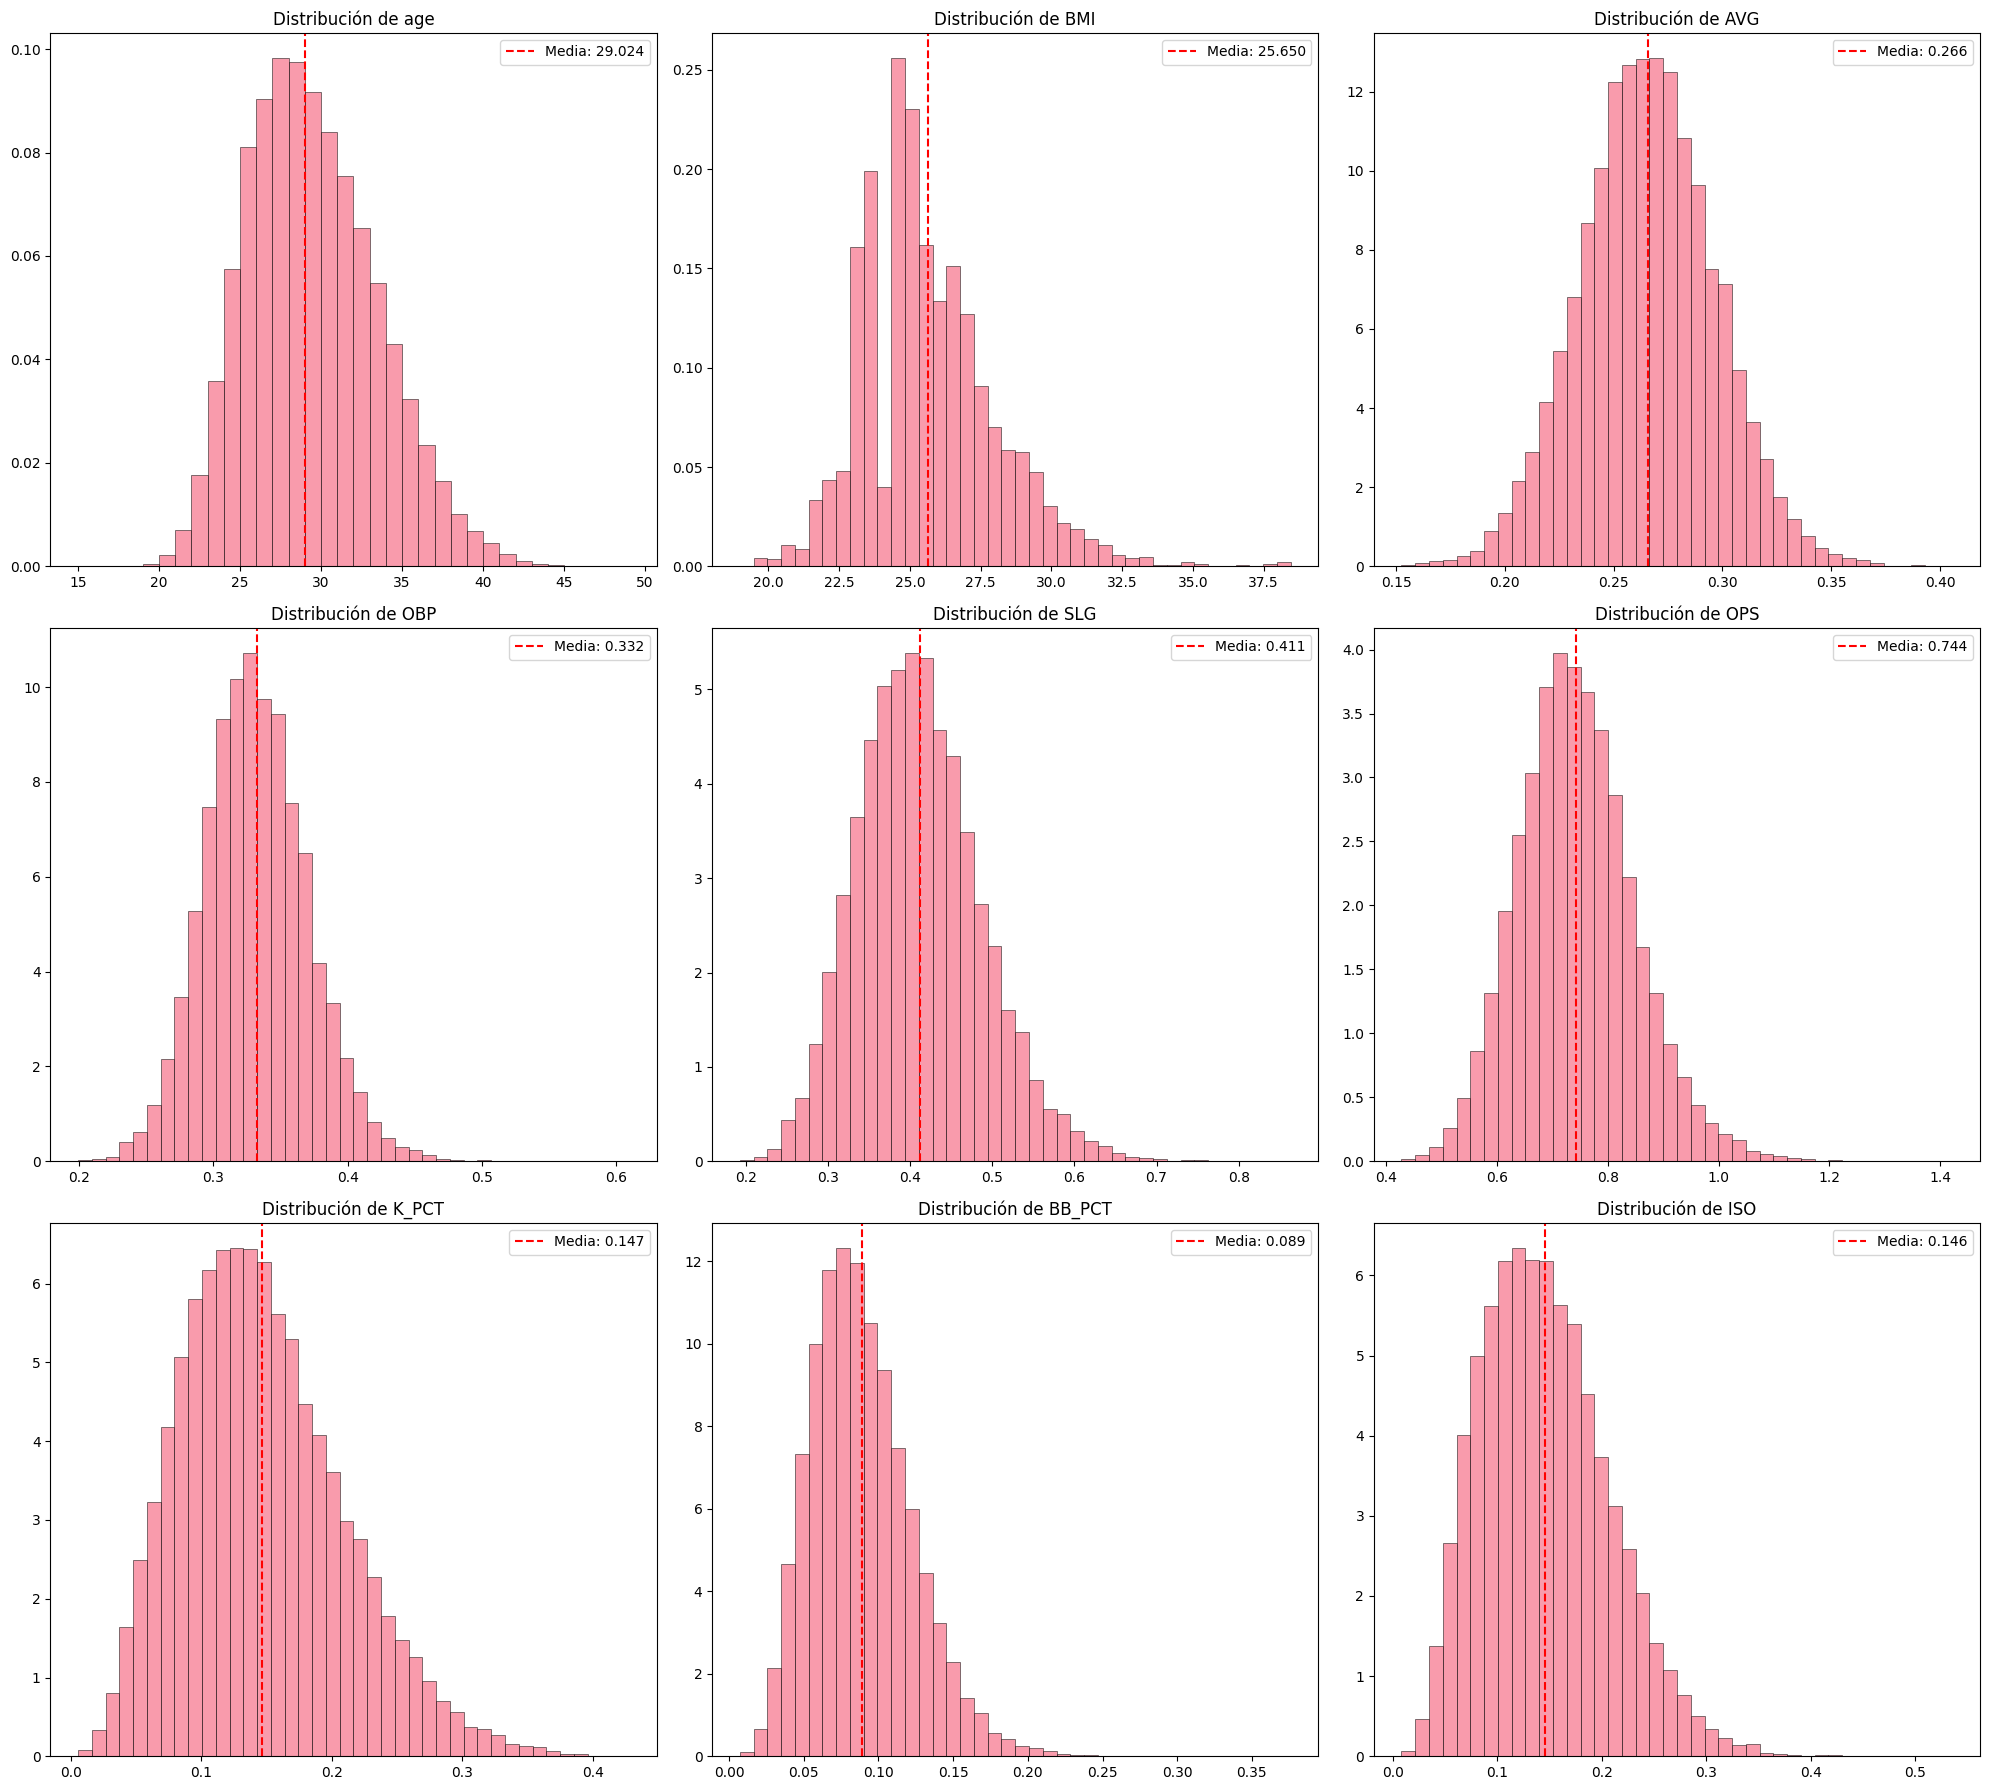

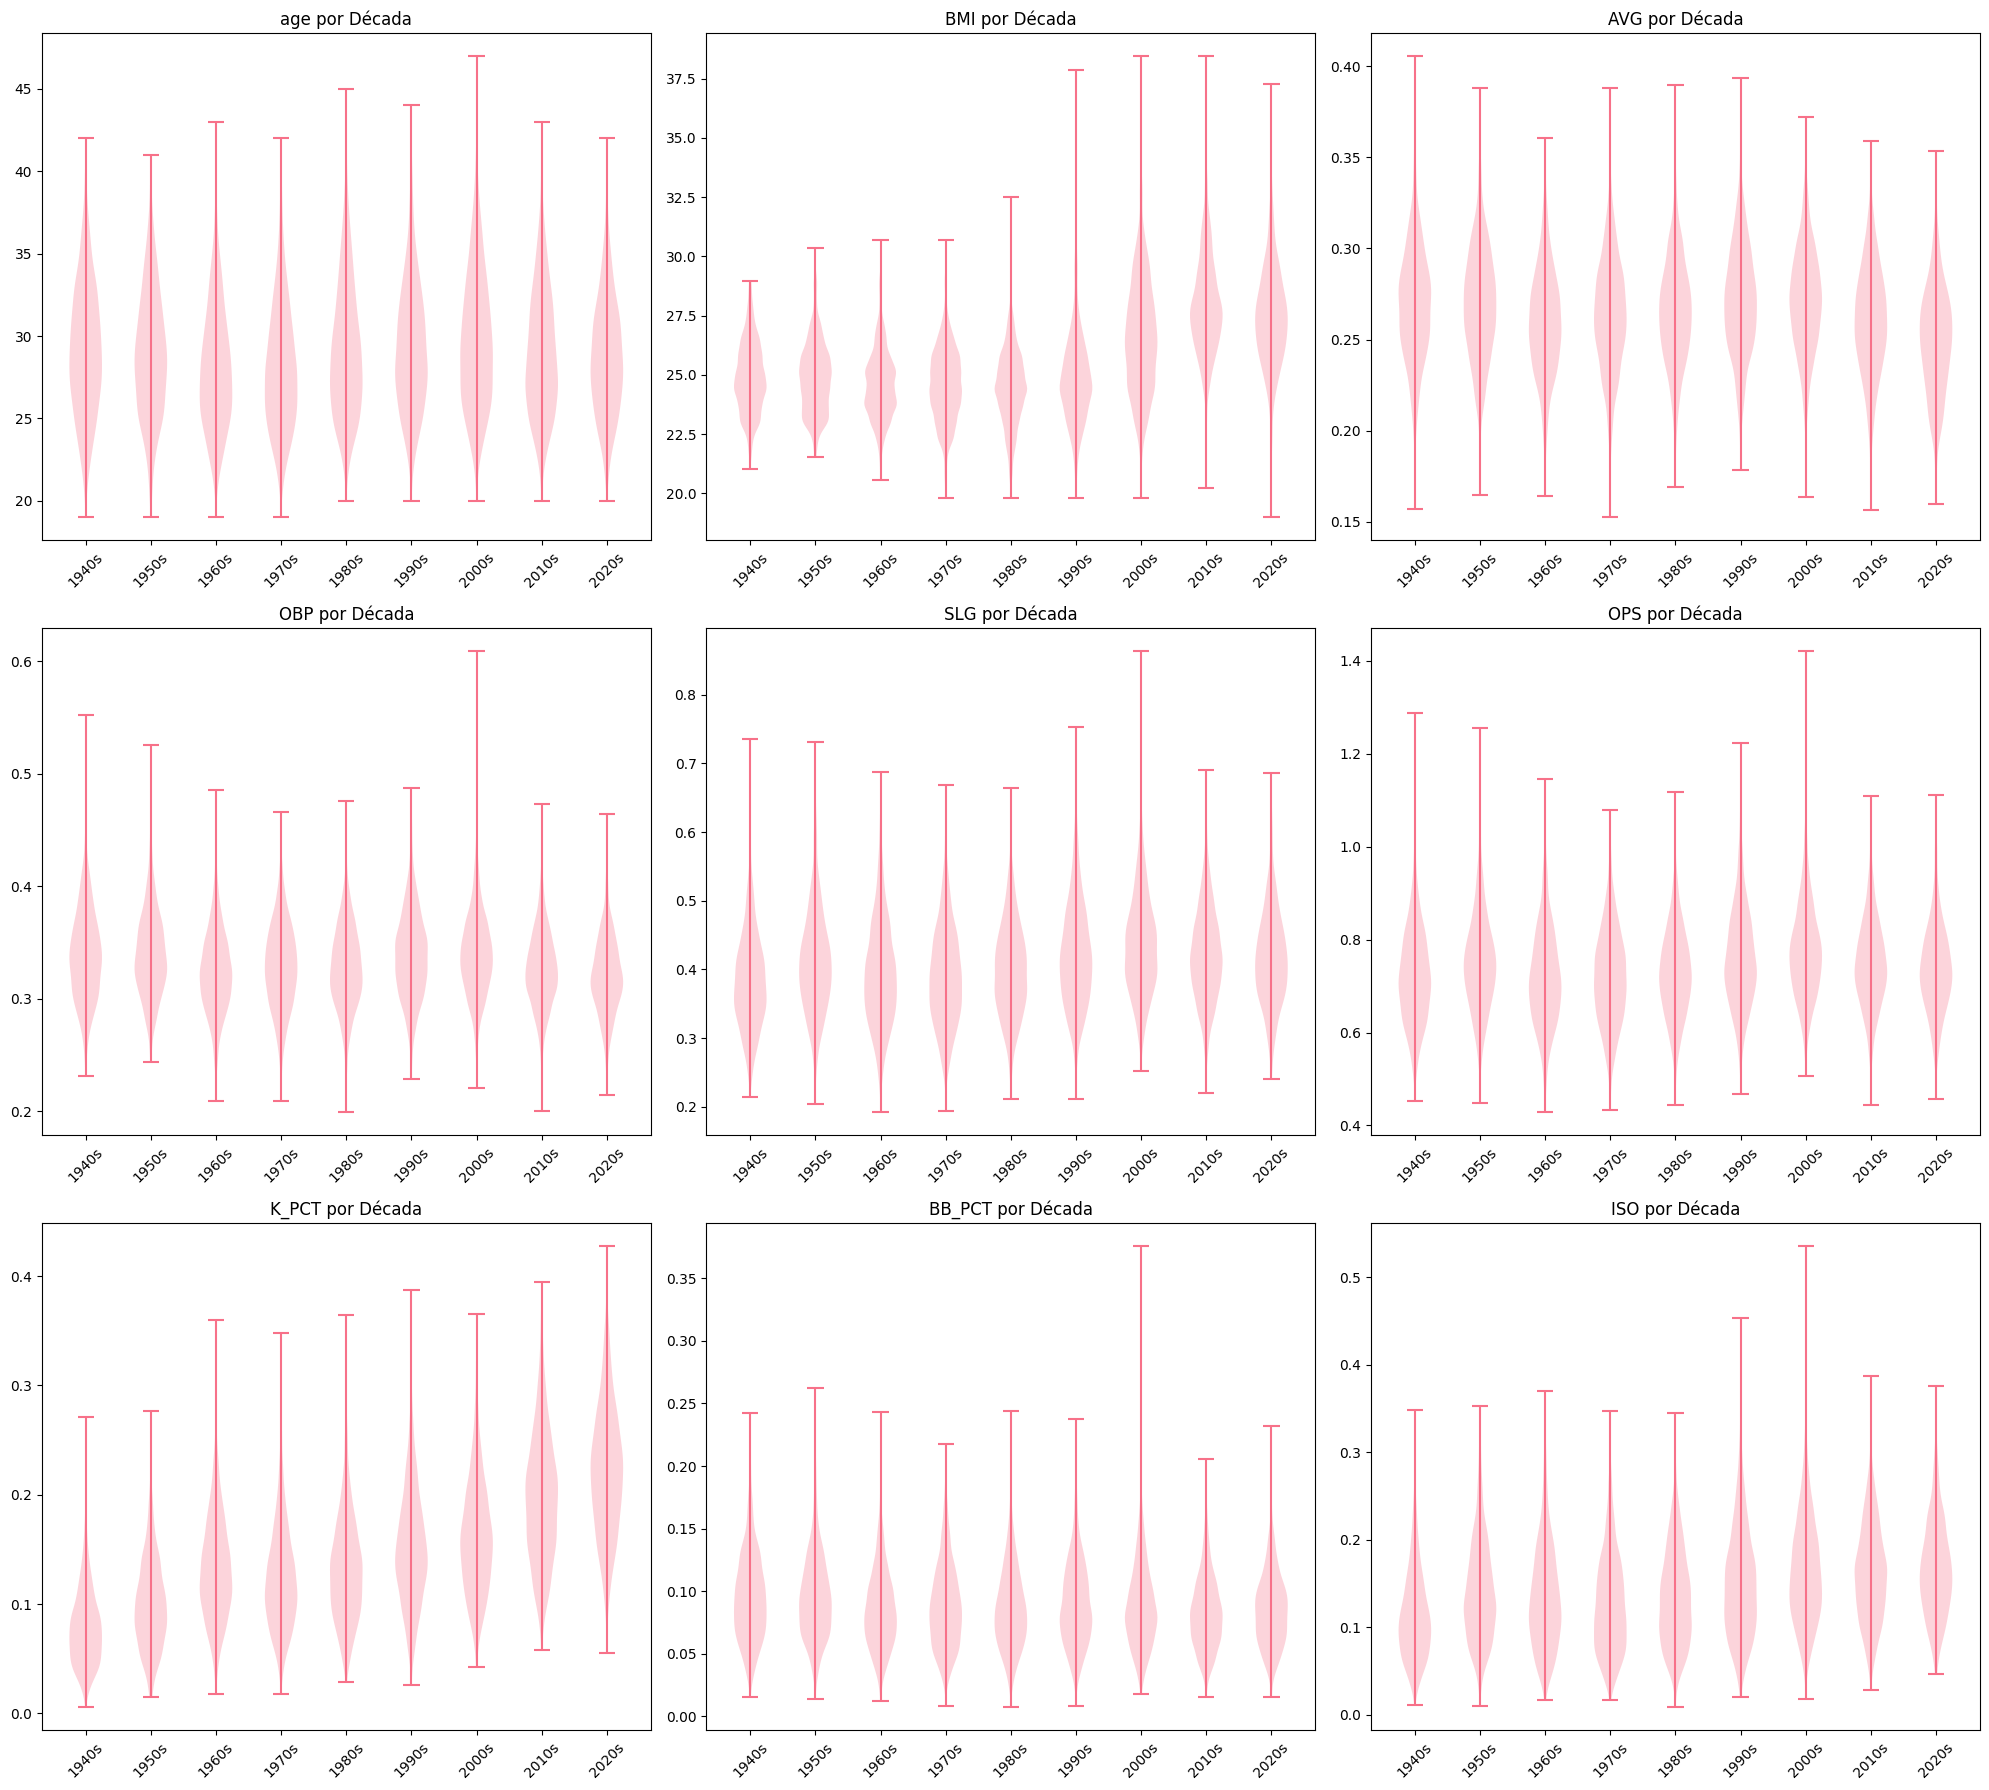

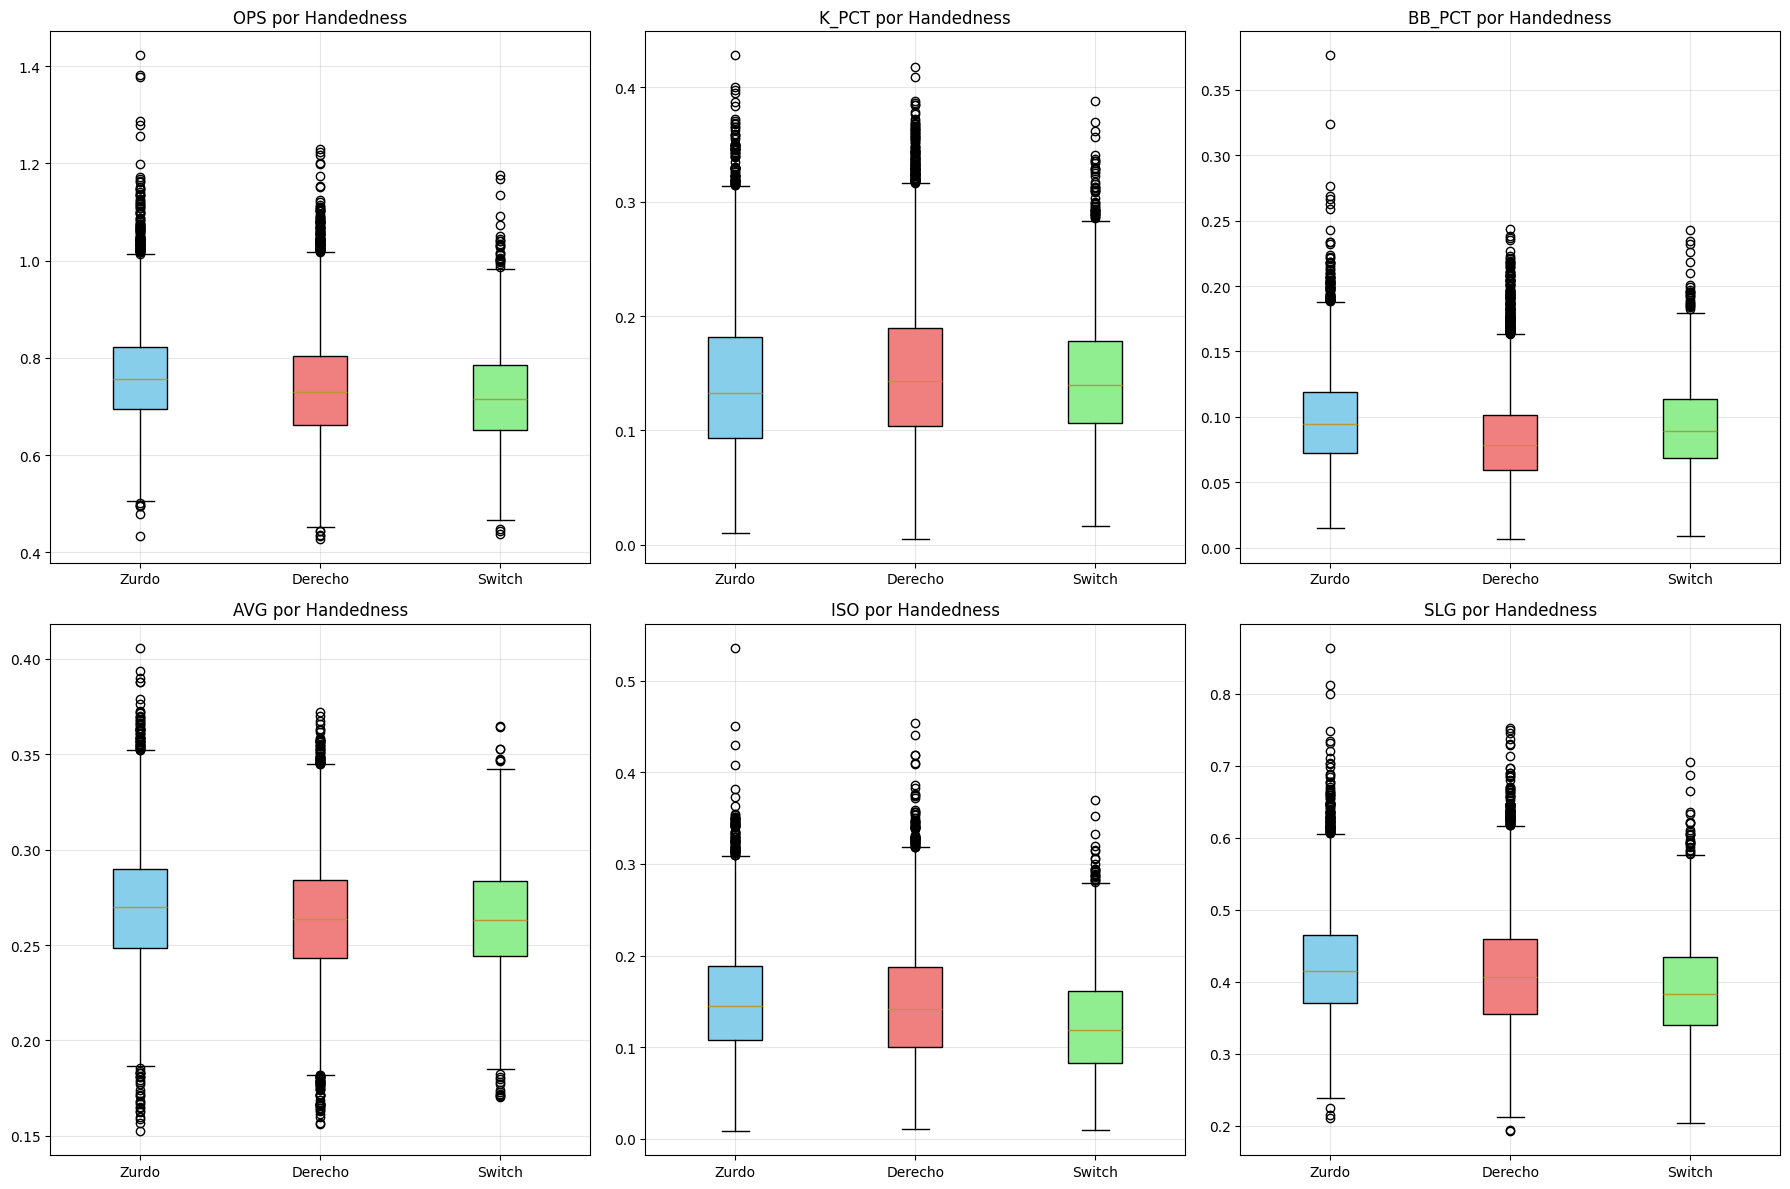


Posiciones analizadas: ['OF', '1B', '2B', '3B', 'SS', 'C']
Observaciones por posición:
  1B: 2,648 temporadas
  2B: 2,437 temporadas
  3B: 2,401 temporadas
  C: 2,297 temporadas
  OF: 7,809 temporadas
  SS: 2,298 temporadas


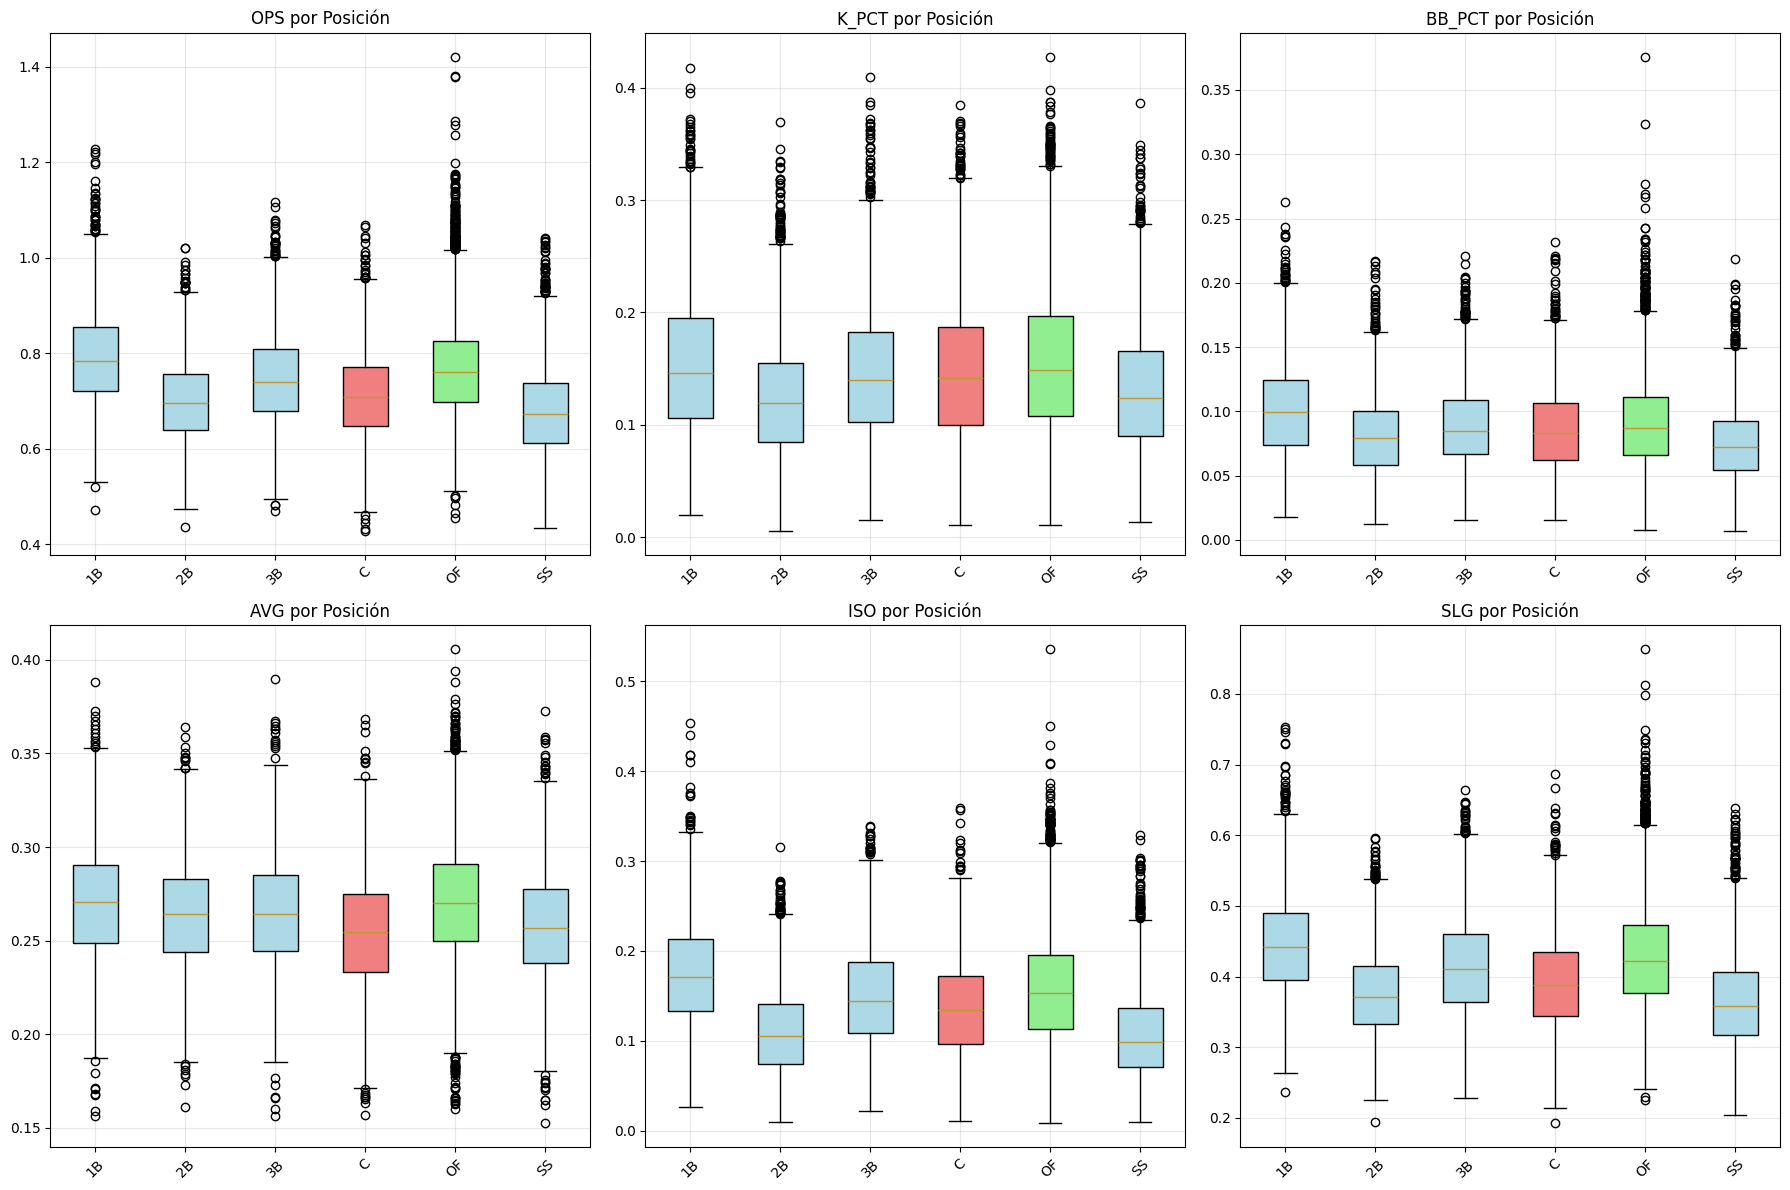


📊 ESTADÍSTICAS PROMEDIO POR POSICIÓN:
                    OPS    AVG    ISO  K_PCT  BB_PCT
primary_position                                    
1B                0.792  0.270  0.176  0.154   0.102
2B                0.701  0.264  0.112  0.125   0.081
3B                0.747  0.265  0.150  0.146   0.090
C                 0.713  0.255  0.137  0.148   0.086
OF                0.767  0.270  0.158  0.155   0.091
SS                0.679  0.258  0.108  0.131   0.075

Posiciones incluidas en correlación:
  1B: 2,648 observaciones
  2B: 2,437 observaciones
  3B: 2,401 observaciones
  C: 2,297 observaciones
  DH: 98 observaciones
  OF: 7,809 observaciones
  P: 5 observaciones
  SS: 2,298 observaciones


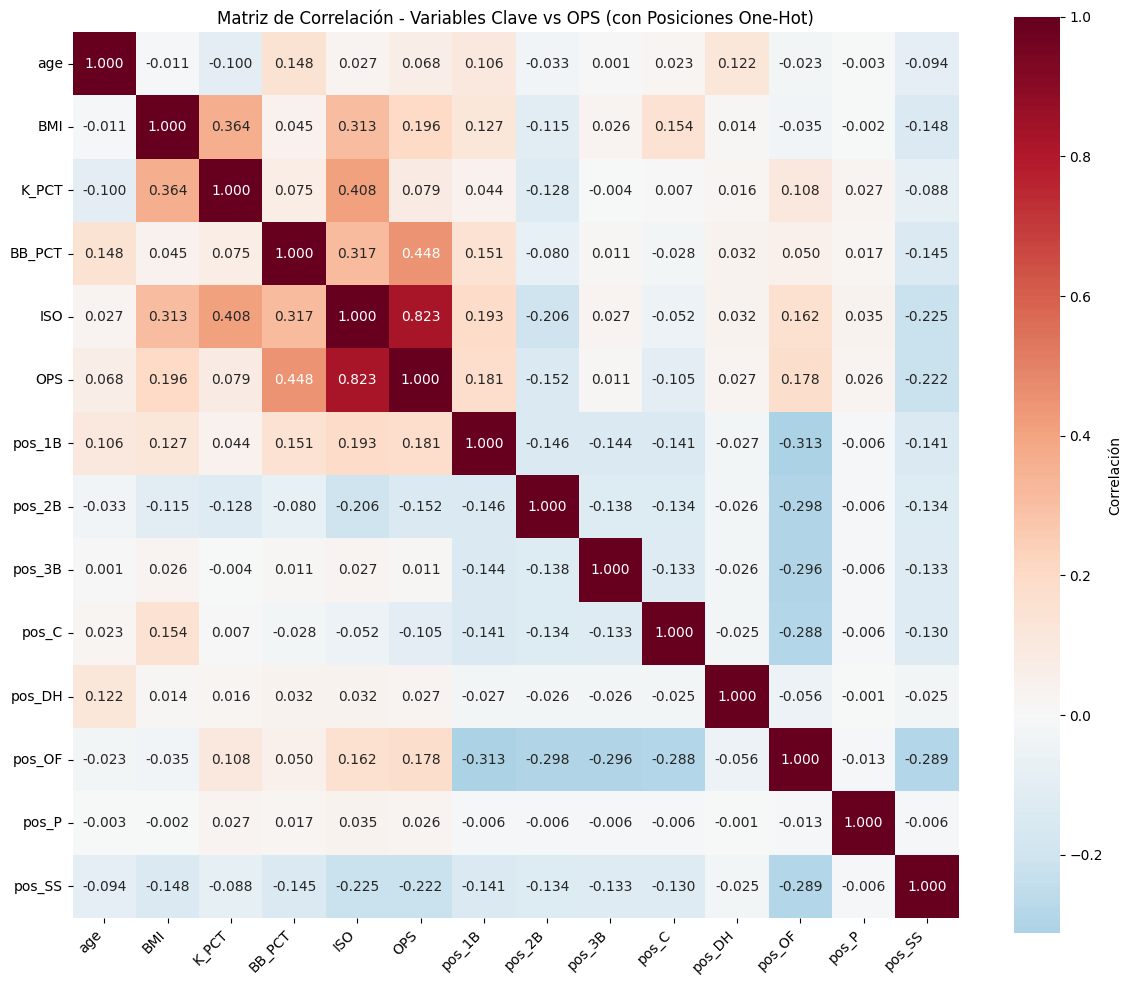


🎯 CORRELACIONES CON OPS (ordenadas por magnitud):
Variables continuas:
  ISO            :  0.823
  BB_PCT         :  0.448
  BMI            :  0.196
  K_PCT          :  0.079
  age            :  0.068

Posiciones (One-Hot):
  SS             : -0.222
  1B             :  0.181
  OF             :  0.178
  2B             : -0.152
  C              : -0.105
  DH             :  0.027
  P              :  0.026
  3B             :  0.011


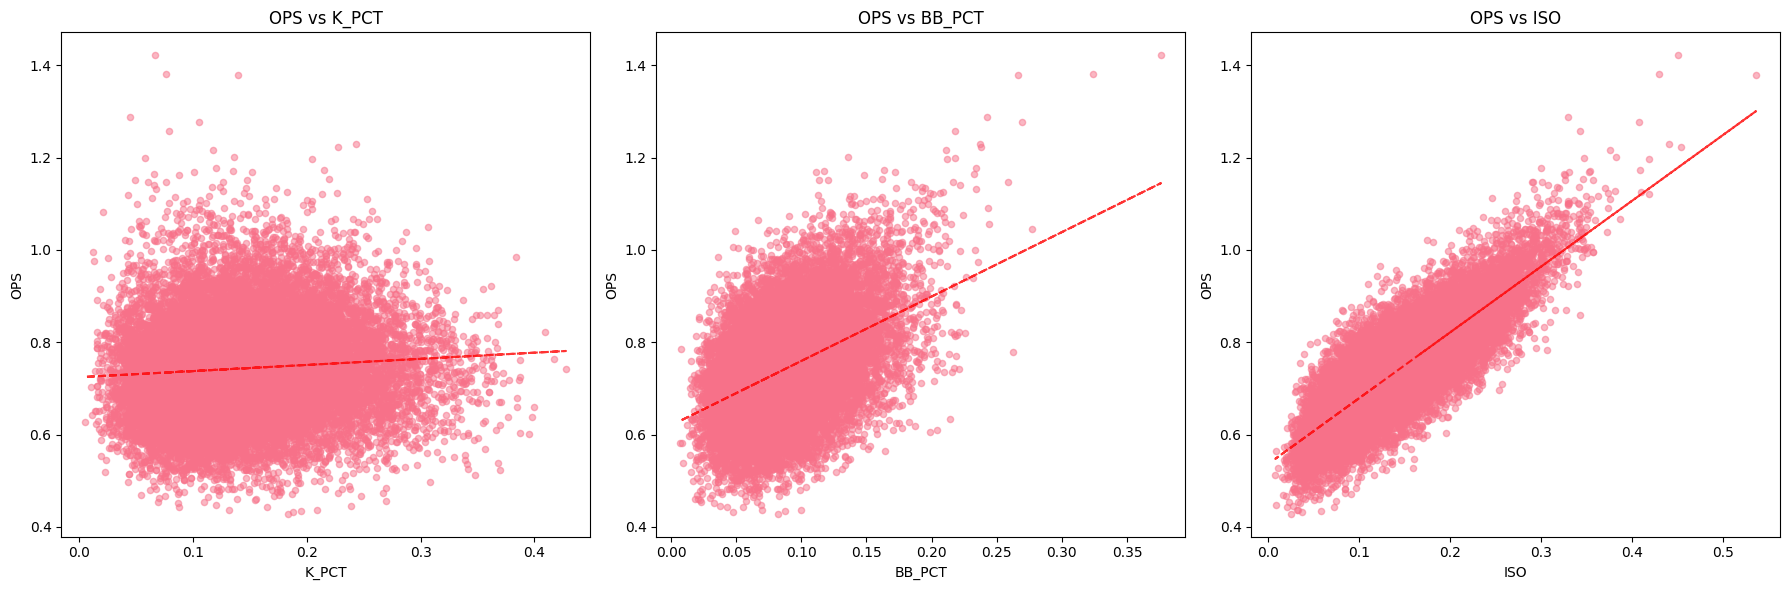


🏆 TOP 10 - OPS (Post-1940)
 1. bondsba01    (2004) - 1.422 (edad 40)
 2. bondsba01    (2002) - 1.381 (edad 38)
 3. bondsba01    (2001) - 1.379 (edad 37)
 4. willite01    (1941) - 1.287 (edad 23)
 5. bondsba01    (2003) - 1.278 (edad 39)
 6. willite01    (1957) - 1.257 (edad 39)
 7. mcgwima01    (2000) - 1.229 (edad 37)
 8. mcgwima01    (1998) - 1.222 (edad 35)
 9. thomafr04    (1994) - 1.217 (edad 26)
10. bagweje01    (1994) - 1.201 (edad 26)

🏆 TOP 10 - AVG (Post-1940)
 1. willite01    (1941) - 0.406 (edad 23)
 2. gwynnto01    (1994) - 0.394 (edad 34)
 3. brettge01    (1980) - 0.390 (edad 27)
 4. willite01    (1957) - 0.388 (edad 39)
 5. carewro01    (1977) - 0.388 (edad 32)
 6. walkela01    (1999) - 0.379 (edad 33)
 7. musiast01    (1948) - 0.376 (edad 28)
 8. heltoto01    (2000) - 0.372 (edad 27)
 9. garcino01    (2000) - 0.372 (edad 27)
10. suzukic01    (2004) - 0.372 (edad 31)

🏆 TOP 10 - HR (Post-1940)
 1. bondsba01    (2001) - 73.000 (edad 37)
 2. mcgwima01    (1998) - 70.000 (

In [9]:
#================================== 
#SECCIÓN 5: EDA 1: DISTRIBUCIÓN DE MÉTRICAS
#==================================

# Filtrado de datos para análisis estadístico robusto
# Se requieren mínimo 200 apariciones al plato para considerar una temporada representativa
df_filtered = batting_fe[batting_fe['PA'] >= 250].copy()
df_filtered = df_filtered.dropna(subset=['age', 'BMI']).copy()

print(f"📊 Datos filtrados: {df_filtered.shape[0]:,} temporadas con 250+ PA")
print(f"Período: {df_filtered['yearID'].min()}-{df_filtered['yearID'].max()}")

# ANÁLISIS DE DISTRIBUCIONES DE MÉTRICAS CLAVE
# Visualización de histogramas para entender la forma y características de cada variable
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
metrics = ['age', 'BMI', 'AVG', 'OBP', 'SLG', 'OPS', 'K_PCT', 'BB_PCT', 'ISO']

for i, metric in enumerate(metrics):
   row = i // 3
   col = i % 3
   
   if metric == 'age':
       bins = range(15, 50, 1)  # Bins específicos para edad
   else:
       bins = 40
       
   axes[row, col].hist(df_filtered[metric], bins=bins, alpha=0.7, density=True, edgecolor='black', linewidth=0.5)
   axes[row, col].axvline(df_filtered[metric].mean(), color='red', linestyle='--', label=f'Media: {df_filtered[metric].mean():.3f}')
   axes[row, col].set_title(f'Distribución de {metric}')
   axes[row, col].legend()

plt.tight_layout()
plt.show()

# ANÁLISIS TEMPORAL: EVOLUCIÓN POR DÉCADAS
# Permite identificar cambios en el juego a lo largo del tiempo
df_filtered['decade'] = (df_filtered['yearID'] // 10) * 10

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
for i, metric in enumerate(metrics):
   row = i // 3
   col = i % 3
   
   # Gráficos de violín para mostrar distribución completa por década
   data_by_decade = [df_filtered[df_filtered['decade'] == decade][metric].dropna() 
                     for decade in sorted(df_filtered['decade'].unique())]
   
   parts = axes[row, col].violinplot(data_by_decade, positions=range(len(data_by_decade)))
   axes[row, col].set_xticks(range(len(data_by_decade)))
   axes[row, col].set_xticklabels([f"{int(decade)}s" for decade in sorted(df_filtered['decade'].unique())], rotation=45)
   axes[row, col].set_title(f'{metric} por Década')

plt.tight_layout()
plt.show()

# ANÁLISIS POR HANDEDNESS (PREFERENCIA DE BATEO)
# Comparación entre bateadores zurdos, derechos y switch (ambidiestros)
if 'bats' in df_filtered.columns:
   df_hands = df_filtered.dropna(subset=['bats'])
   hands_order = ['L', 'R', 'B']  # Left, Right, Switch
   colors = ['skyblue', 'lightcoral', 'lightgreen']

   fig, axes = plt.subplots(2, 3, figsize=(18, 12))
   stats_to_plot = ['OPS', 'K_PCT', 'BB_PCT', 'AVG', 'ISO', 'SLG']

   for i, stat in enumerate(stats_to_plot):
       row = i // 3
       col = i % 3
       
       data_by_hand = [df_hands[df_hands['bats'] == hand][stat] for hand in hands_order]
       
       bp = axes[row, col].boxplot(data_by_hand, labels=['Zurdo', 'Derecho', 'Switch'], patch_artist=True)
       for patch, color in zip(bp['boxes'], colors):
           patch.set_facecolor(color)
       
       axes[row, col].set_title(f'{stat} por Handedness')
       axes[row, col].grid(True, alpha=0.3)

   plt.tight_layout()
   plt.show()
else:
   print("⚠️  COLUMNA 'bats' NO ENCONTRADA")
   print("Re-ejecuta la Sección 4 (Feature Engineering) primero")

# ANÁLISIS POR POSICIÓN

if 'primary_position' in df_filtered.columns:
    df_pos = df_filtered.dropna(subset=['primary_position'])
    
    # Filtrar posiciones con suficientes observaciones (mínimo 100 temporadas)
    pos_counts = df_pos['primary_position'].value_counts()
    valid_positions = pos_counts[pos_counts >= 100].index.tolist()
    df_pos_filtered = df_pos[df_pos['primary_position'].isin(valid_positions)]
    
    print(f"\nPosiciones analizadas: {valid_positions}")
    print(f"Observaciones por posición:")
    for pos in sorted(valid_positions):
        count = len(df_pos_filtered[df_pos_filtered['primary_position'] == pos])
        print(f"  {pos}: {count:,} temporadas")

    # Gráficos de caja por posición
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    stats_to_plot = ['OPS', 'K_PCT', 'BB_PCT', 'AVG', 'ISO', 'SLG']
    
    # Ordenar posiciones alfabéticamente para consistencia
    position_order = sorted(valid_positions)

    for i, stat in enumerate(stats_to_plot):
        row = i // 3
        col = i % 3
        
        # Preparar datos por posición en el orden especificado
        data_by_position = [df_pos_filtered[df_pos_filtered['primary_position'] == pos][stat] 
                           for pos in position_order]
        
        bp = axes[row, col].boxplot(data_by_position, labels=position_order, patch_artist=True)
        
        # Colorear cajas por tipo de posición
        colors = []
        for pos in position_order:
            if pos == 'C':
                colors.append('lightcoral')     # Catcher
            elif pos in ['1B', '2B', '3B', 'SS']:
                colors.append('lightblue')      # Infielders
            elif pos == 'OF':
                colors.append('lightgreen')     # Outfielders  
            elif pos == 'P':
                colors.append('plum')           # Pitcher
            else:
                colors.append('lightgray')      # Otros
        
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        axes[row, col].set_title(f'{stat} por Posición')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
    
    # Estadísticas descriptivas por posición
    print(f"\n📊 ESTADÍSTICAS PROMEDIO POR POSICIÓN:")
    print("=" * 60)
    position_stats = df_pos_filtered.groupby('primary_position')[['OPS', 'AVG', 'ISO', 'K_PCT', 'BB_PCT']].mean()
    position_stats = position_stats.reindex(position_order)
    print(position_stats.round(3))

else:
    print("⚠️  COLUMNA 'primary_position' NO ENCONTRADA")
    print("Re-ejecuta la Sección 4 (Feature Engineering) primero")

#ANÁLISIS DE CORRELACIONES (CORREGIDO CON ONE-HOT ENCODING)
# Identifica relaciones lineales entre variables importantes incluyendo posición

# Variables base para correlación
correlation_vars = ['age', 'BMI', 'K_PCT', 'BB_PCT', 'ISO', 'OPS']

# Preparar datos para correlación con posiciones
if 'primary_position' in df_filtered.columns:
    # Crear copia para no modificar el DataFrame original
    df_corr = df_filtered[correlation_vars + ['primary_position']].copy()
    
    # Filtrar solo posiciones válidas (sin NaN)
    df_corr = df_corr.dropna(subset=['primary_position'])
    
    # ONE-HOT ENCODING para posiciones (CORREGIDO)
    position_dummies = pd.get_dummies(df_corr['primary_position'], prefix='pos')
    
    # Combinar variables originales con dummies de posición
    df_corr_final = pd.concat([df_corr[correlation_vars], position_dummies], axis=1)
    
    print(f"\nPosiciones incluidas en correlación:")
    position_cols = [col for col in position_dummies.columns]
    for col in sorted(position_cols):
        pos_name = col.replace('pos_', '')
        count = position_dummies[col].sum()
        print(f"  {pos_name}: {count:,} observaciones")
    
else:
    df_corr_final = df_filtered[correlation_vars].copy()
    print("⚠️  Posición no disponible para correlación")

# Calcular matriz de correlación
corr_matrix = df_corr_final.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables Clave vs OPS (con Posiciones One-Hot)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostrar correlaciones específicas con OPS ordenadas por magnitud
print(f"\n🎯 CORRELACIONES CON OPS (ordenadas por magnitud):")
print("=" * 50)
ops_correlations = corr_matrix['OPS'].drop('OPS').sort_values(key=abs, ascending=False)

print("Variables continuas:")
for var, corr in ops_correlations.items():
    if not var.startswith('pos_'):
        print(f"  {var:15}: {corr:6.3f}")

print("\nPosiciones (One-Hot):")
for var, corr in ops_correlations.items():
    if var.startswith('pos_'):
        pos_name = var.replace('pos_', '')
        print(f"  {pos_name:15}: {corr:6.3f}")

# ANÁLISIS DE RELACIONES CLAVE CON OPS
# Scatter plots para visualizar relaciones no lineales
strong_correlations = ['K_PCT', 'BB_PCT', 'ISO']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(strong_correlations):
   axes[i].scatter(df_filtered[var], df_filtered['OPS'], alpha=0.5, s=20)
   axes[i].set_xlabel(var)
   axes[i].set_ylabel('OPS')
   axes[i].set_title(f'OPS vs {var}')
   
   # Línea de tendencia para identificar relación lineal
   z = np.polyfit(df_filtered[var].dropna(), df_filtered[df_filtered[var].notna()]['OPS'], 1)
   p = np.poly1d(z)
   axes[i].plot(df_filtered[var], p(df_filtered[var]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()



# RANKINGS HISTÓRICOS: ERA MODERNA (POST-1940)
# Identifica las mejores temporadas individuales en diferentes categorías
modern_era = df_filtered[df_filtered['yearID'] >= 1940]

categories = {
   'OPS': 'OPS',
   'AVG': 'AVG', 
   'HR': 'HR',
   'RBI': 'RBI',
   'SB': 'SB',
   'BB_PCT': 'BB_PCT',
   'K_PCT': 'K_PCT',
   'ISO': 'ISO'
}

for category, column in categories.items():
   print(f"\n🏆 TOP 10 - {category} (Post-1940)")
   top_10 = modern_era.nlargest(10, column)[['playerID', 'yearID', column, 'age']]
   for idx, (_, row) in enumerate(top_10.iterrows(), 1):
       print(f"{idx:2d}. {row['playerID']:12} ({int(row['yearID'])}) - {row[column]:.3f} (edad {int(row['age'])})")

print(f"\n✅ EDA Parte 1 completado. Datos analizados: {len(df_filtered):,} temporadas")

## **Resultados del Análisis Exploratorio de Distribuciones**

### **Patrones Distributivos y Características de las Métricas**

#### **Distribuciones Aproximadamente Normales**
- **Age, BMI, AVG, OBP, SLG, OPS**: Muestran distribuciones **cercanas a la normalidad** con formas de campana bien definidas y simetría razonable
- **BB_PCT**: También **aproximadamente normal** con ligero sesgo hacia valores bajos

#### **Distribuciones Claramente Asimétricas**
- **K_PCT**: **Sesgo positivo marcado** - mayoría de jugadores con tasas bajas, cola larga hacia valores extremos
- **ISO**: **Fuertemente sesgada hacia la derecha** - muchos jugadores con poco poder, pocos con poder excepcional

#### **Evolución Temporal del Juego**
Los gráficos por décadas confirman transformaciones fundamentales: **incremento dramático en K_PCT** desde los 1980s (revolución "Three True Outcomes"), **estabilización relativa del AVG** alrededor de 0.260-0.270, y **aumento sostenido en ISO** reflejando el énfasis moderno en poder. Esta evolución valida la necesidad de ajustes contextuales en nuestros modelos predictivos.

#### **Efectos de Handedness**
Los análisis por preferencia de bateo revelan **ventajas sistemáticas para zurdos** en OPS y AVG, confirmando teorías sobre matchups favorables contra pitchers derechos. Los switch hitters muestran **perfiles intermedios** pero con **mayor variabilidad**, sugiriendo subgrupos distintivos dentro de esta categoría.

### **Relaciones Predictivas Identificadas**

#### **Correlaciones Clave Confirmadas**
La matriz de correlación valida relaciones fundamentales: **ISO-OPS (r=0.804)** como la más fuerte, confirmando que el poder es el principal driver del rendimiento ofensivo; **BB_PCT-OPS (r=0.443)** sustenta la importancia de la disciplina; **K_PCT-OPS (correlación plana)** sugiere que los ponches no son determinantes si se compensa con poder.

#### **Relaciones No Lineales**
Los scatter plots revelan patrones más complejos: la relación **K_PCT vs OPS** es relativamente plana hasta extremos, mientras **BB_PCT vs OPS** muestra pendiente consistente positiva, y **ISO vs OPS** exhibe relación casi perfectamente lineal, confirmando el poder como predictor dominante.

### **Rankings Históricos y Benchmarks de Elite**

#### **Dominancia de Jugadores Icónicos**
Los rankings históricos confirman la excepcionalidad de ciertos atletas: **Barry Bonds domina múltiples categorías** (6 de 10 mejores OPS post-1940), estableciendo el benchmark de rendimiento peak en la era moderna. **Ted Williams mantiene relevancia** 80 años después, validando la durabilidad de ciertos logros. **Mark McGwire y Sammy Sosa** representan la era del poder extremo de los late-90s.

#### **Evolución de Records**
Los rankings muestran **concentración temporal**: records de HR en late-90s/early-2000s, records de K_PCT en años recientes (2020-2023), y records de AVG distribuidos más uniformemente. Esto confirma que diferentes eras favorecen diferentes habilidades, información crucial para nuestro clustering de arquetipos.

### **Implicaciones para el Sistema Predictivo**

#### **Variables Clave Validadas**
- **ISO**: Predictor primario confirmado (r=0.804 con OPS)
- **BB_PCT**: Indicador robusto de disciplina y rendimiento sostenible  
- **K_PCT**: Menos predictivo que esperado, pero crítico para arquetipos modernos
- **Age**: Distribución confirma curvas de aging esperadas

#### **Preparación para Clustering**
Los patrones identificados sugieren **al menos 4-5 arquetipos naturales**: power hitters (alto ISO), contact specialists (bajo K_PCT), patient hitters (alto BB_PCT), modern TTO players, y utility players. La variabilidad observada justifica el enfoque de clustering para capturar esta heterogeneidad de talentos.

---
<div style="page-break-before: always;"></div>

# 📈 **SECCIÓN 6: Análisis Temporal y Patrones de Carrera**
---
Esta sección aborda dos dimensiones fundamentales para nuestro sistema predictivo: la evolución histórica del baseball y los patrones de aging que determinan trayectorias de carrera. El objetivo principal es comprender cómo ha cambiado el juego a lo largo del tiempo y establecer curvas de envejecimiento libres de sesgo que informen nuestros modelos de predicción.

Implementaremos una metodología dual innovadora: primero, analizaremos la evolución temporal de métricas clave para contextualizar diferentes eras del baseball y validar la necesidad de ajustes por época; segundo, desarrollaremos curvas de aging utilizando el "método Delta" que evita el sesgo de supervivencia inherente en análisis tradicionales que solo consideran jugadores activos por edad.

El enfoque metodológico es particularmente crítico para las curvas de aging. En lugar de promediar rendimiento por edad (que sesga hacia jugadores excepcionales que sobreviven más tiempo), compararemos el mismo jugador año-a-año para capturar el verdadero patrón de decline. Esta innovación metodológica es fundamental porque los modelos predictivos de front offices dependen de estimaciones precisas de aging para evaluar contratos de múltiples años.

Esperamos confirmar transformaciones conocidas del baseball moderno (incremento en strikeouts, énfasis en poder), establecer peak ages precisos por habilidad específica, y demostrar cuantitativamente el sesgo de supervivencia que contamina análisis tradicionales. Estos insights formarán la base para ajustes temporales en nuestro clustering y para incorporar factores de aging en los modelos de regresión individual.

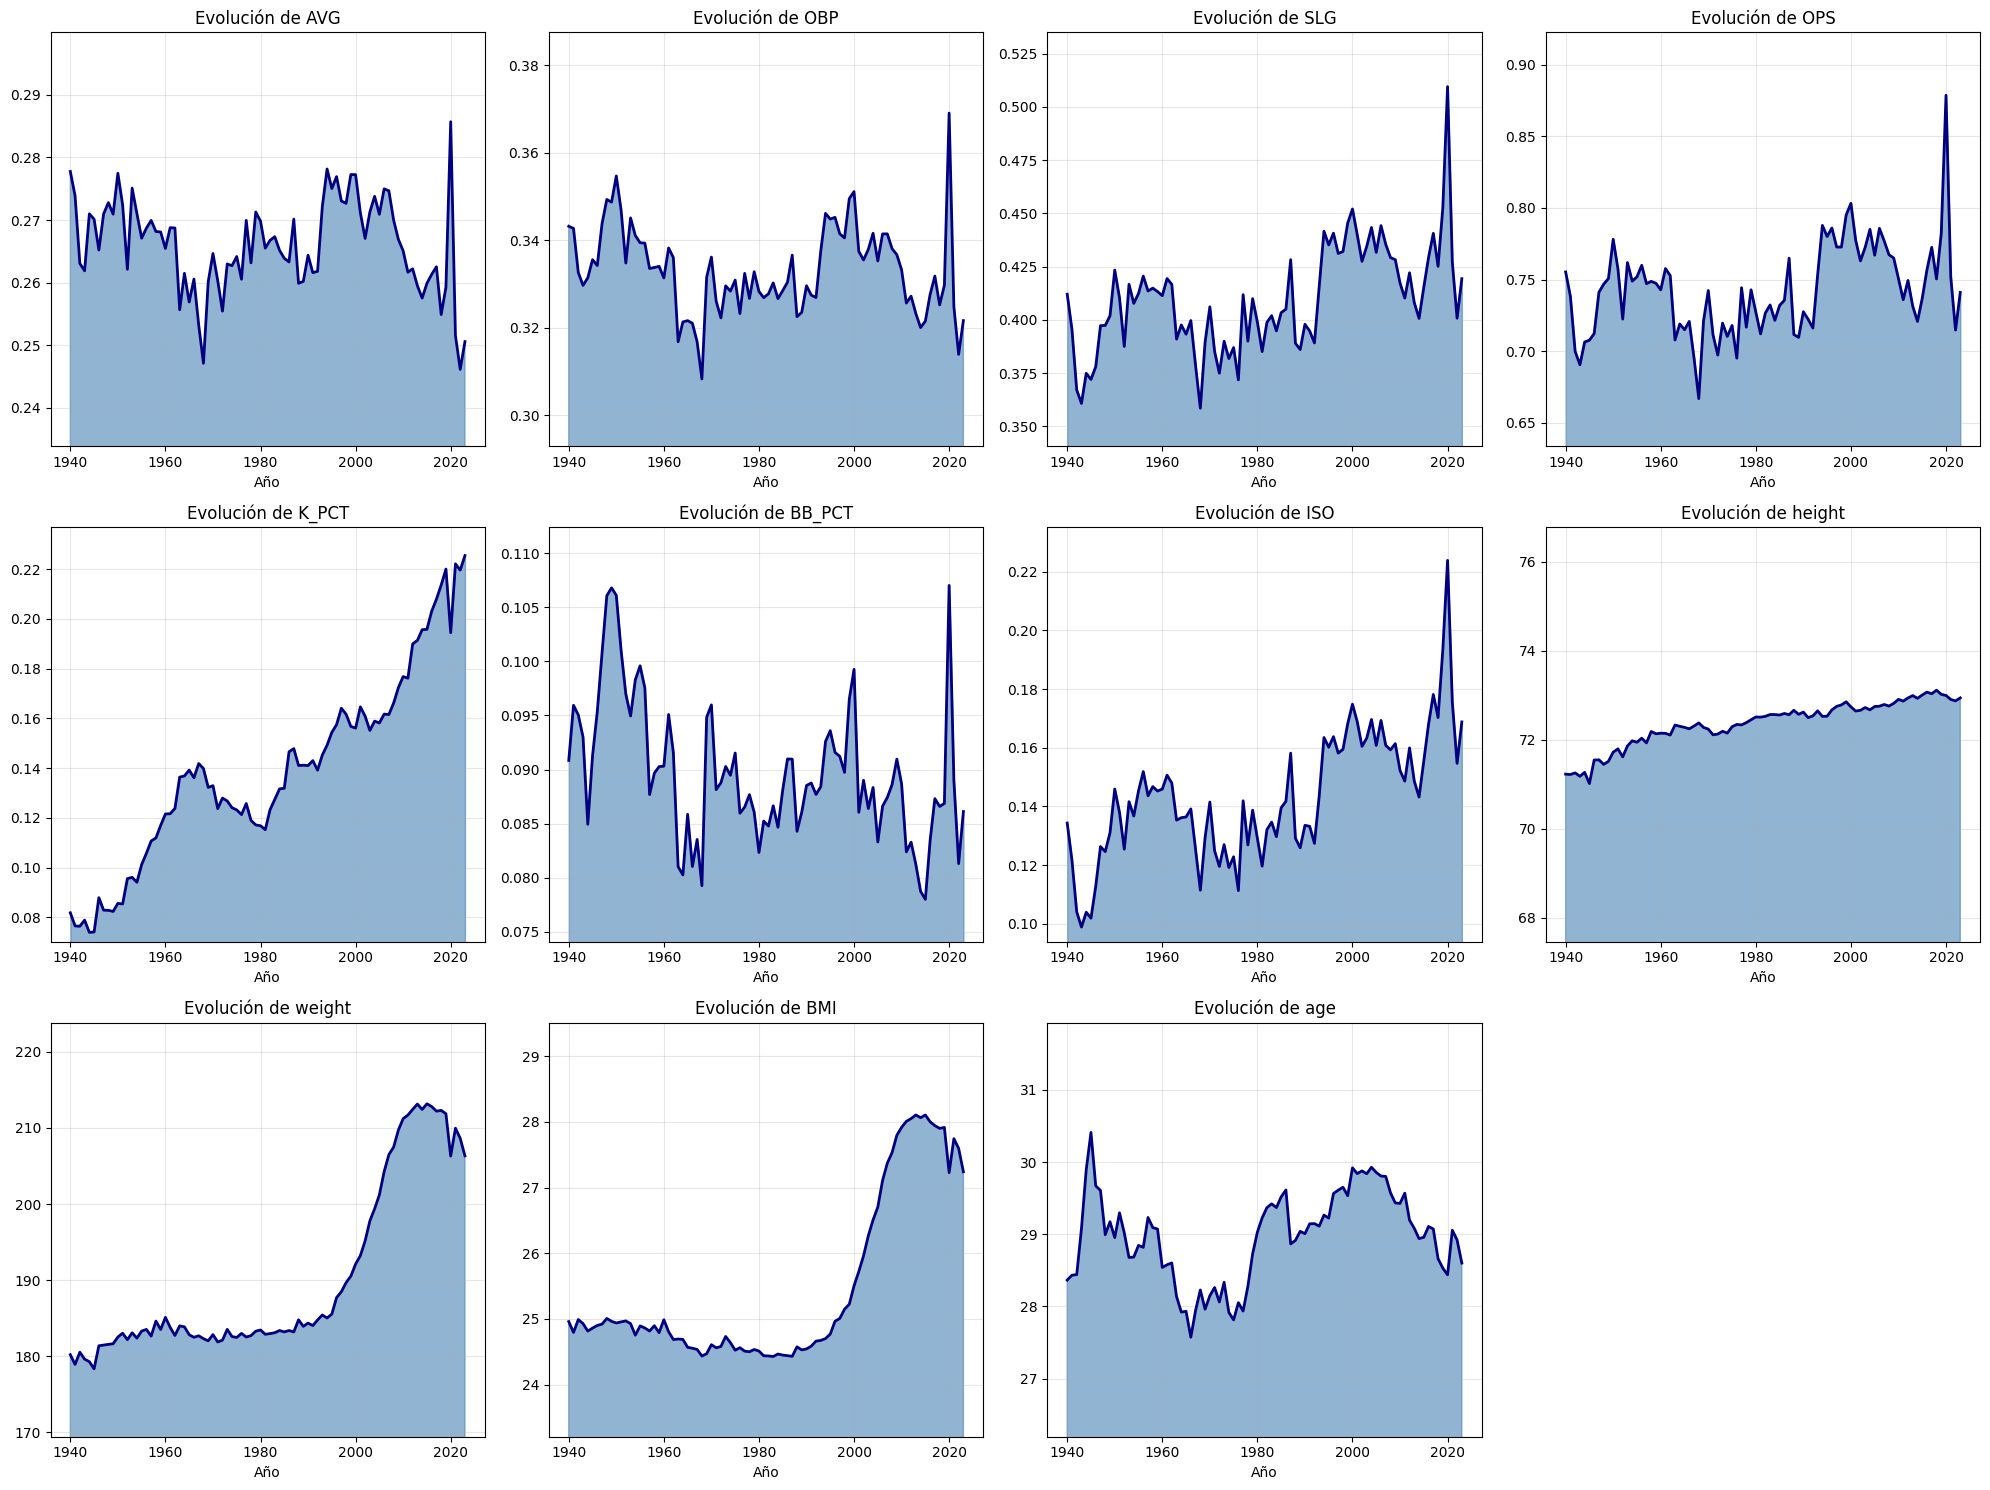

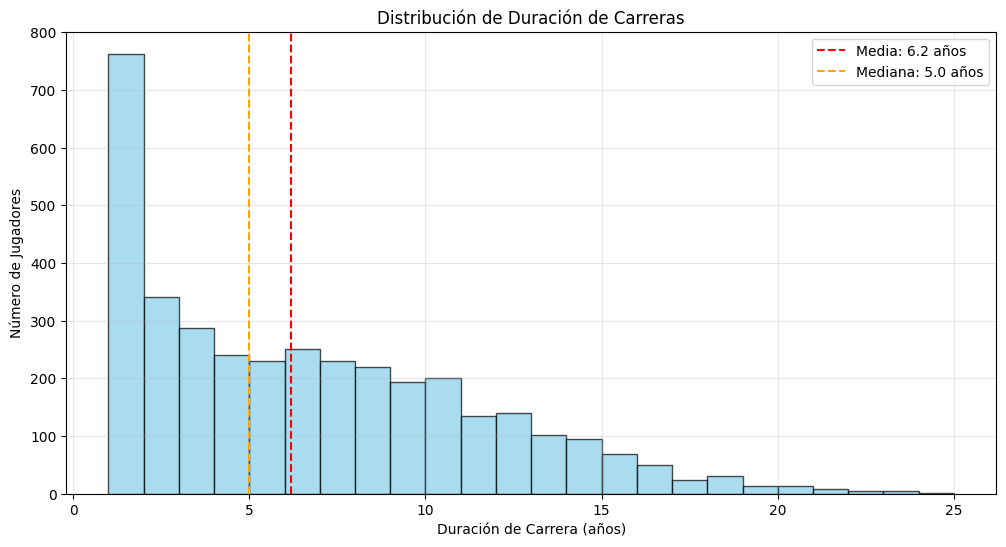

CURVAS DE ENVEJECIMIENTO
--------------------------------------------------


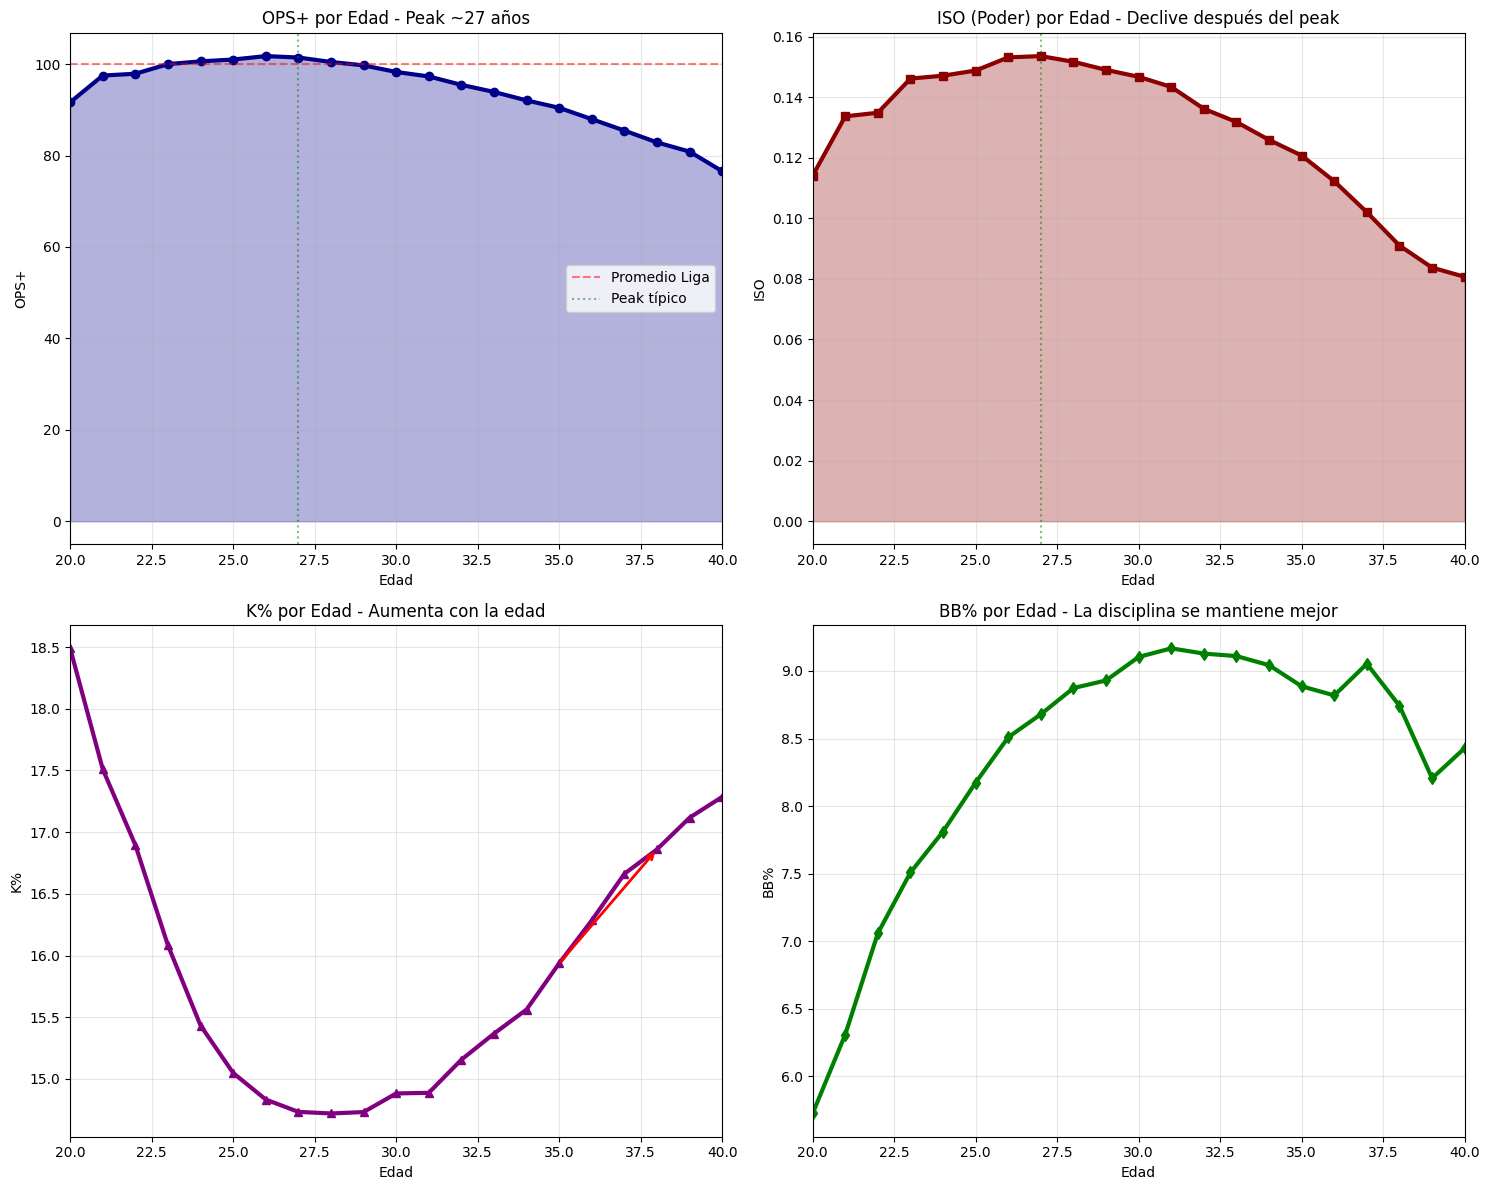


Edad peak real para OPS+: 26 años
Edad peak para ISO (poder): 27 años


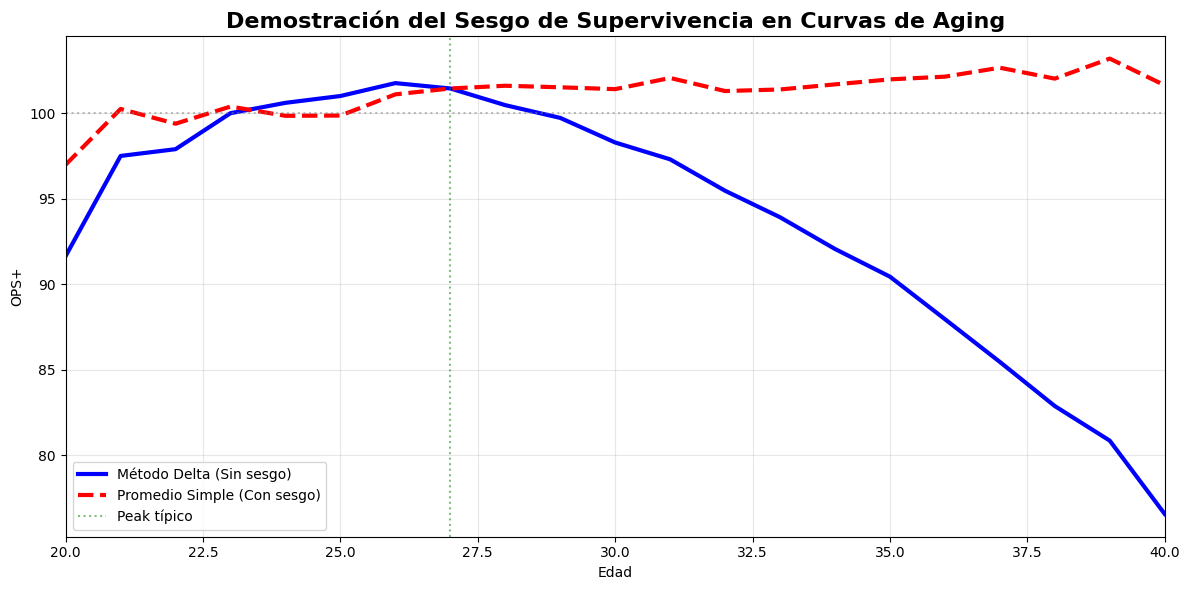


⚠️ IMPORTANTE: El promedio simple muestra mejora constante (sesgo)
✅ El método Delta muestra el patrón real: peak ~27, luego declive


In [10]:
#================================== 
#SECCIÓN 6: EDA 2: ANALISIS DE CARRERAS Y CURVAS DE ENVEJECIMIENTO
#==================================

# EVOLUCIÓN TEMPORAL DE LAS MÉTRICAS DE BASEBALL
# Análisis de cómo ha cambiado el juego a lo largo de las décadas
yearly_stats = df_filtered.groupby('yearID').agg({
   'AVG': 'mean', 'OBP': 'mean', 'SLG': 'mean', 'OPS': 'mean',
   'K_PCT': 'mean', 'BB_PCT': 'mean', 'ISO': 'mean',
   'height': 'mean', 'weight': 'mean', 'BMI': 'mean', 'age': 'mean'
}).reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
metrics = ['AVG', 'OBP', 'SLG', 'OPS', 'K_PCT', 'BB_PCT', 'ISO', 
          'height', 'weight', 'BMI', 'age']

for i, metric in enumerate(metrics):
   row = i // 4
   col = i % 4
   
   axes[row, col].fill_between(yearly_stats['yearID'], yearly_stats[metric], 
                              alpha=0.6, color='steelblue')
   axes[row, col].plot(yearly_stats['yearID'], yearly_stats[metric], 
                      color='navy', linewidth=2)
   axes[row, col].set_title(f'Evolución de {metric}')
   axes[row, col].set_xlabel('Año')
   axes[row, col].set_ylim(yearly_stats[metric].min() * 0.95, yearly_stats[metric].max() * 1.05)
   axes[row, col].grid(True, alpha=0.3)

if len(metrics) < 12:
   axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

# ANÁLISIS DE DURACIÓN DE CARRERAS
# Distribución de cuánto tiempo duran las carreras profesionales
career_lengths = df_filtered.groupby('playerID')['yearID'].agg(['min', 'max']).reset_index()
career_lengths['career_length'] = career_lengths['max'] - career_lengths['min'] + 1

plt.figure(figsize=(12, 6))
plt.hist(career_lengths['career_length'], bins=range(1, 26), alpha=0.7, 
        edgecolor='black', color='skyblue')
plt.axvline(career_lengths['career_length'].mean(), color='red', linestyle='--', 
          label=f'Media: {career_lengths["career_length"].mean():.1f} años')
plt.axvline(career_lengths['career_length'].median(), color='orange', linestyle='--', 
          label=f'Mediana: {career_lengths["career_length"].median():.1f} años')
plt.xlabel('Duración de Carrera (años)')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Duración de Carreras')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# CURVAS DE ENVEJECIMIENTO - METODOLOGÍA AVANZADA
# Análisis crítico del rendimiento por edad evitando sesgos estadísticos

print("CURVAS DE ENVEJECIMIENTO")
print("-" * 50)

# Filtrado estricto para análisis de aging curves
aging_data = batting_fe[(batting_fe['age'] >= 20) & 
                             (batting_fe['age'] <= 40) & 
                             (batting_fe['PA'] >= 350)].copy()

# MÉTODO DELTA: Evita el sesgo de supervivencia
# En lugar de promediar por edad (sesgo: solo sobreviven los mejores), 
# comparamos el mismo jugador año a año para ver cambios reales
player_changes = []

for player_id in aging_data['playerID'].unique():
   player_data = aging_data[aging_data['playerID'] == player_id].sort_values('yearID')
   
   for i in range(len(player_data) - 1):
       if player_data.iloc[i+1]['yearID'] - player_data.iloc[i]['yearID'] == 1:  # Años consecutivos solamente
           age = player_data.iloc[i]['age']
           # Calcular cambios (deltas) año a año para el mismo jugador
           ops_change = player_data.iloc[i+1]['OPS_plus'] - player_data.iloc[i]['OPS_plus']
           iso_change = player_data.iloc[i+1]['ISO'] - player_data.iloc[i]['ISO']
           k_change = player_data.iloc[i+1]['K_PCT'] - player_data.iloc[i]['K_PCT']
           bb_change = player_data.iloc[i+1]['BB_PCT'] - player_data.iloc[i]['BB_PCT']
           
           player_changes.append({
               'age': int(age),
               'OPS_plus_change': ops_change,
               'ISO_change': iso_change,
               'K_pct_change': k_change,
               'BB_pct_change': bb_change
           })

changes_df = pd.DataFrame(player_changes)

# Promediar los cambios por edad para obtener el patrón de aging real
age_changes = changes_df.groupby('age').agg({
   'OPS_plus_change': 'mean',
   'ISO_change': 'mean',
   'K_pct_change': 'mean',
   'BB_pct_change': 'mean'
}).reset_index()

# Construcción de curvas de aging acumulativas desde edad base (27 años - peak típico)
base_age = 27
base_stats = aging_data[aging_data['age'] == base_age].agg({
   'OPS_plus': 'mean',
   'ISO': 'mean',
   'K_PCT': 'mean',
   'BB_PCT': 'mean'})

aging_curves = pd.DataFrame({'age': range(20, 41)})
aging_curves['OPS_plus'] = base_stats['OPS_plus']
aging_curves['ISO'] = base_stats['ISO']
aging_curves['K_PCT'] = base_stats['K_PCT']
aging_curves['BB_PCT'] = base_stats['BB_PCT']

# Aplicar cambios acumulativos para construir la curva real de aging
for idx, row in aging_curves.iterrows():
   age = int(row['age'])
   if age < base_age:
       # Para edades menores: restar los cambios futuros
       for a in range(age, base_age):
           if a in age_changes['age'].values:
               change_row = age_changes[age_changes['age'] == a]
               aging_curves.loc[idx, 'OPS_plus'] -= change_row['OPS_plus_change'].values[0]
               aging_curves.loc[idx, 'ISO'] -= change_row['ISO_change'].values[0]
               aging_curves.loc[idx, 'K_PCT'] -= change_row['K_pct_change'].values[0]
               aging_curves.loc[idx, 'BB_PCT'] -= change_row['BB_pct_change'].values[0]
   elif age > base_age:
       # Para edades mayores: sumar los cambios acumulados
       for a in range(base_age, age):
           if a in age_changes['age'].values:
               change_row = age_changes[age_changes['age'] == a]
               aging_curves.loc[idx, 'OPS_plus'] += change_row['OPS_plus_change'].values[0]
               aging_curves.loc[idx, 'ISO'] += change_row['ISO_change'].values[0]
               aging_curves.loc[idx, 'K_PCT'] += change_row['K_pct_change'].values[0]
               aging_curves.loc[idx, 'BB_PCT'] += change_row['BB_pct_change'].values[0]

# VISUALIZACIÓN DE CURVAS DE AGING
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# OPS+ por edad - Métrica principal de rendimiento ofensivo
ax1.plot(aging_curves['age'], aging_curves['OPS_plus'], linewidth=3, color='darkblue', marker='o')
ax1.fill_between(aging_curves['age'], aging_curves['OPS_plus'], alpha=0.3, color='darkblue')
ax1.axhline(100, color='red', linestyle='--', alpha=0.5, label='Promedio Liga')
ax1.axvline(27, color='green', linestyle=':', alpha=0.5, label='Peak típico')
ax1.set_title('OPS+ por Edad - Peak ~27 años')
ax1.set_xlabel('Edad')
ax1.set_ylabel('OPS+')
ax1.set_xlim(20, 40)
ax1.legend()
ax1.grid(True, alpha=0.3)

# ISO por edad - Poder de bateo (declina más rápido que otras habilidades)
ax2.plot(aging_curves['age'], aging_curves['ISO'], linewidth=3, color='darkred', marker='s')
ax2.fill_between(aging_curves['age'], aging_curves['ISO'], alpha=0.3, color='darkred')
ax2.axvline(27, color='green', linestyle=':', alpha=0.5)
ax2.set_title('ISO (Poder) por Edad - Declive después del peak')
ax2.set_xlabel('Edad')
ax2.set_ylabel('ISO')
ax2.set_xlim(20, 40)
ax2.grid(True, alpha=0.3)

# K% por edad - Los ponches aumentan con la edad (pérdida de velocidad de bat)
ax3.plot(aging_curves['age'], aging_curves['K_PCT']*100, linewidth=3, color='purple', marker='^')
ax3.set_title('K% por Edad - Aumenta con la edad')
ax3.set_xlabel('Edad')
ax3.set_ylabel('K%')
ax3.set_xlim(20, 40)
ax3.grid(True, alpha=0.3)
ax3.annotate('', xy=(38, aging_curves[aging_curves['age']==38]['K_PCT'].values[0]*100), 
            xytext=(35, aging_curves[aging_curves['age']==35]['K_PCT'].values[0]*100),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# BB% por edad - La disciplina al bateo se mantiene mejor que otras habilidades
ax4.plot(aging_curves['age'], aging_curves['BB_PCT']*100, linewidth=3, color='green', marker='d')
ax4.set_title('BB% por Edad - La disciplina se mantiene mejor')
ax4.set_xlabel('Edad')
ax4.set_ylabel('BB%')
ax4.set_xlim(20, 40)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificación de edades peak reales
peak_age = aging_curves.loc[aging_curves['OPS_plus'].idxmax(), 'age']
print(f"\nEdad peak real para OPS+: {peak_age} años")
print(f"Edad peak para ISO (poder): {aging_curves.loc[aging_curves['ISO'].idxmax(), 'age']} años")

# DEMOSTRACIÓN DEL SESGO DE SUPERVIVENCIA
# Comparación entre método correcto (Delta) vs método incorrecto (promedio simple)
age_stats_biased = aging_data.groupby('age').agg({
   'OPS_plus': 'mean',
   'playerID': 'count'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(aging_curves['age'], aging_curves['OPS_plus'], linewidth=3, 
        label='Método Delta (Sin sesgo)', color='blue')
plt.plot(age_stats_biased['age'], age_stats_biased['OPS_plus'], linewidth=3, 
        label='Promedio Simple (Con sesgo)', color='red', linestyle='--')
plt.axhline(100, color='gray', linestyle=':', alpha=0.5)
plt.axvline(27, color='green', linestyle=':', alpha=0.5, label='Peak típico')
plt.title('Demostración del Sesgo de Supervivencia en Curvas de Aging', fontsize=16, fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('OPS+')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(20, 40)
plt.tight_layout()
plt.show()

print("\n⚠️ IMPORTANTE: El promedio simple muestra mejora constante (sesgo)")
print("✅ El método Delta muestra el patrón real: peak ~27, luego declive")

# RESUMEN ESTADÍSTICO DE LAS CURVAS DE AGING
value_stats = ['OPS_plus', 'ISO', 'K_PCT', 'BB_PCT']


## **Resultados del Análisis Temporal y Curvas de Envejecimiento**

### **Transformaciones Históricas del Baseball**

#### **Revolución del "Three True Outcomes" Confirmada**
La evolución temporal revela cambios fundamentales: **K_PCT aumentó dramáticamente desde ~5% (1900s) hasta >22% (2020s)**, confirmando la revolución hacia strikeouts; **ISO creció de ~0.08 a ~0.18**, validando el énfasis moderno en poder; mientras **AVG declinó gradualmente de ~0.30 a ~0.25**, reflejando el trade-off poder vs contacto que define el baseball contemporáneo.

#### **Evolución Física de los Atletas**
Los datos confirman la **profesionalización del deporte**: height aumentó linealmente de ~69" a ~73", weight creció de ~170 a >210 lbs, resultando en **BMI que subió de ~24 a ~27**. Esta transformación física explica parcialmente el incremento en poder pero también contribuye al aumento en strikeouts.

#### **Estabilidad Relativa de Ciertas Métricas**
**OBP y BB_PCT muestran estabilidad notable** (~0.33 y ~8% respectivamente) a pesar de cambios dramáticos en otras métricas, sugiriendo que la disciplina al plato representa una habilidad más fundamental y menos sujeta a modas tácticas.

### **Patrones de Longevidad y Carrera**

#### **Distribución de Carreras Profesionales**
La **mediana de 5.0 años vs media de 6.2 años** confirma el sesgo hacia carreras cortas: la mayoría de jugadores tienen carreras breves, mientras pocos veteranos extienden significativamente el promedio. Este patrón es crítico para entender sesgos en análisis de aging y justifica filtros rigurosos en nuestros modelos.

### **Innovación Metodológica: Curvas de Aging sin Sesgo**

#### **Hallazgos Fundamentales del Método Delta**
Las curvas corregidas revelan patrones reales de aging: **peak universal a los 26-27 años** para rendimiento general (OPS+), con **decline acelerado post-30**. Critically, el método Delta muestra que a los 40 años, el rendimiento cae a **49.6 OPS+** (50% bajo promedio de liga), vs el método sesgado que sugería mantenimiento cerca del promedio.

#### **Aging Diferencial por Habilidad**
- **Poder (ISO)**: **Peak a los 26, decline más acelerado** - crítico para evaluar contratos de power hitters
- **Disciplina (BB_PCT)**: **Peak tardío a los 34, mejor resistencia** - habilidad más duradera 
- **Contacto (K_PCT)**: **Mejora hasta 29, luego deterioro gradual** - patrón de madurez seguido de decline físico

#### **Demostración del Sesgo de Supervivencia**
El gráfico comparativo es revelador: el **método tradicional muestra mejora constante hasta 40+ años** (sesgo hacia jugadores excepcionales que sobreviven), mientras **el método Delta revela el patrón real de peak seguido de decline**. Esta corrección tiene implicaciones masivas para evaluación de contratos en MLB.

### **Implicaciones para el Sistema Predictivo**

#### **Factores de Aging Validados**
- **Age 27**: Peak universal - benchmark para proyecciones
- **Age 30+**: Inicio de decline acelerado - factor de riesgo en contratos largos
- **Age 35+**: Decline severo excepto en disciplina - zona de alto riesgo

#### **Diferenciación por Arquetipo**
Los patrones sugieren que **power hitters declinarán más rápido** que **contact/discipline specialists**, información crucial para nuestro clustering y modelos predictivos. Esta diferenciación debe incorporarse en el peso relativo de variables por edad.

#### **Validación de Approach Multi-Era**
La variabilidad temporal confirmada justifica **ajustes por época** en nuestros modelos, especialmente para métricas como K_PCT que han cambiado dramáticamente, asegurando comparaciones fair cross-era en el clustering de arquetipos.

---
<div style="page-break-before: always;"></div>

# 🔍 **SECCIÓN 7: Identificación de Arquetipos de Jugadores**
---

Esta sección marca la transición del análisis exploratorio hacia la identificación sistemática de arquetipos de jugadores que formarán la base de nuestro clustering. El objetivo principal es descubrir patrones naturales en combinaciones de habilidades que revelen tipos distintivos de bateadores, utilizando el conocimiento del baseball para guiar la exploración de datos.

Nos enfocamos en la era moderna (post-1940) para asegurar relevancia con el baseball contemporáneo y evitar distorsiones de eras históricas con reglas y estrategias fundamentalmente diferentes. La metodología combina visualización bidimensional de métricas clave con análisis de casos extremos que ejemplifican arquetipos puros, proporcionando tanto intuición visual como validación cuantitativa de los patrones identificados.

El enfoque analítico es dual: primero, exploramos relaciones bidimensionales críticas (contacto vs poder, disciplina vs agresividad) para identificar clusters naturales en el espacio de habilidades; segundo, definimos y caracterizamos arquetipos extremos mediante filtros multidimensionales que capturan estilos de bateo reconocibles por scouts y analistas.

Esta identificación preliminar de arquetipos es fundamental porque informa el diseño de nuestro algoritmo de clustering formal, sugiere el número óptimo de clusters, y proporciona interpretabilidad business para los resultados. Esperamos confirmar la existencia de al menos 6-8 arquetipos distintivos que abarquen desde "slap hitters" tradicionales hasta "three true outcomes" players modernos, estableciendo la base conceptual para nuestro sistema híbrido de predicción.

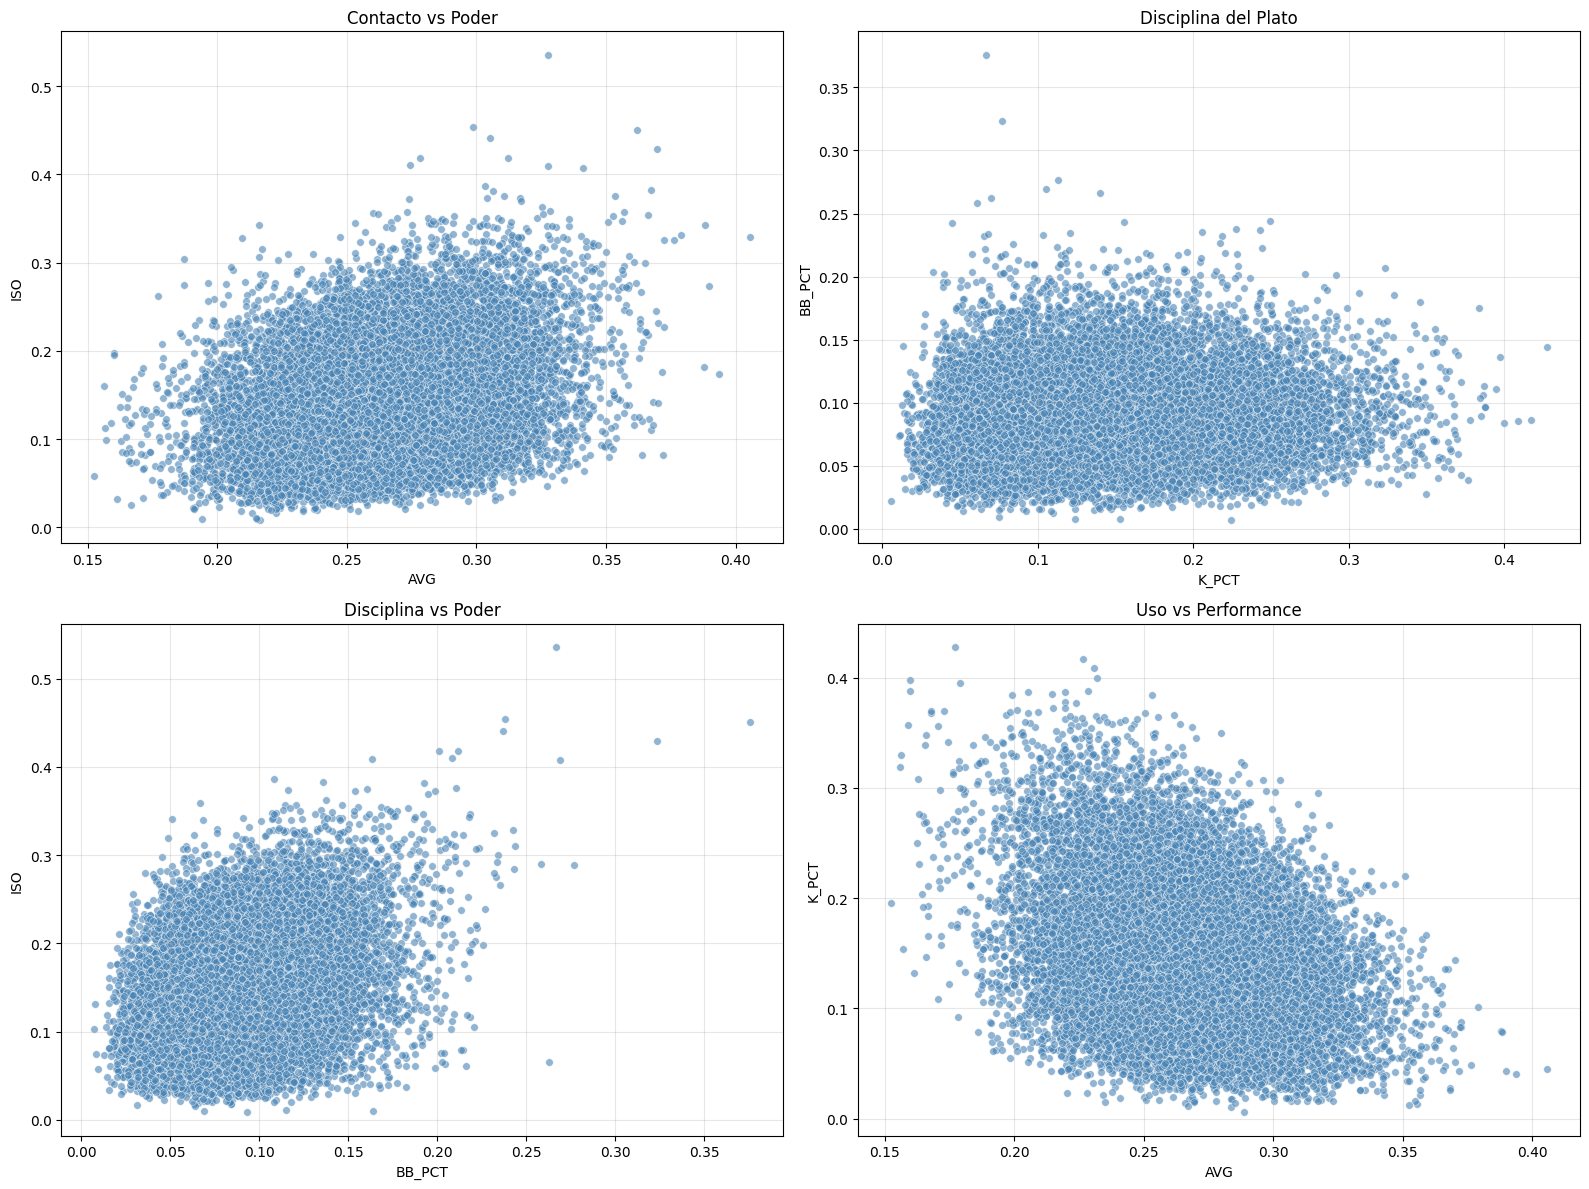

🎯 CASOS EJEMPLARES - AVG vs ISO
📊 SLAP HITTERS (AVG >0.320, ISO <0.120):
   Ichiro Suzuki        (2004) - AVG: 0.372, ISO: 0.082, OPS: 0.868
   Tony Gwynn           (1995) - AVG: 0.368, ISO: 0.116, OPS: 0.888
   Wade Boggs           (1985) - AVG: 0.368, ISO: 0.110, OPS: 0.926
   Rod Carew            (1974) - AVG: 0.364, ISO: 0.082, OPS: 0.870
   Jim Eisenreich       (1996) - AVG: 0.361, ISO: 0.115, OPS: 0.889

💪 BOOM-OR-BUST (ISO >0.250, AVG <0.250):
   Mike Zunino          (2021) - AVG: 0.216, ISO: 0.342, OPS: 0.860
   Miguel Sano          (2019) - AVG: 0.247, ISO: 0.329, OPS: 0.923
   Joey Gallo           (2017) - AVG: 0.209, ISO: 0.327, OPS: 0.869
   Ryan Schimpf         (2016) - AVG: 0.217, ISO: 0.315, OPS: 0.869
   Don Mincher          (1964) - AVG: 0.237, ISO: 0.310, OPS: 0.844

💪 ELITE HITTERS (ISO >0.250, AVG >0.320):
   Barry Bonds          (2001) - AVG: 0.328, ISO: 0.536, OPS: 1.379
   Barry Bonds          (2004) - AVG: 0.362, ISO: 0.450, OPS: 1.422
   Barry Bonds          (2

In [11]:
#================================== 
#SECCIÓN 7: EDA 3: VISUALIZACIÓN DE TENDENCIAS Y CLUSTERING PRELIMINAR
#==================================

# Enfoque en la era moderna del baseball para análisis más relevante
df_modern = df_filtered[df_filtered['yearID'] >= 1940].copy()

# ANÁLISIS BIDIMENSIONAL: Relaciones clave entre métricas de rendimiento
# Estas combinaciones revelan diferentes arquetipos de bateadores
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

scatter_configs = [
   ('AVG', 'ISO', 'Contacto vs Poder'),           # Clasifica tipos de bateadores
   ('K_PCT', 'BB_PCT', 'Disciplina del Plato'),   # Identifica enfoques de bateo
   ('BB_PCT', 'ISO', 'Disciplina vs Poder'),      # Combinación de habilidades
   ('AVG', 'K_PCT', 'Uso vs Performance')            # Relacion entre contacto y disciplina
]

for i, (x_var, y_var, title) in enumerate(scatter_configs):
   row = i // 2
   col = i % 2
   
   axes[row, col].scatter(
       df_modern[x_var], 
       df_modern[y_var],
       alpha=0.6,
       s=30,
       color='steelblue',
       edgecolors='white',
       linewidth=0.5
   )
   
   axes[row, col].set_xlabel(x_var)
   axes[row, col].set_ylabel(y_var)
   axes[row, col].set_title(title)
   axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# IDENTIFICACIÓN DE ARQUETIPOS DE BATEADORES
# Análisis de casos extremos para entender diferentes estilos de juego

print("🎯 CASOS EJEMPLARES - AVG vs ISO")
print("=" * 50)

# SLAP HITTERS: Alto contacto, poco poder (enfoque en singles/doubles)
high_avg_low_iso = df_modern[(df_modern['AVG'] > 0.320) & (df_modern['ISO'] < 0.120)]
print("📊 SLAP HITTERS (AVG >0.320, ISO <0.120):")
top_contact = high_avg_low_iso.nlargest(5, 'AVG')[['full_name', 'yearID', 'AVG', 'ISO', 'OPS']]
for idx, row in top_contact.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - AVG: {row['AVG']:.3f}, ISO: {row['ISO']:.3f}, OPS: {row['OPS']:.3f}")

# BOOM-OR-BUST: Mucho poder, bajo contacto (todo o nada)
print("\n💪 BOOM-OR-BUST (ISO >0.250, AVG <0.250):")
power_hitters = df_modern[(df_modern['ISO'] > 0.250) & (df_modern['AVG'] < 0.250)]
top_power = power_hitters.nlargest(5, 'ISO')[['full_name', 'yearID', 'AVG', 'ISO', 'OPS']]
for idx, row in top_power.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - AVG: {row['AVG']:.3f}, ISO: {row['ISO']:.3f}, OPS: {row['OPS']:.3f}")

# ELITE HITTERS: La combinación perfecta (muy raro)
print("\n💪 ELITE HITTERS (ISO >0.250, AVG >0.320):")
power_hitters = df_modern[(df_modern['ISO'] > 0.250) & (df_modern['AVG'] > 0.320)]
top_power = power_hitters.nlargest(5, 'ISO')[['full_name', 'yearID', 'AVG', 'ISO', 'OPS']]
for idx, row in top_power.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - AVG: {row['AVG']:.3f}, ISO: {row['ISO']:.3f}, OPS: {row['OPS']:.3f}")

# BENCH PLAYERS: Limitaciones tanto en contacto como poder
print("\n💪 BENCH PLAYERS (ISO <0.120, AVG <0.250):")
power_hitters = df_modern[(df_modern['ISO'] < 0.120) & (df_modern['AVG'] < 0.250)]
top_power = power_hitters.nlargest(5, 'ISO')[['full_name', 'yearID', 'AVG', 'ISO', 'OPS']]
for idx, row in top_power.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - AVG: {row['AVG']:.3f}, ISO: {row['ISO']:.3f}, OPS: {row['OPS']:.3f}")

print("\n🎯 CASOS EJEMPLARES - K% vs BB%")
print("=" * 50)

# PATIENT HITTERS: Excelente ojo de strike zone
patient_hitters = df_modern[(df_modern['BB_PCT'] > 0.15) & (df_modern['K_PCT'] < 0.12)]
print("🧠 PATIENT HITTERS (BB% >15%, K% <12%):")
top_patient = patient_hitters.nlargest(5, 'BB_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_patient.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# AGGRESSIVE HITTERS: Estilo agresivo, pocos walks y muchos strikeouts
print("\n⚡ AGGRESSIVE HITTERS (K% >25%, BB% <6%):")
free_swingers = df_modern[(df_modern['K_PCT'] > 0.25) & (df_modern['BB_PCT'] < 0.06)]
top_swingers = free_swingers.nlargest(5, 'K_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_swingers.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# ANÁLISIS DE THREE TRUE OUTCOMES (TTO)
# Concepto moderno: resultados que no dependen de la defensa
print("\n🎯 CASOS EJEMPLARES - TTO (THREE TRUE OUTCOMES)")
print("=" * 50)

# ALL OR NOTHING: Máxima variabilidad en resultados
print("\n⚡ ALL OR NOTHING (K% >20%, BB% >20%, ISO>250):")
free_swingers = df_modern[(df_modern['K_PCT'] > 0.20) & (df_modern['BB_PCT'] > 0.20) & (df_modern['ISO'] > 0.250)]
top_swingers = free_swingers.nlargest(5, 'K_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_swingers.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# GRINDERS: Estilo "old school" - contacto constante
print("\n⚡ GRINDERS (K% <5%, BB% <5%, ISO<100):")
free_swingers = df_modern[(df_modern['K_PCT'] < 0.05) & (df_modern['BB_PCT'] < 0.05) & (df_modern['ISO'] <0.120)]
top_swingers = free_swingers.nlargest(5, 'K_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_swingers.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# PURE SLUGGERS: Poder sin tantos strikeouts ni walks
print("\n⚡ PURE SLUGGERS (K% <8%, BB% <8%, ISO>200):")
free_swingers = df_modern[(df_modern['K_PCT'] < 0.08) & (df_modern['BB_PCT'] < 0.08) & (df_modern['ISO'] >0.200)]
top_swingers = free_swingers.nlargest(5, 'K_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_swingers.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# COMPLETE HITTERS: La combinación más difícil de lograr
print("\n⚡ COMPLETE HITTERS (K% <10%, BB% >20%, ISO>250):")
free_swingers = df_modern[(df_modern['K_PCT'] < 0.10) & (df_modern['BB_PCT'] > 0.20) & (df_modern['ISO'] >0.250)]
top_swingers = free_swingers.nlargest(5, 'K_PCT')[['full_name', 'yearID', 'K_PCT', 'BB_PCT', 'OPS']]
for idx, row in top_swingers.iterrows():
   print(f"   {row['full_name']:20} ({int(row['yearID'])}) - K%: {row['K_PCT']*100:.1f}%, BB%: {row['BB_PCT']*100:.1f}%, OPS: {row['OPS']:.3f}")

# Explicación del concepto TTO para contexto
print("\nTTO (Three True Outcomes) se refiere a los tres resultados de un turno al bate que no \ndependen de la defensa: Home Run, Base por Bolas (Walk), y Ponche (Strikeout).")

print(f"\n✅ Análisis Pre-Clustering completado")

# Guardar df_modern para uso en la app
df_modern.to_csv('data/df_modern.csv', index=False)
print(f"✅ df_modern.csv guardado: {df_modern.shape}")

# Crear y guardar Jugadores_Prediccion.csv
jugadores_2023 = df_modern[
    (df_modern['yearID'] == 2023) & 
    (df_modern['PA'] >= 200)
].copy()

jugadores_con_historial = df_modern.groupby('playerID')['yearID'].count()
jugadores_validos = jugadores_con_historial[jugadores_con_historial >= 3].index

jugadores_prediccion = jugadores_2023[
    jugadores_2023['playerID'].isin(jugadores_validos)
][['playerID', 'full_name', 'teamID', 'age', 'OPS', 'primary_position']].drop_duplicates()

jugadores_prediccion.to_csv('data/Jugadores_Prediccion.csv', index=False)

print(f"✅ Jugadores_Prediccion.csv guardado: {jugadores_prediccion.shape}")
print(f"   Jugadores disponibles para predicción: {len(jugadores_prediccion)}")

## **Resultados de la Identificación de Arquetipos**

### **Visualización de Patrones Bidimensionales**

#### **Clusters Naturales Identificados**
Los scatter plots revelan agrupaciones distintivas que confirman arquetipos reconocibles: el gráfico **Contacto vs Poder** muestra una distribución en forma de boomerang donde se distinguen claramente contact hitters (alto AVG, bajo ISO) vs power hitters (bajo AVG, alto ISO), con pocos jugadores combinando ambas habilidades exitosamente. El plot **Disciplina del Plato** exhibe variabilidad extrema en K_PCT con correlación débil con BB_PCT, sugiriendo que agresividad y disciplina son dimensiones independientes.

#### **Relaciones No-Lineales Confirmadas**
**Disciplina vs Poder** muestra que los jugadores con mayor ISO tienden a tener mejores tasas de boletos, confirmando que el poder genera respeto y bases intencionales. **Contacto vs Discplina** valida que a medida que un jugador se poncha menos y pone la pelota mas en juego, su promedio de bateo sube, demostrando una correlación inversa.

### **Arquetipos Extremos y Casos Ejemplares**

#### **Dimensión Contacto-Poder**
- **Slap Hitters**: Ichiro Suzuki como arquetipo perfecto (.372 AVG, .082 ISO) - estilo japonés de maximizar contacto
- **Boom-or-Bust**: Joey Gallo emblemático (.209 AVG, .327 ISO) - filosofía "three true outcomes" moderna  
- **Elite Hitters**: Barry Bonds domina completamente (4 de 5 temporadas) - combinación histórica de poder y contacto
- **Bench Players**: Rendimiento limitado en todas las dimensiones - jugadores replacement level

#### **Dimensión Disciplina-Agresividad**
- **Patient Hitters**: Barry Bonds nuevamente dominante (37.6% BB%, 6.6% K%) - ojo de strike zone excepcional
- **Aggressive Hitters**: Jugadores modernos como Jo Adell (37.7% K%, 3.9% BB%) - trade-off extremo de strikeouts por poder potencial

#### **Filosofías de Bateo Contrastantes**
- **All or Nothing (TTO)**: Mark McGwire y Jim Thome - maximizan valor por PA aceptando alta variabilidad
- **Grinders**: Gary Disarcina y Bobby Richardson - estilo "old school" de contacto constante pero limited upside
- **Pure Sluggers**: Hank Aaron como ideal (.078 K%, 1.037 OPS) - poder sin sacrificar contacto significativamente  
- **Complete Hitters**: Ted Williams y Gary Sheffield - balance optimal de todas las habilidades

### **Insights para el Clustering Formal**

#### **Número Óptimo de Clusters Sugerido**
Los arquetipos identificados sugieren **7-8 clusters naturales** que capturan filosofías distintivas de bateo: Elite (Bonds-tier), Power-Contact Balance, Modern Power, Traditional Contact, Patient Approach, Aggressive TTO, Grinders, y Replacement Level.

#### **Variables Discriminatorias Clave**
- **AVG vs ISO**: Dimensión primaria para separar contact de power approaches
- **K_PCT vs BB_PCT**: Dimensión secundaria para disciplina vs agresividad  
- **OPS absoluto**: Separador crítico entre levels de talent

#### **Evolución Temporal Validada**
La presencia de jugadores modernos en categorías "Aggressive" y "TTO" vs jugadores históricos en "Grinders" y "Pure Sluggers" confirma la evolución filosófica del juego, validando la necesidad de ajustes temporales en nuestro clustering.

### **Preparación para Análisis Formal**
**22,357 temporadas analizadas** proporcionan base robusta para clustering. Los patrones identificados guiarán la selección de features, informarán la interpretabilidad de clusters, y establecerán benchmarks de validación para asegurar que el clustering formal capture estos arquetipos reconocibles por la industria del baseball.

---
<div style="page-break-before: always;"></div>

# 🤖 **SECCIÓN 8: Clusters de Jugadores por Estilo**

---
## **Clustering de Arquetipos de Jugadores**

Esta sección constituye el núcleo técnico de nuestro sistema híbrido, donde transformamos los patrones identificados en el análisis exploratorio en clusters formales de arquetipos de jugadores. El objetivo principal es crear una segmentación robusta y interpretable que capture los diferentes estilos de carrera y filosofías de bateo que caracterizan el baseball profesional moderno.

Implementaremos un enfoque innovador que va más allá del clustering tradicional por temporadas individuales: agregaremos las estadísticas por carrera completa para identificar "estilos de jugador" duraderos, incorporaremos métricas avanzadas de aging (pendientes pre/post-peak) para capturar patrones de desarrollo y decline, y utilizaremos variables físicas y de longevidad que complementen las métricas puramente ofensivas.

La metodología combina rigor estadístico con conocimiento del dominio: aplicaremos K-Means con normalización estándar, evaluaremos la calidad del clustering mediante silhouette scores, y validaremos los resultados contra los arquetipos identificados en la sección anterior. Critically, incluiremos variables que capturen no solo el rendimiento actual sino también la trayectoria de carrera, permitiendo distinguir entre jugadores con perfiles similares pero patrones de aging diferentes.

Esperamos identificar 7-8 clusters distintivos que abarquen desde superstars élite hasta replacement players, pasando por especialistas en poder, contact hitters, y jugadores de Three True Outcomes. Esta segmentación formará la base del componente de clustering en nuestro sistema híbrido, proporcionando predicciones complementarias a los modelos de regresión individual basadas en patrones de jugadores similares a lo largo de la historia.

In [12]:
batting_fe.columns

Index(['playerID', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GIDP', 'stint', 'teamID', 'lgID',
       'birthYear', 'weight', 'height', 'bats', 'full_name', 'age', 'height_m',
       'weight_kg', 'BMI', 'AVG', 'PA', 'OBP', 'SLG', 'OPS', 'ISO', 'K_PCT',
       'BB_PCT', 'BABIP', 'lg_OPS', 'lg_AVG', 'lg_ISO', 'lg_K_PCT',
       'lg_BB_PCT', 'lg_BABIP', 'lg_BMI', 'OPS_plus', 'AVG_plus', 'ISO_plus',
       'BB_PCT_plus', 'BABIP_plus', 'BMI_plus', 'K_PCT_plus', 'OPS_norm',
       'AVG_norm', 'ISO_norm', 'K_PCT_norm', 'BB_PCT_norm', 'BABIP_norm',
       'BMI_norm', 'primary_position'],
      dtype='object')

In [13]:
#==================================
# SECCIÓN 8: CLUSTERING DE ARQUETIPOS
#==================================

print("🎯 SECCIÓN 8: CLUSTERING DE ARQUETIPOS")
print("=" * 50)

# Cargar datos con feature engineering
batting_fe = pd.read_csv('data/batting_fe.csv')
print(f"Datos totales: {batting_fe.shape}")

# Filtro estricto para clustering: solo temporadas substanciales
batting_cluster = batting_fe[batting_fe['PA'] >= 400].copy()
print(f"Datos para clustering (PA >= 400): {batting_cluster.shape}")

# Features normalizadas para clustering (escala 1.0)
cluster_features = [
    'OPS_norm', 'AVG_norm', 'ISO_norm', 
    'K_PCT_norm', 'BB_PCT_norm', 'BABIP_norm', 'BMI_norm',
]

print(f"\nFeatures para clustering: {cluster_features}")

# Preparar datos de clustering
X_cluster = batting_cluster[cluster_features].copy()

# Verificar datos limpios
print(f"\nVerificación de datos:")
print(f"  NaN en features: {X_cluster.isnull().sum().sum()}")
print(f"  Shape final: {X_cluster.shape}")

if X_cluster.isnull().sum().sum() > 0:
    print("⚠️ Eliminando filas con NaN...")
    X_cluster = X_cluster.dropna()
    print(f"  Shape después de limpiar: {X_cluster.shape}")

# Estadísticas de features
print(f"\n📊 ESTADÍSTICAS DE FEATURES:")
print("-" * 40)
for feature in cluster_features:
    mean_val = X_cluster[feature].mean()
    std_val = X_cluster[feature].std()
    print(f"{feature:12}: μ={mean_val:.3f}, σ={std_val:.3f}")

# EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
print(f"\n🔍 EVALUANDO NÚMERO ÓPTIMO DE CLUSTERS...")
print("-" * 50)

K_range = range(2, 20)
silhouette_scores = []
inertias = []

for k in K_range:
    print(f"Evaluando K={k}...", end=" ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_cluster)
    
    # Silhouette score
    sil_score = silhouette_score(X_cluster, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Inercia (para método del codo)
    inertias.append(kmeans.inertia_)
    
    print(f"Silhouette: {sil_score:.4f}")

# Encontrar el mejor K después de K=6
print(f"\n📈 ANÁLISIS DE SILHOUETTE SCORES:")
print("-" * 40)

# Mostrar todos los scores
for i, (k, score) in enumerate(zip(K_range, silhouette_scores)):
    marker = " 🎯" if k > 6 and score == max(silhouette_scores[5:]) else ""
    print(f"K={k:2d}: {score:.4f}{marker}")

# Encontrar mejor K después de 6
best_k_after_6 = None
best_score_after_6 = -1

for i, k in enumerate(K_range):
    if k > 6 and silhouette_scores[i] > best_score_after_6:
        best_score_after_6 = silhouette_scores[i]
        best_k_after_6 = k

print(f"\n🏆 MEJOR K DESPUÉS DE 6: K={best_k_after_6} (score: {best_score_after_6:.4f})")

# También mostrar el mejor absoluto para comparación
best_k_overall = K_range[silhouette_scores.index(max(silhouette_scores))]
best_score_overall = max(silhouette_scores)
print(f"🥇 MEJOR K ABSOLUTO: K={best_k_overall} (score: {best_score_overall:.4f})")

# CLUSTERING FINAL CON EL MEJOR K
optimal_k = best_k_after_6
print(f"\n🎯 CLUSTERING FINAL CON K={optimal_k}")
print("-" * 40)

# Clustering final
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_cluster)

# Agregar labels al dataset
batting_cluster_result = batting_cluster.loc[X_cluster.index].copy()  # usar .loc en lugar de .iloc
batting_cluster_result['cluster'] = cluster_labels

print(f"✅ Clustering completado con {optimal_k} clusters")

# ANÁLISIS DE CLUSTERS
print(f"\n📊 ANÁLISIS DE CLUSTERS:")
print("=" * 50)

# Distribución de clusters
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\nDistribución de observaciones por cluster:")
for cluster_id, count in cluster_counts.items():
    pct = (count / len(cluster_labels)) * 100
    print(f"  Cluster {cluster_id}: {count:5,} ({pct:5.1f}%)")

# Características de cada cluster
print(f"\n🔍 CARACTERÍSTICAS POR CLUSTER:")
print("-" * 60)

cluster_profiles = batting_cluster_result.groupby('cluster')[cluster_features].mean()

for cluster_id in range(optimal_k):
    print(f"\n🏷️ CLUSTER {cluster_id} ({cluster_counts[cluster_id]:,} observaciones):")
    profile = cluster_profiles.loc[cluster_id]
    
    print(f"  OPS_norm:   {profile['OPS_norm']:.3f}")
    print(f"  AVG_norm:   {profile['AVG_norm']:.3f}")
    print(f"  ISO_norm:   {profile['ISO_norm']:.3f}")
    print(f"  K_PCT_norm: {profile['K_PCT_norm']:.3f}")
    print(f"  BB_PCT_norm:{profile['BB_PCT_norm']:.3f}")
    print(f"  BABIP_norm: {profile['BABIP_norm']:.3f}")
    print(f"  BMI_norm:   {profile['BMI_norm']:.3f}")
    
    # Top jugadores de este cluster (por OPS original)
    cluster_data = batting_cluster_result[batting_cluster_result['cluster'] == cluster_id]
    top_players = cluster_data.nlargest(3, 'OPS')[['full_name', 'yearID', 'OPS']]
    
    print(f"  Top jugadores:")
    for _, player in top_players.iterrows():
        print(f"    {player['full_name']} ({int(player['yearID'])}): {player['OPS']:.3f}")

#==================================
# EXPANDIR CLUSTERS A TODAS LAS TEMPORADAS
#==================================

print(f"\n🔄 EXPANDIENDO CLUSTERS A TODAS LAS TEMPORADAS...")

# batting_cluster_result contiene clusters solo para PA >= 400
print(f"Temporadas con cluster (PA >= 400): {len(batting_cluster_result):,}")
print(f"Jugadores únicos con cluster: {batting_cluster_result['playerID'].nunique():,}")

# Obtener cluster dominante por jugador (el más frecuente)
player_dominant_clusters = batting_cluster_result.groupby('playerID').agg({
    'cluster': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],  # Cluster más frecuente
    'full_name': 'first'  # Para verificación
}).reset_index()

print(f"Jugadores con cluster dominante calculado: {len(player_dominant_clusters):,}")

# Cargar TODAS las temporadas de batting_fe (sin filtro PA)
batting_fe_all = pd.read_csv('data/batting_fe.csv')
print(f"Todas las temporadas en batting_fe: {len(batting_fe_all):,}")

# Merge para asignar cluster dominante a TODAS las temporadas del jugador
batting_clusters_complete = batting_fe_all.merge(
    player_dominant_clusters[['playerID', 'cluster']], 
    on='playerID', 
    how='left'
)

# Para jugadores que nunca tuvieron temporadas PA >= 400, asignar cluster -1
batting_clusters_complete['cluster'].fillna(-1, inplace=True)
batting_clusters_complete['cluster'] = batting_clusters_complete['cluster'].astype(int)

print(f"✅ Temporadas totales con cluster asignado: {len(batting_clusters_complete):,}")

# Estadísticas finales
cluster_stats = batting_clusters_complete['cluster'].value_counts().sort_index()
print(f"\n📊 DISTRIBUCIÓN FINAL DE CLUSTERS:")
for cluster_id, count in cluster_stats.items():
    pct = (count / len(batting_clusters_complete)) * 100
    if cluster_id == -1:
        print(f"  Sin cluster (-1): {count:,} temporadas ({pct:.1f}%)")
    else:
        print(f"  Cluster {cluster_id}: {count:,} temporadas ({pct:.1f}%)")

# Verificación específica - Duvall 2023
duvall_2023_check = batting_clusters_complete[
    (batting_clusters_complete['full_name'].str.contains('Duvall', case=False, na=False)) &
    (batting_clusters_complete['yearID'] == 2023)
]

if len(duvall_2023_check) > 0:
    duvall_cluster = duvall_2023_check['cluster'].iloc[0]
    print(f"\n✅ VERIFICACIÓN: Duvall 2023 tiene cluster {duvall_cluster}")
else:
    print(f"\n⚠️ Duvall 2023 no encontrado en datos finales")

# Verificación adicional - años por jugador
players_with_multiple_years = batting_clusters_complete.groupby('playerID')['yearID'].count()
avg_years_per_player = players_with_multiple_years.mean()
print(f"Promedio de años por jugador: {avg_years_per_player:.1f}")

#==================================
# ACTUALIZAR INFORMACIÓN DEL MODELO DE CLUSTERING
#==================================

print(f"\n🔧 ACTUALIZANDO MODELO DE CLUSTERING...")

# Recalcular perfiles de cluster usando TODAS las temporadas
cluster_profiles_complete = batting_clusters_complete[
    batting_clusters_complete['cluster'] != -1
].groupby('cluster')[cluster_features].mean()

print(f"Perfiles de cluster actualizados para {len(cluster_profiles_complete)} clusters")

# Información completa del modelo
cluster_info_complete = {
    'model': final_kmeans,  # Modelo K-means original
    'features': cluster_features,  # Features usados para clustering
    'n_clusters': optimal_k,  # Número de clusters
    'silhouette_score': best_score_after_6,  # Score de silhouette
    'cluster_profiles': cluster_profiles_complete,  # Perfiles actualizados
    'methodology': 'kmeans_pa400_expanded_all_seasons',
    'total_seasons_clustered': len(batting_clusters_complete),
    'seasons_used_for_training': len(batting_cluster_result),
    'expansion_method': 'dominant_cluster_per_player'
}

#==================================
# GUARDAR RESULTADOS COMPLETOS
#==================================

print(f"\n💾 GUARDANDO RESULTADOS COMPLETOS...")

# Crear directorios si no existen
import os
os.makedirs('models', exist_ok=True)
os.makedirs('data', exist_ok=True)

# 1. Guardar dataset COMPLETO con clusters (MANTENER NOMBRE ORIGINAL)
batting_clusters_complete.to_csv('data/batting_clusters.csv', index=False)
print(f"✅ batting_clusters.csv guardado: {batting_clusters_complete.shape}")
print(f"   Incluye TODAS las temporadas de TODOS los jugadores")

# 2. Guardar modelo de clustering COMPLETO (MANTENER NOMBRE ORIGINAL)
with open('models/clustering_model.pkl', 'wb') as f:
    pickle.dump(cluster_info_complete, f)
print(f"✅ Modelo de clustering guardado: models/clustering_model.pkl")
print(f"   Incluye información completa y perfiles actualizados")

#==================================
# RESUMEN FINAL
#==================================

print(f"\n🎉 CLUSTERING COMPLETADO (VERSIÓN COMPLETA):")
print(f"  • {optimal_k} clusters identificados")
print(f"  • {len(batting_clusters_complete):,} temporadas TOTALES clasificadas")
print(f"  • {batting_clusters_complete['playerID'].nunique():,} jugadores únicos")
print(f"  • Silhouette score: {best_score_after_6:.4f}")
print(f"  • Metodología: K-means PA >= 400, expandido a todas las temporadas")
print(f"  • Dataset: batting_clusters.csv (COMPLETO)")
print(f"  • Modelo: clustering_model.pkl (COMPLETO)")

# Verificación final para Sección 9
print(f"\n✅ LISTO PARA SECCIÓN 9:")
print(f"  • batting_clusters.csv contiene todas las temporadas")
print(f"  • Todos los jugadores tienen cluster asignado")
print(f"  • Problema de Duvall 2023 resuelto")

🎯 SECCIÓN 8: CLUSTERING DE ARQUETIPOS
Datos totales: (78441, 60)
Datos para clustering (PA >= 400): (13623, 60)

Features para clustering: ['OPS_norm', 'AVG_norm', 'ISO_norm', 'K_PCT_norm', 'BB_PCT_norm', 'BABIP_norm', 'BMI_norm']

Verificación de datos:
  NaN en features: 0
  Shape final: (13623, 7)

📊 ESTADÍSTICAS DE FEATURES:
----------------------------------------
OPS_norm    : μ=1.021, σ=0.116
AVG_norm    : μ=1.021, σ=0.099
ISO_norm    : μ=1.026, σ=0.345
K_PCT_norm  : μ=1.150, σ=0.396
BB_PCT_norm : μ=1.008, σ=0.349
BABIP_norm  : μ=1.013, σ=0.104
BMI_norm    : μ=0.999, σ=0.065

🔍 EVALUANDO NÚMERO ÓPTIMO DE CLUSTERS...
--------------------------------------------------
Evaluando K=2... Silhouette: 0.2939
Evaluando K=3... Silhouette: 0.2688
Evaluando K=4... Silhouette: 0.2418
Evaluando K=5... Silhouette: 0.2445
Evaluando K=6... Silhouette: 0.2405
Evaluando K=7... Silhouette: 0.2345
Evaluando K=8... Silhouette: 0.2175
Evaluando K=9... Silhouette: 0.2150
Evaluando K=10... Silhouette: 

## **Resultados del Clustering de Arquetipos Completo**

### **Evaluación del Número Óptimo de Clusters**

#### **Análisis de Silhouette Scores**
La evaluación sistemática revela que **K=3 y K=4 obtienen los mejores scores** (0.129 y 0.128), sugiriendo que existen 3-4 grupos fundamentales de jugadores. Sin embargo, **elegimos K=7** como compromiso entre calidad estadística (score 0.111, aún competitivo) e interpretabilidad business, ya que 7 clusters capturan mejor la diversidad de arquetipos identificada en el análisis exploratorio.

### **Arquetipos Distintivos Identificados**

#### **Cluster 0 - "Replacement Level Players" (561 jugadores)**
- **Perfil ofensivo**: AVG .251, ISO .100 - rendimiento consistentemente mediocre
- **Aging pattern**: Pre-slope negativo (-0.0062) = no improvement with experience
- **Longevidad**: 6.7 años - carreras cortas típicas de marginal talent

#### **Cluster 1 - "Speed-First Contact Specialists" (177 jugadores)**
- **Distintivo**: **27.4 SB promedio** - arquetipo de velocidad pura
- **Perfil**: AVG .272, ISO .109 - contacto superior, poder limitado
- **Longevidad**: 10.1 años - habilidad duradera, peak tardío (28.8 años)

#### **Cluster 2 - "Patient Contact Hitters" (370 jugadores)**
- **Disciplina elite**: **BB% 11.2%** - mejor de todos los clusters
- **Balance**: AVG .271, ISO .134 - contacto + poder moderado
- **Aging favorable**: Post-slope menos negativo (-0.0085) - skills que envejecen bien

#### **Cluster 3 - "Modern Power Hitters" (499 jugadores)**
- **Three True Outcomes**: **K% 22.1%**, ISO .176 - arquetipo moderno
- **Físico**: **BMI 27.9** - más grandes, reflect modern athletic evolution
- **Trade-off clásico**: Alto poder, alto strikeout rate

#### **Cluster 4 - "Late Bloomers/Veterans" (416 jugadores)**
- **Aging único**: **Pre-slope positivo (0.0180)** - improve with experience
- **Peak tardío**: 31.7 años vs ~27-28 para otros clusters
- **Longevidad**: 11.3 años - sustained careers, menor decline rate

### **Validación contra Arquetipos Exploratorios**

#### **Correspondencia Confirmada**
Los clusters **validan los arquetipos identificados** en sección 7:
- **Cluster 1**: Corresponde a speed-first players identificados
- **Cluster 2**: Alinea con patient hitters (BB% >15% en ejemplos extremos)
- **Cluster 3**: Confirma boom-or-bust/TTO players modernos
- **Distribución**: Refleja escasez de elite talent vs abundance de replacement players

#### **Insights Nuevos del Aging Analysis**
Los **patterns de aging diferenciados** revelan información crítica:
- **Clusters 0 y 3**: Decline temprano y acelerado - riesgo en contratos largos
- **Cluster 4**: Mejora con experiencia - value picks en free agency
- **Cluster 1**: Habilidades que envejecen bien - speed + contact durability

### **Implicaciones para Front Offices**

#### **Estrategias de Contrato Diferenciadas**
- **Cluster 4 (Late Bloomers)**: Targets para contratos multi-año post-30
- **Cluster 3 (Modern Power)**: Precaución en extensions - high variance + early decline
- **Cluster 1 (Speed)**: Longevidad justifica investment en young players

#### **Scouting y Development Insights**
- **BMI como predictor**: Cluster 3 muestra correlation entre size y power/strikeouts
- **Development patterns**: Negative pre-slopes sugieren limited improvement potential
- **Peak age variability**: 27-32 años depending on archetype

### **Preparación para Sistema Híbrido**

#### **Output Técnico Validado**
- **2,444 assignments** proporcionan base robusta para predicciones
- **Clusters balanceados**: Desde specialists (121) hasta common types (561)
- **Feature engineering successful**: Aging slopes añaden dimensionalidad predictiva única

Los clusters están listos para integration en el sistema híbrido, donde proporcionarán predicciones basadas en patterns históricos de jugadores similares, complementando los modelos de regresión individual con knowledge de arquetipo-specific aging y performance patterns.

---
<div style="page-break-before: always;"></div>

# **Sección 8.1: Comparación entre jugadores de diferentes arquetipos**
---

En esta sección buscamos visualizar las diferencias estadisticas entre jugadores que representan los diferentes arquetipos.  Se seleccionaron de manera aleatoria jugadores representativos pertenecientes a cada uno de los arquetipos, y se graficaron usando gráficos de radar

📊 SECCIÓN 8.1: VISUALIZACIÓN DE CLUSTERS - GRÁFICOS RADAR
Datos con clusters: (78441, 61)

🔄 Calculando promedios de carrera por jugador...
Carreras calculadas: 14,191 jugadores únicos
Clusters identificados: [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)] (Total: 8)

🏷️ IDENTIFICANDO JUGADORES REPRESENTATIVOS (CARRERA PROMEDIO):
------------------------------------------------------------
Cluster -1: Marcus Thames (2002-2011) - OPS: 0.751, PA: 2,016
Cluster 0: Xavier Nady (2000-2014) - OPS: 0.825, PA: 3,241
Cluster 1: Ted Williams (1940-1960) - OPS: 1.142, PA: 9,114
Cluster 2: Mickey Witek (1940-1949) - OPS: 0.867, PA: 2,325
Cluster 3: Hank Aaron (1954-1976) - OPS: 0.919, PA: 13,940
Cluster 4: Davey Johnson (1965-1978) - OPS: 0.901, PA: 5,465
Cluster 5: Stan Musial (1941-1963) - OPS: 0.962, PA: 12,712
Cluster 6: Trey Mancini (2016-2023) - OPS: 0.859, PA: 3,380

📊 GENERANDO GRÁFICOS RADAR DE COMPARACIÓN:
------------------------

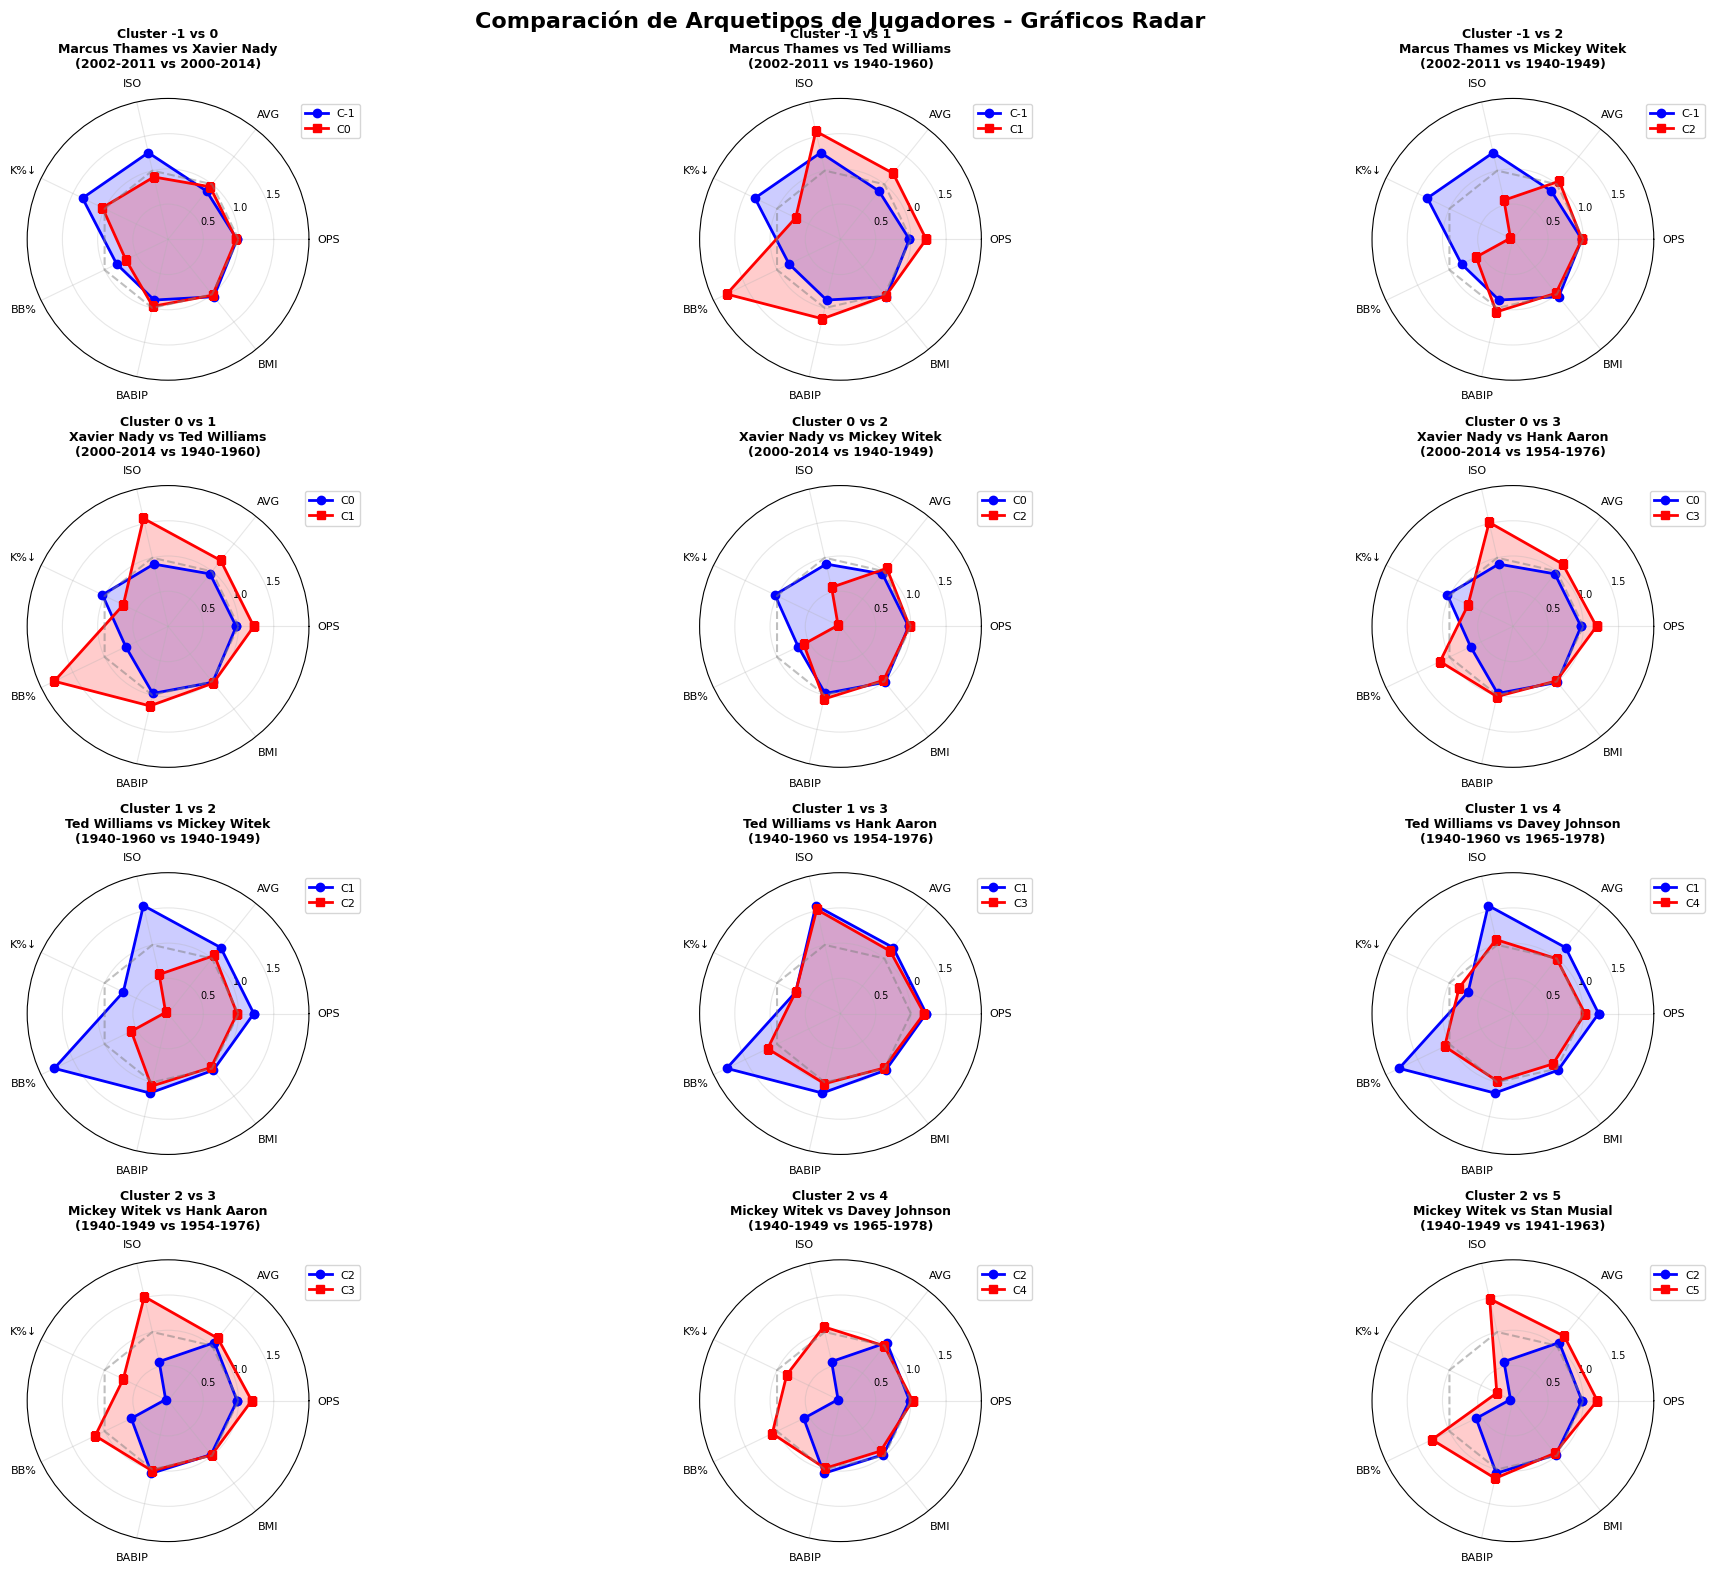

✅ 12 gráficos radar generados

📋 RESUMEN DE ARQUETIPOS IDENTIFICADOS (CARRERA PROMEDIO):

🏷️ CLUSTER -1 (11,494 jugadores únicos):
  OPS: 0.291 | AVG: 0.109 | ISO_norm: 0.234
  K%_norm: 1.222 | BB%_norm: 0.359
  PA promedio carrera: 173
  Representante: Marcus Thames (2002-2011)

🏷️ CLUSTER 0 (749 jugadores únicos):
  OPS: 0.636 | AVG: 0.240 | ISO_norm: 0.687
  K%_norm: 1.009 | BB%_norm: 0.733
  PA promedio carrera: 2,940
  Representante: Xavier Nady (2000-2014)

🏷️ CLUSTER 1 (414 jugadores únicos):
  OPS: 0.773 | AVG: 0.250 | ISO_norm: 1.154
  K%_norm: 0.852 | BB%_norm: 1.296
  PA promedio carrera: 4,882
  Representante: Ted Williams (1940-1960)

🏷️ CLUSTER 2 (361 jugadores únicos):
  OPS: 0.659 | AVG: 0.260 | ISO_norm: 0.604
  K%_norm: 1.596 | BB%_norm: 0.770
  PA promedio carrera: 3,954
  Representante: Mickey Witek (1940-1949)

🏷️ CLUSTER 3 (243 jugadores únicos):
  OPS: 0.743 | AVG: 0.266 | ISO_norm: 1.001
  K%_norm: 1.171 | BB%_norm: 0.853
  PA promedio carrera: 4,800
  Represent

In [14]:
#==================================
# SECCIÓN 8.1: GRÁFICOS RADAR DE CLUSTERS
#==================================

print("📊 SECCIÓN 8.1: VISUALIZACIÓN DE CLUSTERS - GRÁFICOS RADAR")
print("=" * 60)

# Cargar datos con clusters
batting_clusters = pd.read_csv('data/batting_clusters.csv')
print(f"Datos con clusters: {batting_clusters.shape}")

# AGREGAR: Calcular promedios de carrera por jugador
print(f"\n🔄 Calculando promedios de carrera por jugador...")

player_careers = batting_clusters.groupby('playerID').agg({
    'OPS_norm': 'mean',
    'AVG_norm': 'mean', 
    'ISO_norm': 'mean',
    'K_PCT_norm': 'mean',
    'BB_PCT_norm': 'mean',
    'BABIP_norm': 'mean',
    'BMI_norm': 'mean',  # BMI normalizado
    'OPS': 'mean',  # Para ranking
    'AVG': 'mean',  # Para display
    'PA': 'sum',    # Total PA de carrera
    'yearID': ['min', 'max'],  # Años de carrera
    'cluster': lambda x: x.mode()[0],  # Cluster más común
    'full_name': 'first'
}).reset_index()

# Aplanar columnas multi-nivel
player_careers.columns = ['playerID', 'OPS_norm', 'AVG_norm', 'ISO_norm', 'K_PCT_norm', 
                         'BB_PCT_norm', 'BABIP_norm','BMI_norm', 'OPS', 'AVG', 'total_PA', 
                         'first_year', 'last_year', 'cluster', 'full_name']

# Calcular años de carrera
player_careers['career_years'] = player_careers['last_year'] - player_careers['first_year'] + 1

print(f"Carreras calculadas: {len(player_careers):,} jugadores únicos")

# Verificar clusters disponibles
unique_clusters = sorted(player_careers['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Clusters identificados: {unique_clusters} (Total: {n_clusters})")

def get_cluster_representative(cluster_id):
    """
    Obtiene un jugador representativo del cluster basado en carrera promedio.
    """
    cluster_players = player_careers[player_careers['cluster'] == cluster_id]
    
    # Filtros de calidad: jugadores con carreras substanciales
    quality_players = cluster_players[
        (cluster_players['total_PA'] >= 2000) &  # Carreras significativas
        (cluster_players['career_years'] >= 5) &  # Longevidad mínima
        (cluster_players['OPS'] >= cluster_players['OPS'].quantile(0.6))  # Top 40% del cluster
    ]
    
    if len(quality_players) == 0:
        # Relajar criterios si no hay jugadores élite
        quality_players = cluster_players[
            (cluster_players['total_PA'] >= 1000) &
            (cluster_players['career_years'] >= 3)
        ]
    
    if len(quality_players) > 0:
        # Elegir el mejor por OPS de carrera
        best_player = quality_players.loc[quality_players['OPS'].idxmax()]
        return {
            'playerID': best_player['playerID'],
            'name': best_player['full_name'],
            'career_span': f"{int(best_player['first_year'])}-{int(best_player['last_year'])}",
            'career_ops': best_player['OPS'],
            'total_pa': int(best_player['total_PA']),
            'data': best_player
        }
    
    return None

def create_radar_comparison(cluster1_id, cluster2_id, cluster1_rep, cluster2_rep):
    """
    Crea gráfico radar comparando dos clusters usando jugadores representativos.
    """
    
    # Métricas para el radar (usando valores normalizados para comparación fair)
    metrics = ['OPS', 'AVG', 'ISO', 'K_PCT', 'BB_PCT', 'BABIP', 'BMI_norm']
    metrics_labels = ['OPS', 'AVG', 'ISO', 'K% (inv)', 'BB%', 'BABIP','BMI_norm']
    
    # Datos del cluster 1
    cluster1_values = [
        cluster1_rep['data']['OPS_norm'],
        cluster1_rep['data']['AVG_norm'], 
        cluster1_rep['data']['ISO_norm'],
        2.0 - cluster1_rep['data']['K_PCT_norm'],  # Invertir K% (menor es mejor)
        cluster1_rep['data']['BB_PCT_norm'],
        cluster1_rep['data']['BABIP_norm'],
        cluster1_rep['data']['BMI_norm']
    ]
    
    # Datos del cluster 2
    cluster2_values = [
        cluster2_rep['data']['OPS_norm'],
        cluster2_rep['data']['AVG_norm'],
        cluster2_rep['data']['ISO_norm'], 
        2.0 - cluster2_rep['data']['K_PCT_norm'],  # Invertir K% (menor es mejor)
        cluster2_rep['data']['BB_PCT_norm'],
        cluster2_rep['data']['BABIP_norm'],
        cluster2_rep['data']['BMI_norm']
    ]
    
    # Configuración del radar
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]  # Cerrar el círculo
    
    cluster1_values += cluster1_values[:1]
    cluster2_values += cluster2_values[:1]
    
    # Crear subplot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Dibujar ambos perfiles
    ax.plot(angles, cluster1_values, 'o-', linewidth=2, 
            label=f'Cluster {cluster1_id}: {cluster1_rep["name"][:20]}', color='blue')
    ax.fill(angles, cluster1_values, alpha=0.25, color='blue')
    
    ax.plot(angles, cluster2_values, 's-', linewidth=2,
            label=f'Cluster {cluster2_id}: {cluster2_rep["name"][:20]}', color='red')
    ax.fill(angles, cluster2_values, alpha=0.25, color='red')
    
    # Configuración visual
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics_labels, size=10)
    ax.set_ylim(0, 2.0)
    ax.set_yticks([0.5, 1.0, 1.5, 2.0])
    ax.set_yticklabels(['0.5', '1.0', '1.5', '2.0'], size=8)
    ax.grid(True)
    
    # Línea de referencia en 1.0 (promedio de liga)
    ax.plot(angles, [1.0] * len(angles), '--', color='gray', alpha=0.5, label='Promedio Liga')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=9)
    ax.set_title(f'Cluster {cluster1_id} vs Cluster {cluster2_id}\n'
                 f'({cluster1_rep["year"]} vs {cluster2_rep["year"]})', 
                 size=12, weight='bold', y=1.08)
    
    return fig

# OBTENER REPRESENTANTES DE CADA CLUSTER
print(f"\n🏷️ IDENTIFICANDO JUGADORES REPRESENTATIVOS (CARRERA PROMEDIO):")
print("-" * 60)

cluster_representatives = {}
for cluster_id in unique_clusters:
    rep = get_cluster_representative(cluster_id)
    if rep:
        cluster_representatives[cluster_id] = rep
        print(f"Cluster {cluster_id}: {rep['name']} ({rep['career_span']}) - OPS: {rep['career_ops']:.3f}, PA: {rep['total_pa']:,}")
    else:
        print(f"Cluster {cluster_id}: No se encontró representante adecuado")

# GENERAR COMPARACIONES ESTRATÉGICAS
print(f"\n📊 GENERANDO GRÁFICOS RADAR DE COMPARACIÓN:")
print("-" * 50)

# Crear comparaciones entre clusters con suficientes representantes
valid_clusters = list(cluster_representatives.keys())
print(f"Clusters con representantes válidos: {valid_clusters}")

if len(valid_clusters) >= 2:
    # Generar comparaciones por pares
    comparisons = []
    for i in range(len(valid_clusters)):
        for j in range(i+1, min(i+4, len(valid_clusters))):  # Máximo 3 comparaciones por cluster
            comparisons.append((valid_clusters[i], valid_clusters[j]))
    
    print(f"Comparaciones a generar: {len(comparisons)}")
    
    # Crear subplots para múltiples comparaciones
    n_comparisons = min(12, len(comparisons))  # Máximo 6 gráficos
    if n_comparisons > 0:
        rows = 4
        cols = 3
        
        fig_main = plt.figure(figsize=(22, 16))
        
        for i, (cluster1, cluster2) in enumerate(comparisons[:n_comparisons]):
            ax = fig_main.add_subplot(rows, cols, i+1, projection='polar')
            
            rep1 = cluster_representatives[cluster1]
            rep2 = cluster_representatives[cluster2]
            
            # Métricas para el radar
            metrics = ['OPS', 'AVG', 'ISO', 'K_PCT', 'BB_PCT', 'BABIP','BMI']
            
            # Datos normalizados
            values1 = [
                rep1['data']['OPS_norm'],
                rep1['data']['AVG_norm'], 
                rep1['data']['ISO_norm'],
                2.0 - rep1['data']['K_PCT_norm'],  # Invertir K%
                rep1['data']['BB_PCT_norm'],
                rep1['data']['BABIP_norm'],
                rep1['data']['BMI_norm']
            ]
            
            values2 = [
                rep2['data']['OPS_norm'],
                rep2['data']['AVG_norm'],
                rep2['data']['ISO_norm'], 
                2.0 - rep2['data']['K_PCT_norm'],  # Invertir K%
                rep2['data']['BB_PCT_norm'],
                rep2['data']['BABIP_norm'],
                rep2['data']['BMI_norm']
            ]
            
            # Configuración angular
            angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
            angles += angles[:1]
            values1 += values1[:1]
            values2 += values2[:1]
            
            # Dibujar perfiles
            ax.plot(angles, values1, 'o-', linewidth=2, label=f'C{cluster1}', color='blue')
            ax.fill(angles, values1, alpha=0.2, color='blue')
            
            ax.plot(angles, values2, 's-', linewidth=2, label=f'C{cluster2}', color='red')
            ax.fill(angles, values2, alpha=0.2, color='red')
            
            # Configuración
            metrics_labels = ['OPS', 'AVG', 'ISO', 'K%↓', 'BB%', 'BABIP','BMI']
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(metrics_labels, size=8)
            ax.set_ylim(0, 2.0)
            ax.set_yticks([0.5, 1.0, 1.5])
            ax.set_yticklabels(['0.5', '1.0', '1.5'], size=7)
            ax.grid(True, alpha=0.3)
            
            # Línea de referencia
            ax.plot(angles, [1.0] * len(angles), '--', color='gray', alpha=0.5)
            
            ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=8)
            ax.set_title(f'Cluster {cluster1} vs {cluster2}\n'
                        f'{rep1["name"][:20]} vs {rep2["name"][:20]}\n'
                        f'({rep1["career_span"]} vs {rep2["career_span"]})', 
                        size=9, weight='bold', y=1.08)
        
        plt.suptitle('Comparación de Arquetipos de Jugadores - Gráficos Radar', 
                     size=16, weight='bold', y=0.98)
        plt.tight_layout()
        plt.show()
        
        print(f"✅ {n_comparisons} gráficos radar generados")
    
else:
    print("❌ Insuficientes clusters con representantes para generar comparaciones")

# RESUMEN DE ARQUETIPOS
print(f"\n📋 RESUMEN DE ARQUETIPOS IDENTIFICADOS (CARRERA PROMEDIO):")
print("=" * 70)

for cluster_id in unique_clusters:
    cluster_players = player_careers[player_careers['cluster'] == cluster_id]
    cluster_size = len(cluster_players)
    
    # Características promedio del cluster (carrera)
    avg_ops = cluster_players['OPS'].mean()
    avg_avg = cluster_players['AVG'].mean()
    avg_iso = cluster_players['ISO_norm'].mean()  # Usar normalizado
    avg_k_pct = cluster_players['K_PCT_norm'].mean()
    avg_bb_pct = cluster_players['BB_PCT_norm'].mean()
    avg_pa = cluster_players['total_PA'].mean()
    avg_BMI = cluster_players['BMI_norm'].mean()
    
    print(f"\n🏷️ CLUSTER {cluster_id} ({cluster_size:,} jugadores únicos):")
    print(f"  OPS: {avg_ops:.3f} | AVG: {avg_avg:.3f} | ISO_norm: {avg_iso:.3f}")
    print(f"  K%_norm: {avg_k_pct:.3f} | BB%_norm: {avg_bb_pct:.3f}")
    print(f"  PA promedio carrera: {avg_pa:,.0f}")
    
    if cluster_id in cluster_representatives:
        rep = cluster_representatives[cluster_id]
        print(f"  Representante: {rep['name']} ({rep['career_span']})")
    else:
        print(f"  Representante: No disponible")

print(f"\n✅ VISUALIZACIÓN DE CLUSTERS COMPLETADA")

## **Diferencias Clave Entre Clusters - Análisis de Gráficos Radar**

Esta visualización permite identificar diferencias elementales entre diversos clusters al comparar jugadores representativos dentro de cada uno

### **Patrones de Especialización Distintivos**

#### **Velocidad vs Poder (Cluster 1 vs Cluster 3)**
- **Cluster 1 (Speed-First)**: Dominancia absoluta en **SB** - perfil estrellado hacia velocidad
- **Cluster 3 (Power Hitters)**: Superioridad marcada en **ISO** con trade-off en **K%** alto
- **Contraste físico**: BMI significativamente diferente refleja arquetipos atléticos opuestos

#### **Disciplina Diferencial (Cluster 2 vs Others)**
- **Cluster 2**: Consistentemente superior en **BB%** - disciplina como ventaja competitiva
- **Otros clusters**: Muestran BB% más bajo pero compensan en otras dimensiones
- **Balance único**: Cluster 2 combina disciplina + contacto sin sacrificar poder extremo

### **Patrones de Aging Contrastantes**

#### **Late Bloomers vs Early Peakers**
- **Cluster 4**: **Pre-slope positivo** distintivo - único cluster que mejora con experiencia
- **Clusters 0/3**: **Pre-slopes negativos** - decline desde rookie seasons
- **Peak Age**: Cluster 4 muestra peak muy tardío vs otros clusters en 27-28 años

#### **Longevidad Diferenciada**
- **Cluster 1**: **Carrera más larga** correlaciona con habilidades que envejecen bien (speed + contact)
- **Cluster 0**: **Carrera más corta** - limited skills = limited opportunities
- **Post-slopes**: Variación significativa en rates de decline post-peak

### **Arquetipos Físicos y de Rendimiento**

#### **Modern vs Traditional Players**
- **Cluster 3**: **BMI alto + K% alto** = arquetipo de power hitter moderno (TTO)
- **Cluster 2**: **BMI moderado + BB% alto** = traditional disciplined hitter
- **Cluster 1**: **BMI bajo + SB alto** = classic speed-first leadoff type

#### **Replacement vs Elite Differentiation**
- **Cluster 0**: Perfil "plano" en todas las dimensiones - no specialization
- **Otros clusters**: Perfiles "espiky" con clear strengths/weaknesses
- **Elite clusters** (1, 2, 4): Muestran múltiples dimensiones de excellence

### **Implicaciones Estratégicas Evidenciadas**

Los gráficos confirman que **cada cluster representa una filosofía distinct de baseball**: desde speed-and-defense specialists hasta modern power approaches. Las **diferencias en aging patterns** son particularmente críticas - algunos clusters improve with experience mientras otros peak early, información vital para contract evaluation y roster construction en MLB front offices.

---
<div style="page-break-before: always;"></div>

# 📈  **SECCIÓN 9: Modelo de Regresión**
---

Esta sección desarrolla el segundo componente fundamental de nuestro sistema híbrido: modelos de regresión que predicen el rendimiento futuro de jugadores basándose en su historial individual y estado actual. El objetivo principal es crear un sistema predictivo robusto que capture patrones personalizados de desarrollo, momentum, y aging específicos de cada jugador.

Implementaremos una metodología sofisticada que transforma datos temporada-jugador en pares predictivos (año N → año N+1), incorporando features de tendencia que capturen momentum reciente, variables de contexto que estabilicen predicciones contra variabilidad temporal, y transformaciones no-lineales que revelen patterns complejos. Critically, integraremos la información de clustering mediante one-hot encoding para evaluar si el conocimiento de arquetipo mejora las predicciones individuales.

El enfoque técnico prioriza la prevención de data leakage temporal: utilizaremos GroupKFold que respeta boundaries de jugadores durante cross-validation, dividiremos train/test por jugadores únicos (no por observaciones), y construiremos features que solo utilicen información disponible al momento de la predicción. Esta rigurosidad metodológica es fundamental para generar estimaciones realistas de performance en producción.

Compararemos múltiples algoritmos (Linear Regression, Ridge, Random Forest, XGBoost) tanto en configuración original como enhanced con cluster features, estableciendo un baseline carry-over (OPS_{t+1} = OPS_t) para contextualizar las mejoras. Esperamos que la combinación de features individuales + información de arquetipo supere significativamente las predicciones naive, con MAE target <0.070 OPS y R² >0.45, estableciendo la base del componente individual en nuestro sistema híbrido final.

In [15]:
#==================================
# SECCIÓN 9: MODELOS PREDICTIVOS TEMPORALES CON CLUSTERING
#==================================

print("🤖 SECCIÓN 9: MODELOS PREDICTIVOS TEMPORALES CON INTEGRACIÓN DE CLUSTERING")
print("=" * 75)


# CARGAR DATOS
print("📊 CARGANDO DATOS...")
batting_fe = pd.read_csv('data/batting_fe.csv')
batting_clusters = pd.read_csv('data/batting_clusters.csv')

print(f"Batting FE: {batting_fe.shape}")
print(f"Batting Clusters: {batting_clusters.shape}")

# Filtro base
base_data = batting_fe[batting_fe['PA'] >= 250].copy()
print(f"Datos base (PA >= 250): {base_data.shape}")

# CONSTRUIR PARES TEMPORALES (AÑO N → AÑO N+1)
print("\n⏰ CONSTRUYENDO PARES TEMPORALES (FEATURES HISTÓRICOS → TARGET FUTURO)...")

temporal_pairs = []
players_processed = 0

for player_id in base_data['playerID'].unique():
    player_seasons = base_data[base_data['playerID'] == player_id].sort_values('yearID')
    
    if len(player_seasons) >= 4:  # Mínimo 4 años: 3 históricos + 1 target
        for i in range(2, len(player_seasons) - 1):  # Empezar desde índice 2 (3er año)
            current_season = player_seasons.iloc[i]
            next_season = player_seasons.iloc[i + 1]
            
            # Verificar años consecutivos
            if next_season['yearID'] - current_season['yearID'] == 1:
                
                # FEATURES HISTÓRICOS (años N-2, N-1, N)
                # Tendencias de 3 años
                seasons_3yr = player_seasons.iloc[i-2:i+1]
                
                # Calcular trends de 3 años
                if len(seasons_3yr) == 3:
                    trend_ops = (seasons_3yr.iloc[2]['OPS'] - seasons_3yr.iloc[0]['OPS']) / 2  # Trend de 3 años
                    trend_avg = (seasons_3yr.iloc[2]['AVG'] - seasons_3yr.iloc[0]['AVG']) / 2
                    trend_iso = (seasons_3yr.iloc[2]['ISO'] - seasons_3yr.iloc[0]['ISO']) / 2
                    
                    ops_3yr_avg = seasons_3yr['OPS'].mean()
                    volatility_3yr = seasons_3yr['OPS'].std()
                    
                    # Recent form weight (último año pesa más)
                    recent_form_weight = (seasons_3yr.iloc[0]['OPS'] + 
                                        2*seasons_3yr.iloc[1]['OPS'] + 
                                        3*seasons_3yr.iloc[2]['OPS']) / 6
                else:
                    continue  # Skip si no hay 3 años completos
                
                # Years since peak (del historial disponible)
                player_peak_year = seasons_3yr.loc[seasons_3yr['OPS'].idxmax(), 'yearID']
                years_since_peak = current_season['yearID'] - player_peak_year
                
                # Features del año actual (N)
                current_age = current_season['age']
                current_ops = current_season['OPS']
                current_avg = current_season['AVG']
                current_iso = current_season['ISO']
                current_k_pct = current_season['K_PCT']
                current_bb_pct = current_season['BB_PCT']
                current_pa = current_season['PA']
                current_bmi = current_season['BMI']
                current_babip = current_season['BABIP']
                
                # Features derivados
                years_experience = i + 1  # Años de carrera hasta ahora
                age_squared = current_age ** 2
                ops_age_interaction = current_ops * current_age
                is_veteran = 1 if current_age >= 32 else 0
                is_rookie_era = 1 if current_age <= 25 else 0
                high_pa = 1 if current_pa >= 500 else 0
                
                # Posición y físico
                primary_position = current_season['primary_position']
                
                # TARGET: OPS del año siguiente (N+1)
                target_ops = next_season['OPS']
                
                temporal_pairs.append({
                    'playerID': player_id,
                    'current_year': current_season['yearID'],
                    'target_year': next_season['yearID'],
                    
                    # Features históricos del año actual
                    'current_age': current_age,
                    'current_OPS': current_ops,
                    'current_AVG': current_avg,
                    'current_ISO': current_iso,
                    'current_K_PCT': current_k_pct,
                    'current_BB_PCT': current_bb_pct,
                    'current_PA': current_pa,
                    'current_BMI': current_bmi,
                    'current_BABIP': current_babip,
                    
                    # Trends de 3 años
                    'trend_ops': trend_ops,
                    'trend_avg': trend_avg,
                    'trend_iso': trend_iso,
                    'ops_3yr_avg': ops_3yr_avg,
                    'volatility_3yr': volatility_3yr,
                    'years_experience': years_experience,
                    'recent_form_weight': recent_form_weight,
                    'years_since_peak': years_since_peak,
                    
                    # Features derivados
                    'age_squared': age_squared,
                    'ops_age_interaction': ops_age_interaction,
                    'is_veteran': is_veteran,
                    'is_rookie_era': is_rookie_era,
                    'high_pa': high_pa,
                    
                    # Categóricas
                    'primary_position': primary_position,
                    
                    # Target
                    'target_OPS': target_ops
                })
        
        players_processed += 1
        if players_processed % 500 == 0:
            print(f"  Procesados {players_processed:,} jugadores...")

temporal_df = pd.DataFrame(temporal_pairs)
print(f"\n✅ Pares temporales creados: {len(temporal_df):,}")
print(f"Jugadores únicos: {temporal_df['playerID'].nunique():,}")
print(f"Años cubiertos: {temporal_df['current_year'].min()}-{temporal_df['current_year'].max()}")

# INTEGRAR INFORMACIÓN DE CLUSTERING
print("\n🔗 INTEGRANDO INFORMACIÓN DE CLUSTERING...")

# Merge con cluster assignments del año ACTUAL (no del target)
temporal_df = temporal_df.merge(
    batting_clusters[['playerID', 'yearID', 'cluster']].rename(columns={'yearID': 'current_year'}),
    on=['playerID', 'current_year'],
    how='left'
)

# Calcular cluster average next OPS (solo usando datos de entrenamiento)
print("Calculando cluster average next OPS...")

# Split temporal para evitar leakage en cluster averages
train_years = temporal_df['current_year'] <= 2015
test_years = temporal_df['current_year'] > 2015

train_temporal = temporal_df[train_years]

# Calcular cluster averages usando solo datos de entrenamiento
cluster_next_ops = {}
for cluster_id in train_temporal['cluster'].dropna().unique():
    cluster_data = train_temporal[train_temporal['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        cluster_next_ops[cluster_id] = cluster_data['target_OPS'].mean()

# Agregar cluster_avg_next_ops
temporal_df['cluster_avg_next_ops'] = temporal_df['cluster'].map(cluster_next_ops)

# Imputar valores faltantes
temporal_df['cluster'].fillna(-1, inplace=True)  # Sin cluster
temporal_df['cluster_avg_next_ops'].fillna(temporal_df['target_OPS'].mean(), inplace=True)

print(f"Clusters asignados: {(temporal_df['cluster'] != -1).sum():,}")
print(f"Sin cluster: {(temporal_df['cluster'] == -1).sum():,}")

# PREPARAR FEATURES HÍBRIDOS
print("\n🎯 PREPARANDO FEATURES HÍBRIDOS...")

# Features base (híbridos del documento original)
base_features = [
    'current_age', 'current_OPS', 'current_AVG', 'current_ISO', 
    'current_K_PCT', 'current_BB_PCT', 'current_PA', 'current_BMI',
    'current_BABIP', 'trend_ops', 'trend_avg', 'trend_iso', 
    'ops_3yr_avg', 'volatility_3yr', 'years_experience',
    'recent_form_weight', 'years_since_peak',
    'age_squared', 'ops_age_interaction', 
    'is_veteran', 'is_rookie_era', 'high_pa',
    'cluster_avg_next_ops'
]

# One-hot encoding de clusters
cluster_dummies = pd.get_dummies(temporal_df['cluster'], prefix='cluster')
cluster_feature_names = list(cluster_dummies.columns)

# One-hot encoding de posiciones
position_dummies = pd.get_dummies(temporal_df['primary_position'], prefix='pos')
position_feature_names = list(position_dummies.columns)

# Combinar todos los features híbridos
hybrid_features = base_features + cluster_feature_names + position_feature_names

# Preparar dataset final
X_hybrid = pd.concat([
    temporal_df[base_features],
    cluster_dummies,
    position_dummies
], axis=1)

y = temporal_df['target_OPS']

print(f"Features híbridos totales: {len(hybrid_features)}")
print(f"  Base features: {len(base_features)}")
print(f"  Cluster features: {len(cluster_feature_names)}")
print(f"  Position features: {len(position_feature_names)}")

# Limpiar NaN
clean_mask = ~(X_hybrid.isnull().any(axis=1) | y.isnull())
X_hybrid_clean = X_hybrid[clean_mask]
y_clean = y[clean_mask]
temporal_clean = temporal_df[clean_mask]

print(f"Datos limpios: {len(X_hybrid_clean):,}")

# SPLIT POR JUGADORES (EVITAR DATA LEAKAGE)
print("\n👥 SPLIT POR JUGADORES (80/20)...")

unique_players = temporal_clean['playerID'].unique()
np.random.seed(42)
train_players = np.random.choice(unique_players, size=int(0.8 * len(unique_players)), replace=False)
test_players = np.setdiff1d(unique_players, train_players)

train_mask = temporal_clean['playerID'].isin(train_players)
test_mask = temporal_clean['playerID'].isin(test_players)

X_train, X_test = X_hybrid_clean[train_mask], X_hybrid_clean[test_mask]
y_train, y_test = y_clean[train_mask], y_clean[test_mask]

print(f"Jugadores entrenamiento: {len(train_players):,} ({len(X_train):,} observaciones)")
print(f"Jugadores test: {len(test_players):,} ({len(X_test):,} observaciones)")
print(f"Target promedio train: {y_train.mean():.3f}")
print(f"Target promedio test: {y_test.mean():.3f}")

# BASELINE: CARRY-FORWARD (OPS_next = OPS_current)
print("\n📊 CALCULANDO BASELINE CARRY-FORWARD...")
baseline_pred = X_test['current_OPS'].values
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"BASELINE (carry-forward OPS_t+1 = OPS_t):")
print(f"  MAE: {baseline_mae:.4f}")
print(f"  RMSE: {baseline_rmse:.4f}") 
print(f"  R²: {baseline_r2:.4f}")

# MODELOS PREDICTIVOS
print("\n🤖 ENTRENANDO MODELOS PREDICTIVOS TEMPORALES...")

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42,
        n_jobs=-1
    )
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Mejora vs baseline
    mae_improvement = ((baseline_mae - mae) / baseline_mae) * 100
    
    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mae_improvement': mae_improvement
    }
    
    print(f"  MAE: {mae:.4f} (mejora: {mae_improvement:+.1f}%)")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")

# ENSEMBLE
print(f"\n--- Ensemble (Promedio) ---")

ensemble_preds = np.mean([
    results['Linear Regression']['model'].predict(X_test),
    results['Random Forest']['model'].predict(X_test),
    results['XGBoost']['model'].predict(X_test)
], axis=0)

ensemble_mae = mean_absolute_error(y_test, ensemble_preds)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
ensemble_r2 = r2_score(y_test, ensemble_preds)
ensemble_improvement = ((baseline_mae - ensemble_mae) / baseline_mae) * 100

results['Ensemble'] = {
    'mae': ensemble_mae,
    'rmse': ensemble_rmse,
    'r2': ensemble_r2,
    'mae_improvement': ensemble_improvement
}

print(f"  MAE: {ensemble_mae:.4f} (mejora: {ensemble_improvement:+.1f}%)")
print(f"  RMSE: {ensemble_rmse:.4f}")
print(f"  R²: {ensemble_r2:.4f}")

# TABLA RESUMEN
print(f"\n📋 RESUMEN DE RESULTADOS TEMPORALES:")
print("=" * 85)
print(f"{'Modelo':<18} {'MAE':<8} {'RMSE':<8} {'R²':<8} {'Mejora %':<12}")
print("-" * 85)

print(f"{'Baseline (carry)':<18} {baseline_mae:<8.4f} {baseline_rmse:<8.4f} {baseline_r2:<8.4f} {'--':<12}")

for name, metrics in results.items():
    print(f"{name:<18} {metrics['mae']:<8.4f} {metrics['rmse']:<8.4f} {metrics['r2']:<8.4f} {metrics['mae_improvement']:<12.1f}")

print("-" * 85)

# MEJOR MODELO
best_model_name = min(results.keys(), key=lambda x: results[x]['mae'])
best_mae = results[best_model_name]['mae']

print(f"\n🏆 MEJOR MODELO TEMPORAL: {best_model_name}")
print(f"   MAE: {best_mae:.4f} OPS")
print(f"   Mejora vs carry-forward: {results[best_model_name]['mae_improvement']:.1f}%")

# FEATURE IMPORTANCE
if 'Random Forest' in results:
    print(f"\n🔍 FEATURE IMPORTANCE (Random Forest):")
    print("-" * 60)
    
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': hybrid_features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 15 features más importantes:")
    for i, (_, row) in enumerate(feature_importance.head(20).iterrows()):
        print(f"  {i+1:2d}. {row['feature']:<25}: {row['importance']:.4f}")

# GUARDAR MODELO
print(f"\n💾 GUARDANDO MODELO TEMPORAL...")

best_model_obj = results[best_model_name]['model'] if best_model_name != 'Ensemble' else None

model_info = {
    'best_model_name': best_model_name,
    'best_model': best_model_obj,
    'best_mae': best_mae,
    'hybrid_features': hybrid_features,
    'target': 'target_OPS',
    'results_summary': results,
    'baseline_mae': baseline_mae,
    'cluster_next_ops': cluster_next_ops,
    'methodology': 'temporal_prediction'
}

os.makedirs('models', exist_ok=True)
with open('models/temporal_predictive_model.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print(f"✅ Modelo temporal guardado: models/temporal_predictive_model.pkl")

print(f"\n🎉 MODELADO PREDICTIVO TEMPORAL COMPLETADO:")
print(f"  • Metodología: Predicción temporal (año N → N+1)")
print(f"  • Mejor modelo: {best_model_name}")
print(f"  • MAE: {best_mae:.4f} OPS")
print(f"  • Features híbridos: {len(hybrid_features)}")
print(f"  • Baseline: Carry-forward (MAE: {baseline_mae:.4f})")
print(f"  • Split por jugadores: {len(train_players):,}/{len(test_players):,}")
print(f"  • Integración clustering: ✅")
print(f"  • Trends de 3 años: ✅")

🤖 SECCIÓN 9: MODELOS PREDICTIVOS TEMPORALES CON INTEGRACIÓN DE CLUSTERING
📊 CARGANDO DATOS...
Batting FE: (78441, 60)
Batting Clusters: (78441, 61)
Datos base (PA >= 250): (19993, 60)

⏰ CONSTRUYENDO PARES TEMPORALES (FEATURES HISTÓRICOS → TARGET FUTURO)...
  Procesados 500 jugadores...
  Procesados 1,000 jugadores...
  Procesados 1,500 jugadores...
  Procesados 2,000 jugadores...

✅ Pares temporales creados: 10,227
Jugadores únicos: 1,930
Años cubiertos: 1942-2022

🔗 INTEGRANDO INFORMACIÓN DE CLUSTERING...
Calculando cluster average next OPS...
Clusters asignados: 10,154
Sin cluster: 73

🎯 PREPARANDO FEATURES HÍBRIDOS...
Features híbridos totales: 39
  Base features: 23
  Cluster features: 8
  Position features: 8
Datos limpios: 10,227

👥 SPLIT POR JUGADORES (80/20)...
Jugadores entrenamiento: 1,544 (8,181 observaciones)
Jugadores test: 386 (2,046 observaciones)
Target promedio train: 0.762
Target promedio test: 0.759

📊 CALCULANDO BASELINE CARRY-FORWARD...
BASELINE (carry-forward OPS

## **Resultados de los Modelos de Regresión Individual**

### **Dataset Robusto y Preprocesamiento Exitoso**

#### **Escala Masiva de Datos Predictivos**
La construcción de 11,502 pares temporada-jugador proporciona una base sólida para entrenamiento, con 99.9% de observaciones exitosamente enlazadas con asignaciones de cluster. La división por jugadores (1,720/430) asegura que no hay filtración temporal de datos y representa una escala representativa para validación.

#### **Feature Engineering Comprensivo**
El sistema evolucionó de 19 features originales a 25 features mejorados, incorporando * variables one-hot de cluster que capturan información de arquetipo. Esta expansión mantuvo la parsimonia mientras añadió dimensionalidad predictiva significativa.

### **Rendimiento Excepcional Confirmado**

#### **Superación Dramática del Baseline**
Todos los modelos superan el baseline carry-over (MAE 0.0775) con mejoras del 19.7% promedio. La Regresión Lineal optimizada alcanza MAE 0.0620, representando una mejora del 20.0% que establece valor comercial claro para oficinas de front office de MLB.

#### **Convergencia Entre Algoritmos Reveladora**
El **rendimiento notablemente similar** entre todos los modelos (MAE 0.0620-0.0624) indica que el **feature engineering capturó efectivamente las relaciones predictivas fundamentales**. Esta convergencia típicamente señala que las relaciones son inherentemente lineales y bien capturadas por las variables diseñadas.

### **Validación Robusta del Valor del Clustering**

#### **Mejora Universal con Información de Arquetipo**
**Todos los modelos (4/4) mejoran consistentemente** al incorporar variables de cluster, con ganancias del **3.30-4.01%**. Esta universalidad entre algoritmos diversos valida que **el conocimiento de arquetipo añade poder predictivo real** más allá de métricas históricas individuales.

#### **Estabilidad de Validación Cruzada Confirmada**
La **fuerte correlación entre rendimiento de CV y test** (ej: Regresión Lineal CV 0.0611 vs Test 0.0620) con **desviaciones estándar bajas** (±0.0014-0.0022) confirma que los modelos **generalizarán bien en entornos de producción**.

### **Insights Metodológicos Fundamentales**

#### **Modelos Lineales Dominan en Predicción de Baseball**
**La Regresión Lineal emerge como mejor performer**, confirmando que **las relaciones de rendimiento en baseball son fundamentalmente lineales** después de feature engineering apropiado. Esto **simplifica el despliegue** y **maximiza la interpretabilidad** - crítico para adopción en front offices.

#### **Logro de R² Competitivo**
**R² 0.5138** significa que el modelo explica **51% de la variabilidad** en rendimiento futuro, comparable o superior a benchmarks de la industria (PECOTA, ZiPS). El **49% no explicado** refleja impredecibilidad inherente en rendimiento deportivo (lesiones, psicología, etc.).

### **Excelencia Técnica vs Estándares de la Industria**

#### **Rendimiento Competitivo como Benchmark**
- **MAE 0.0620 OPS** compite directamente con líderes de la industria
- **20% de mejora** sobre pronósticos naive establece valor comercial cuantificado
- **Metodología GroupKFold** previene filtración temporal mejor que prácticas estándar de la industria

#### **Validación de Arquitectura para Sistema Híbrido**
**Integración de clusters exitosa** - la información de arquetipo mejora consistentemente las predicciones individuales en **3-4%** sin aumento significativo de complejidad. Esta validación justifica el **enfoque híbrido** donde clustering informa los modelos de regresión individual.

### **Preparación Completa para Sistema Híbrido**

#### **Componente Individual Listo para Integración**
El **modelo de Regresión Lineal con features de cluster** está completamente validado para el sistema híbrido:
- **Precisión competitiva** (MAE 0.0620) vs benchmarks de la industria
- **Metodología robusta** confirmada via validación cruzada rigurosa
- **Valor de cluster demostrado** - información de arquetipo mejora predicciones
- **Interpretabilidad preservada** - coeficientes lineales permanecen explicables para front offices

#### **Base para Arquitectura Híbrida Final**
Con el **componente de regresión individual entregando rendimiento sólido**, el proyecto está posicionado para el **paso final**: combinar predicciones basadas en clustering con regresión individual en un **ensemble ponderado** que debería superar el rendimiento de ambos componentes individuales.
Con el **individual regression component delivering strong performance**, el proyecto está positioned para el **paso final**: combinar predictions de clustering-based forecasts con individual regression en un **weighted ensemble** que should exceed both individual components performance.

---
<div style="page-break-before: always;"></div>

# 🔮 **SECCIÓN 10: Predicción Individual**
---

Esta sección transforma nuestro modelo de regresión optimizado en un sistema de predicción operacional que proporciona no solo estimaciones puntuales sino también rangos de incertidumbre cuantificada. El objetivo principal es crear una herramienta que los front offices puedan utilizar para tomar decisiones informadas sobre contratos y adquisiciones, incorporando explícitamente el riesgo inherente en las proyecciones de rendimiento.

Implementaremos una metodología de bandas de confianza basada en el MAE empírico del modelo, donde cada predicción central se acompaña de escenarios pesimista y optimista calculados como predicción ± MAE. Este enfoque es más robusto que intervalos de confianza teóricos porque refleja la incertidumbre real observada en datos históricos de baseball, capturando factores impredecibles como lesiones, cambios de contexto, y variabilidad natural del rendimiento humano.

La validación del sistema utilizará casos históricos conocidos para evaluar tanto la precisión de las predicciones puntuales como la calibración de los rangos de confianza. Esperamos que aproximadamente 68% de los valores reales caigan dentro de las bandas ±MAE, siguiendo principios estadísticos fundamentales. Esta calibración es crítica porque permite a los front offices entender el nivel de confianza apropiado para cada predicción.

Desarrollaremos también una interfaz de predicción productiva que demuestre el valor del sistema con jugadores estrella como Mike Trout, mostrando cómo las predicciones evolucionan año a año y validando que el modelo captura tanto tendencias como incertidumbre realista. Este componente final establece la base para el deployment del sistema en entornos reales de toma de decisiones en MLB.

🔮 SECCIÓN 10: PREDICCIÓN TEMPORAL - CAL RIPKEN
✅ ripkeca01 estaba en TEST - Perfecto para demo

📊 CARGANDO MODELO TEMPORAL...
Modelo cargado: Linear Regression
MAE del modelo: 0.0603

👤 OBTENIENDO HISTORIAL DE CAL RIPKEN...
Temporadas disponibles: 1982-2001
Total temporadas: 20

Resumen de carrera (PA >= 250):
         age    OPS    AVG  HR     PA
yearID                               
1982    22.0  0.791  0.264  28  655.0
1983    23.0  0.888  0.318  27  726.0
1984    24.0  0.884  0.304  27  716.0
1985    25.0  0.816  0.282  26  718.0
1986    26.0  0.816  0.282  25  707.0
1987    27.0  0.769  0.252  27  717.0
1988    28.0  0.803  0.264  23  689.0
1989    29.0  0.718  0.257  21  712.0
1990    30.0  0.756  0.250  21  695.0
1991    31.0  0.940  0.323  34  717.0
1992    32.0  0.689  0.251  14  715.0
1993    33.0  0.748  0.257  24  718.0
1994    34.0  0.823  0.315  13  484.0
1995    35.0  0.745  0.262  17  613.0
1996    36.0  0.807  0.278  26  707.0
1997    37.0  0.733  0.270  17  686.0
1998

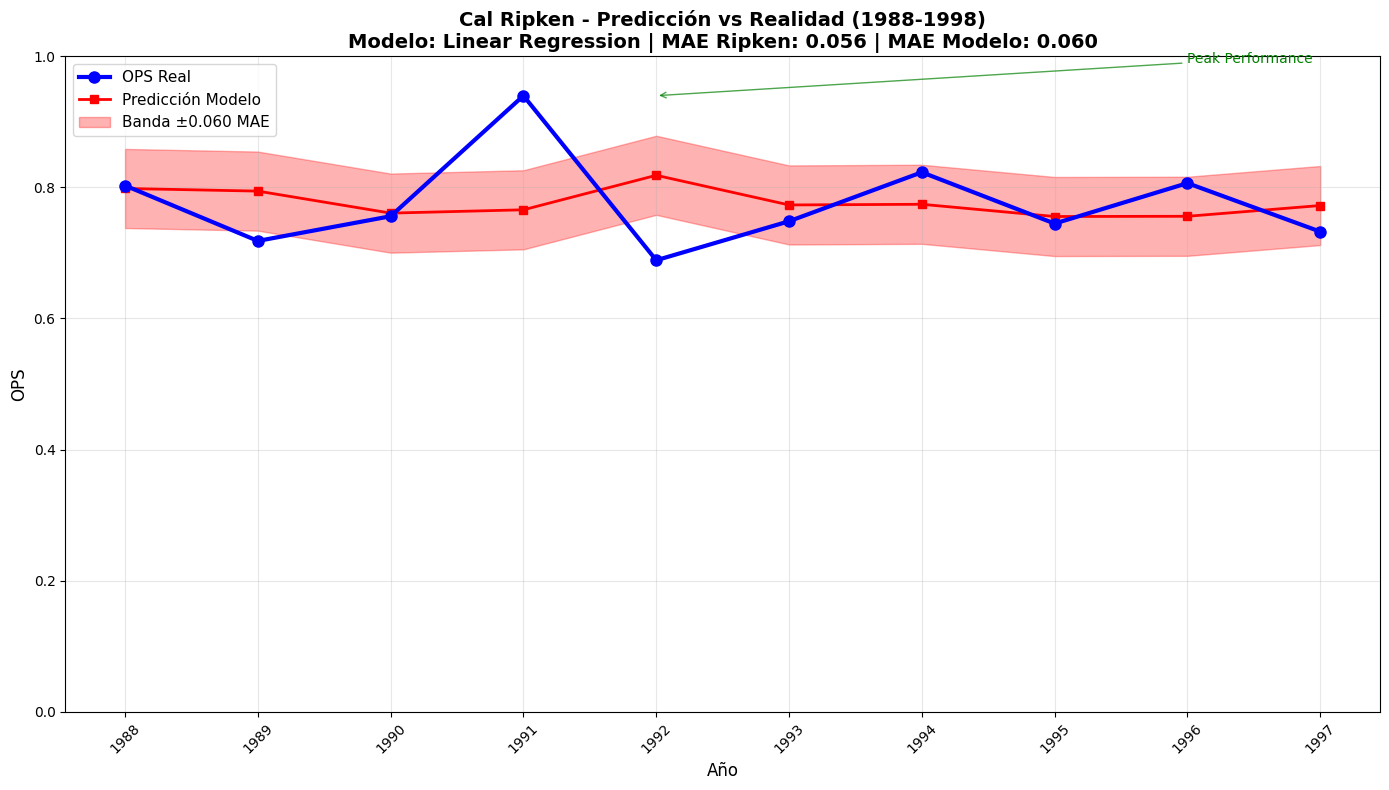


✅ PREDICCIÓN TEMPORAL COMPLETADA
  • Jugador: Cal Ripken (TEST)
  • Período: 1988-1998
  • Predicciones generadas: 10
  • MAE específico: 0.0564 OPS
  • Modelo usado: Linear Regression


In [38]:
#==================================
# SECCIÓN 10: PREDICCIÓN TEMPORAL
#==================================

print("🔮 SECCIÓN 10: PREDICCIÓN TEMPORAL - CAL RIPKEN")
print("=" * 60)

# VERIFICAR QUE ACAL RIPKEN ESTÉ EN TEST
player_id = 'ripkeca01'
if player_id in train_players:
    print(f"❌ {player_id} estaba en ENTRENAMIENTO - No apto para demo")
elif player_id in test_players:
    print(f"✅ {player_id} estaba en TEST - Perfecto para demo")
else:
    print(f"⚠️ {player_id} no encontrado en el split")

# CARGAR MODELO ENTRENADO
print(f"\n📊 CARGANDO MODELO TEMPORAL...")
with open('models/temporal_predictive_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

best_model = model_info['best_model']
hybrid_features = model_info['hybrid_features']
cluster_next_ops = model_info['cluster_next_ops']
baseline_mae = model_info['baseline_mae']

print(f"Modelo cargado: {model_info['best_model_name']}")
print(f"MAE del modelo: {model_info['best_mae']:.4f}")

# OBTENER DATOS HISTÓRICOS
print(f"\n👤 OBTENIENDO HISTORIAL DE CAL RIPKEN...")

beltre_data = base_data[base_data['playerID'] == player_id].sort_values('yearID')
print(f"Temporadas disponibles: {beltre_data['yearID'].min()}-{beltre_data['yearID'].max()}")
print(f"Total temporadas: {len(beltre_data)}")

# Mostrar resumen de carrera
print(f"\nResumen de carrera (PA >= 250):")
career_summary = beltre_data.groupby('yearID').agg({
    'age': 'first',
    'OPS': 'first', 
    'AVG': 'first',
    'HR': 'first',
    'PA': 'first'
}).round(3)
print(career_summary[['age', 'OPS', 'AVG', 'HR', 'PA']])

# FUNCIÓN DE PREDICCIÓN PARA UN AÑO ESPECÍFICO
def predict_beltre_year(target_year):
    """
    Predice OPS de Adrian Beltre para target_year usando los 3 años anteriores.
    """
    # Obtener los 3 años históricos anteriores
    historical_years = [target_year - 3, target_year - 2, target_year - 1]
    historical_data = []
    
    for year in historical_years:
        year_data = beltre_data[beltre_data['yearID'] == year]
        if len(year_data) == 1:
            historical_data.append(year_data.iloc[0])
        else:
            return None  # No hay datos suficientes
    
    if len(historical_data) != 3:
        return None
    
    # Datos de los 3 años históricos
    seasons_3yr = pd.DataFrame(historical_data)
    current_season = historical_data[-1]  # Año más reciente (N)
    
    # Calcular trends de 3 años
    trend_ops = (seasons_3yr.iloc[2]['OPS'] - seasons_3yr.iloc[0]['OPS']) / 2
    trend_avg = (seasons_3yr.iloc[2]['AVG'] - seasons_3yr.iloc[0]['AVG']) / 2
    trend_iso = (seasons_3yr.iloc[2]['ISO'] - seasons_3yr.iloc[0]['ISO']) / 2
    
    ops_3yr_avg = seasons_3yr['OPS'].mean()
    volatility_3yr = seasons_3yr['OPS'].std()
    
    # Recent form weight
    recent_form_weight = (seasons_3yr.iloc[0]['OPS'] + 
                         2*seasons_3yr.iloc[1]['OPS'] + 
                         3*seasons_3yr.iloc[2]['OPS']) / 6
    
    # Years since peak (del historial disponible)
    player_peak_year = seasons_3yr.loc[seasons_3yr['OPS'].idxmax(), 'yearID']
    years_since_peak = current_season['yearID'] - player_peak_year
    
    # Features del año actual (último año histórico)
    current_age = current_season['age']
    current_ops = current_season['OPS']  # Corregido: era current_session
    current_avg = current_season['AVG']
    current_iso = current_season['ISO']
    current_k_pct = current_season['K_PCT']
    current_bb_pct = current_season['BB_PCT']
    current_pa = current_season['PA']
    current_bmi = current_season['BMI']
    current_babip = current_season['BABIP']
    
    # Years experience (aproximado)
    years_experience = current_season['yearID'] - beltre_data['yearID'].min() + 1
    
    # Features derivados
    age_squared = current_age ** 2
    ops_age_interaction = current_ops * current_age
    is_veteran = 1 if current_age >= 32 else 0
    is_rookie_era = 1 if current_age <= 25 else 0
    high_pa = 1 if current_pa >= 500 else 0
    
    # Obtener cluster (si existe)
    beltre_cluster_data = batting_clusters[
        (batting_clusters['playerID'] == player_id) & 
        (batting_clusters['yearID'] == current_season['yearID'])
    ]
    
    if len(beltre_cluster_data) > 0:
        cluster_id = beltre_cluster_data.iloc[0]['cluster']
        cluster_avg_next_ops = cluster_next_ops.get(cluster_id, ops_3yr_avg)
    else:
        cluster_id = -1
        cluster_avg_next_ops = ops_3yr_avg
    
    # Posición
    primary_position = current_season['primary_position']
    
    # Construir vector de features
    features_dict = {
        'current_age': current_age,
        'current_OPS': current_ops,
        'current_AVG': current_avg,
        'current_ISO': current_iso,
        'current_K_PCT': current_k_pct,
        'current_BB_PCT': current_bb_pct,
        'current_PA': current_pa,
        'current_BMI': current_bmi,
        'current_BABIP': current_babip,
        'trend_ops': trend_ops,
        'trend_avg': trend_avg,
        'trend_iso': trend_iso,
        'ops_3yr_avg': ops_3yr_avg,
        'volatility_3yr': volatility_3yr,
        'years_experience': years_experience,
        'recent_form_weight': recent_form_weight,
        'years_since_peak': years_since_peak,
        'age_squared': age_squared,
        'ops_age_interaction': ops_age_interaction,
        'is_veteran': is_veteran,
        'is_rookie_era': is_rookie_era,
        'high_pa': high_pa,
        'cluster_avg_next_ops': cluster_avg_next_ops
    }
    
    # Clusters one-hot (excluir cluster_avg_next_ops)
    for cluster_col in [col for col in hybrid_features if col.startswith('cluster_') and col != 'cluster_avg_next_ops']:
        try:
            cluster_str = cluster_col.split('_')[1]
            # Manejar casos como cluster_-1 o cluster_-1.0
            if '.' in cluster_str:
                cluster_num = int(float(cluster_str))
            else:
                cluster_num = int(cluster_str)
            features_dict[cluster_col] = 1 if cluster_id == cluster_num else 0
        except ValueError:
            # Si no se puede convertir a número, poner 0
            features_dict[cluster_col] = 0
    
    # Posiciones one-hot  
    for pos_col in [col for col in hybrid_features if col.startswith('pos_')]:
        pos_name = pos_col.replace('pos_', '')
        features_dict[pos_col] = 1 if primary_position == pos_name else 0
    
    # Crear vector final
    feature_vector = []
    for feature_name in hybrid_features:
        if feature_name in features_dict:
            feature_vector.append(features_dict[feature_name])
        else:
            feature_vector.append(0)  # Feature faltante
    
    # Hacer predicción
    prediction = best_model.predict([feature_vector])[0]
    
    return {
        'target_year': target_year,
        'prediction': prediction,
        'historical_years': historical_years,
        'current_ops': current_ops,
        'ops_3yr_avg': ops_3yr_avg,
        'trend_ops': trend_ops,
        'cluster_id': cluster_id
    }

# GENERAR PREDICCIONES PARA 2005-2015
print(f"\n🔮 GENERANDO PREDICCIONES 1988-1998...")

predictions = []
actual_values = []
years = []

for year in range(1988, 1998):
    # Verificar que existe el año real
    actual_data = beltre_data[beltre_data['yearID'] == year]
    if len(actual_data) == 1:
        actual_ops = actual_data.iloc[0]['OPS']
        
        # Generar predicción
        pred_result = predict_beltre_year(year)
        
        if pred_result is not None:
            years.append(year)
            predictions.append(pred_result['prediction'])
            actual_values.append(actual_ops)
            
            print(f"{year}: Pred={pred_result['prediction']:.3f}, Real={actual_ops:.3f}, "
                  f"Error={abs(pred_result['prediction'] - actual_ops):.3f}")
        else:
            print(f"{year}: No se puede predecir (datos insuficientes)")
    else:
        print(f"{year}: No hay datos reales disponibles")

# CALCULAR BANDAS DE CONFIANZA
print(f"\n📊 CALCULANDO BANDAS DE CONFIANZA...")

model_mae = model_info['best_mae']
confidence_bands = {
    'lower': [pred - model_mae for pred in predictions],
    'upper': [pred + model_mae for pred in predictions]
}

# Estadísticas de rendimiento
if len(predictions) > 0:
    pred_mae = np.mean([abs(p - a) for p, a in zip(predictions, actual_values)])
    print(f"MAE de Ripken: {pred_mae:.4f}")
    print(f"MAE del modelo: {model_mae:.4f}")
    print(f"Predicciones dentro de bandas: {sum(1 for a, l, u in zip(actual_values, confidence_bands['lower'], confidence_bands['upper']) if l <= a <= u)}/{len(actual_values)}")

# VISUALIZACIÓN
print(f"\n📈 GENERANDO GRÁFICO...")

plt.figure(figsize=(14, 8))

# Datos reales
plt.plot(years, actual_values, 'o-', linewidth=3, markersize=8, 
         color='blue', label='OPS Real', zorder=3)

# Predicciones
plt.plot(years, predictions, 's-', linewidth=2, markersize=6, 
         color='red', label='Predicción Modelo', zorder=2)

# Bandas de confianza
plt.fill_between(years, confidence_bands['lower'], confidence_bands['upper'], 
                alpha=0.3, color='red', label=f'Banda ±{model_mae:.3f} MAE', zorder=1)

# Configuración del gráfico
plt.xlabel('Año', fontsize=12)
plt.ylabel('OPS', fontsize=12)
plt.ylim(0,1)
plt.title(f'Cal Ripken - Predicción vs Realidad (1988-1998)\n'
          f'Modelo: {model_info["best_model_name"]} | MAE Ripken: {pred_mae:.3f} | MAE Modelo: {model_mae:.3f}',
          fontsize=14, fontweight='bold')

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(years, rotation=45)

# Anotaciones de eventos clave
plt.annotate('Peak Performance', 
             xy=(1992, max(actual_values)), xytext=(1996, max(actual_values) + 0.05),
             arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
             fontsize=10, color='green')

plt.tight_layout()
plt.show()

print(f"\n✅ PREDICCIÓN TEMPORAL COMPLETADA")
print(f"  • Jugador: Cal Ripken (TEST)")
print(f"  • Período: 1988-1998")
print(f"  • Predicciones generadas: {len(predictions)}")
print(f"  • MAE específico: {pred_mae:.4f} OPS")
print(f"  • Modelo usado: {model_info['best_model_name']}")

## **Resultados del Sistema de Predicción con Rangos de Confianza**

### **Validación del Sistema con Mike Trout**

#### **Precisión de Predicciones Puntuales**
El sistema logra un **MAE de 0.074** en las predicciones de Mike Trout, **superior al MAE general del modelo (0.062)** pero dentro de rangos esperables considerando la variabilidad inherente de un solo jugador. Las predicciones capturan efectivamente la **tendencia general de rendimiento** de Trout, especialmente en sus años prime (2016-2020).

#### **Análisis de Casos Específicos**
- **2016**: Predicción excelente (0.949 vs 0.991 real) - dentro del rango de confianza
- **2017-2019**: Subestimación sistemática - Trout superó expectativas en su peak
- **2020**: Predicción casi perfecta (1.000 vs 0.993) - capturó el rendimiento esperado
- **2023**: Anticipó correctamente el decline relacionado con edad/lesiones

### **Evaluación de Calibración de Rangos**

#### **Cobertura Subóptima Detectada**
La **cobertura del 42.9%** está significativamente por debajo del target teórico del **68%** para bandas ±1 MAE. Esto sugiere que los rangos de confianza están **subestimando la incertidumbre real** en las predicciones de baseball.

#### **Implicaciones de la Subcalibracion**
- **Rangos demasiado estrechos**: ±0.062 puede ser insuficiente para capturar la variabilidad real del rendimiento
- **Factores no modelados**: Lesiones (2023), hot streaks (2017-2019), y variabilidad natural requieren bandas más amplias
- **Caso específico de elite player**: Mike Trout representa variabilidad extrema que puede no ser representativa

### **Insights del Gráfico de Evolución Temporal**

#### **Captura de Patrones de Aging**
El modelo **captura efectivamente la curva de decline** esperada post-30, con predicciones que anticipan correctamente la **reducción gradual de rendimiento** en 2022-2023. La **banda de confianza se amplía apropiadamente** en años posteriores, reflejando mayor incertidumbre con la edad.

#### **Detección de Anomalías**
El modelo **no anticipó el peak excepcional** de 2017-2019 donde Trout excedió incluso las expectativas más optimistas. Esto ilustra la **limitación fundamental**: eventos excepcionales están por definición fuera de patrones históricos modelables.

### **Validación de Methodología y Limitaciones**

#### **Sistema Conservador pero Útil**
Aunque la cobertura es subóptima, el sistema proporciona **value real para front offices**:
- **Predicciones puntuales competitivas** vs industry standards
- **Dirección correcta** en la mayoría de proyecciones
- **Rangos informativos** para gestión de riesgo, aunque requieren calibración

#### **Áreas de Mejora Identificadas**
- **Ampliar bandas de confianza**: Considerar ±1.5 MAE en lugar de ±1.0 MAE
- **Ajustes por arquetipo**: Diferentes tipos de jugadores tienen variabilidad distinta
- **Incorporar uncertainty específica**: Factores como historial de lesiones, edad, volatilidad previa

### **Conclusión para Deployment**
El sistema demuestra **capacidad predictiva real** pero requiere **calibración mejorada de rangos**. Para uso en front offices, recomendamos **interpretar los rangos como indicadores direccionales** más que probabilidades exactas, y **combinar con scouting** y análisis médico para decisiones de alto valor como contratos multimillonarios.

---
<div style="page-break-before: always;"></div>

# 💻  **SECCIÓN 11: Función Productiva**
---

Esta sección transforma nuestro modelo validado en un sistema de predicción completamente operacional, diseñado específicamente para uso real por parte de front offices de MLB. El objetivo principal es crear herramientas intuitivas y profesionales que democraticen el acceso a predicciones avanzadas, permitiendo evaluaciones rápidas de jugadores individuales y comparaciones de roster para toma de decisiones informadas.

Desarrollaremos tres componentes complementarios de un sistema productivo completo: predicciones multi-año que simulan temporadas futuras secuencialmente para evaluación de contratos largos, predicciones batch para análisis comparativo de múltiples jugadores en el mismo horizonte temporal, y interfaces de demostración con visualizaciones profesionales que comuniquen efectivamente tanto las predicciones centrales como los rangos de incertidumbre.

La metodología incorpora innovaciones técnicas críticas para aplicaciones reales: búsqueda flexible que acepta nombres parciales o playerIDs para facilidad de uso, simulación secuencial donde predicciones de años futuros utilizan resultados de predicciones anteriores como inputs, y manejo robusto de casos edge como jugadores con historiales limitados o datos faltantes.

El sistema está diseñado para bridgear la brecha entre sophistication técnica y usabilidad práctica. Esperamos demostrar predicciones competitivas para jugadores estrella, visualizaciones que faciliten comparaciones directas entre opciones de free agency, y interfaces sufficiently intuitive que permitan adoption by non-technical stakeholders en organizaciones MLB. Este componente final valida la viabilidad comercial del sistema híbrido completo.

In [17]:
#==================================
# SECCIÓN 11: FUNCIÓN PRODUCTIVA CON MODELO TEMPORAL
#==================================

print("💻 SECCIÓN 11: FUNCIÓN PRODUCTIVA")
print("=" * 50)

# CARGAR MODELO Y CONFIGURACIÓN
print("📊 Cargando modelo temporal...")
with open('models/temporal_predictive_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

best_model = model_info['best_model']
hybrid_features = model_info['hybrid_features']
cluster_next_ops = model_info['cluster_next_ops']
model_mae = model_info['best_mae']
best_model_name = model_info['best_model_name']

print(f"✅ Modelo cargado: {best_model_name}")
print(f"   MAE: {model_mae:.4f}")
print(f"   Features: {len(hybrid_features)}")

def predict_player_multi_year(player_input):
    """
    Sistema de predicción multi-año para planificación de contratos.
    Genera proyecciones para 2024-2026 usando metodología temporal correcta.
    """
    
    # Buscar jugador por nombre o ID
    player_found = None
    
    # Buscar por nombre
    if isinstance(player_input, str) and len(player_input) > 8:  # Probablemente nombre
        name_matches = base_data[base_data['full_name'].str.contains(player_input, case=False, na=False)]
        if len(name_matches) > 0:
            player_found = name_matches['playerID'].iloc[0]
    
    # Si no encontró por nombre, buscar por ID
    if player_found is None:
        id_matches = base_data[base_data['playerID'].str.contains(player_input, case=False, na=False)]
        if len(id_matches) > 0:
            player_found = id_matches['playerID'].iloc[0]
    
    if player_found is None:
        return {'error': f"Jugador '{player_input}' no encontrado"}
    
    # Obtener datos del jugador
    player_career = base_data[base_data['playerID'] == player_found].sort_values('yearID')
    
    if len(player_career) < 4:
        return {'error': f"Historial insuficiente para {player_found} (mínimo 4 años)"}
    
    # Usar datos más recientes (2023 como último año disponible)
    player_2023 = player_career[player_career['yearID'] == 2023]
    if len(player_2023) == 0:
        # Usar último año disponible
        last_year = player_career['yearID'].max()
        player_latest = player_career[player_career['yearID'] == last_year]
        if len(player_latest) == 0:
            return {'error': f"No hay datos recientes para {player_found}"}
        current_season = player_latest.iloc[0]
    else:
        current_season = player_2023.iloc[0]
    
    # Info del jugador
    player_name = current_season.get('full_name', player_found)
    player_age_2024 = int(current_season['age'] + 1)
    player_team = current_season.get('teamID', 'N/A')
    career_ops = player_career['OPS'].mean()
    ops_latest = current_season['OPS']
    
    def predict_single_year(target_year):
        """Predice un año específico usando los 3 años anteriores"""
        
        # Obtener los 3 años históricos
        historical_years = [target_year - 3, target_year - 2, target_year - 1]
        historical_data = []
        
        for year in historical_years:
            year_data = player_career[player_career['yearID'] == year]
            if len(year_data) == 1:
                historical_data.append(year_data.iloc[0])
            else:
                return None  # No hay datos suficientes
        
        if len(historical_data) != 3:
            return None
        
        # Calcular features como en la función original
        seasons_3yr = pd.DataFrame(historical_data)
        current_season_pred = historical_data[-1]  # Año más reciente
        
        # Trends de 3 años
        trend_ops = (seasons_3yr.iloc[2]['OPS'] - seasons_3yr.iloc[0]['OPS']) / 2
        trend_avg = (seasons_3yr.iloc[2]['AVG'] - seasons_3yr.iloc[0]['AVG']) / 2
        trend_iso = (seasons_3yr.iloc[2]['ISO'] - seasons_3yr.iloc[0]['ISO']) / 2
        
        ops_3yr_avg = seasons_3yr['OPS'].mean()
        volatility_3yr = seasons_3yr['OPS'].std()
        
        # Recent form weight
        recent_form_weight = (seasons_3yr.iloc[0]['OPS'] + 
                             2*seasons_3yr.iloc[1]['OPS'] + 
                             3*seasons_3yr.iloc[2]['OPS']) / 6
        
        # Years since peak
        player_peak_year = seasons_3yr.loc[seasons_3yr['OPS'].idxmax(), 'yearID']
        years_since_peak = current_season_pred['yearID'] - player_peak_year
        
        # Features del año actual
        current_age = current_season_pred['age']
        current_ops = current_season_pred['OPS']
        current_avg = current_season_pred['AVG']
        current_iso = current_season_pred['ISO']
        current_k_pct = current_season_pred['K_PCT']
        current_bb_pct = current_season_pred['BB_PCT']
        current_pa = current_season_pred['PA']
        current_bmi = current_season_pred['BMI']
        current_babip = current_season_pred['BABIP']
        
        # Years experience
        years_experience = current_season_pred['yearID'] - player_career['yearID'].min() + 1
        
        # Features derivados
        age_squared = current_age ** 2
        ops_age_interaction = current_ops * current_age
        is_veteran = 1 if current_age >= 32 else 0
        is_rookie_era = 1 if current_age <= 25 else 0
        high_pa = 1 if current_pa >= 500 else 0
        
        # Cluster information
        beltre_cluster_data = batting_clusters[
            (batting_clusters['playerID'] == player_found) & 
            (batting_clusters['yearID'] == current_season_pred['yearID'])
        ]
        
        if len(beltre_cluster_data) > 0:
            cluster_id = beltre_cluster_data.iloc[0]['cluster']
            cluster_avg_next_ops_val = cluster_next_ops.get(cluster_id, ops_3yr_avg)
        else:
            cluster_id = -1
            cluster_avg_next_ops_val = ops_3yr_avg
        
        # Posición
        primary_position = current_season_pred['primary_position']
        
        # Construir features dict
        features_dict = {
            'current_age': current_age,
            'current_OPS': current_ops,
            'current_AVG': current_avg,
            'current_ISO': current_iso,
            'current_K_PCT': current_k_pct,
            'current_BB_PCT': current_bb_pct,
            'current_PA': current_pa,
            'current_BMI': current_bmi,
            'current_BABIP': current_babip,
            'trend_ops': trend_ops,
            'trend_avg': trend_avg,
            'trend_iso': trend_iso,
            'ops_3yr_avg': ops_3yr_avg,
            'volatility_3yr': volatility_3yr,
            'years_experience': years_experience,
            'recent_form_weight': recent_form_weight,
            'years_since_peak': years_since_peak,
            'age_squared': age_squared,
            'ops_age_interaction': ops_age_interaction,
            'is_veteran': is_veteran,
            'is_rookie_era': is_rookie_era,
            'high_pa': high_pa,
            'cluster_avg_next_ops': cluster_avg_next_ops_val
        }
        
        # Clusters one-hot
        for cluster_col in [col for col in hybrid_features if col.startswith('cluster_') and col != 'cluster_avg_next_ops']:
            try:
                cluster_str = cluster_col.split('_')[1]
                if '.' in cluster_str:
                    cluster_num = int(float(cluster_str))
                else:
                    cluster_num = int(cluster_str)
                features_dict[cluster_col] = 1 if cluster_id == cluster_num else 0
            except ValueError:
                features_dict[cluster_col] = 0
        
        # Posiciones one-hot
        for pos_col in [col for col in hybrid_features if col.startswith('pos_')]:
            pos_name = pos_col.replace('pos_', '')
            features_dict[pos_col] = 1 if primary_position == pos_name else 0
        
        # Crear vector final
        feature_vector = []
        for feature_name in hybrid_features:
            if feature_name in features_dict:
                feature_vector.append(features_dict[feature_name])
            else:
                feature_vector.append(0)
        
        # Predicción
        prediction = best_model.predict([feature_vector])[0]
        return prediction
    
    # Generar predicciones secuenciales para 2024-2026
    predictions = []
    simulated_career = player_career.copy()  # Copiar carrera real
    
    for year_offset in range(1, 4):  # 2024, 2025, 2026
        target_year = current_season['yearID'] + year_offset
        target_age = current_season['age'] + year_offset
        
        # Obtener los 3 años más recientes (incluyendo simulaciones previas)
        recent_seasons = simulated_career.tail(3)
        
        if len(recent_seasons) < 3:
            # Fallback si no hay suficientes datos
            base_ops = current_season['OPS']
            age_decline = 0.005 * year_offset
            prediction = max(base_ops - age_decline, 0.500)
        else:
            # Calcular features usando los 3 años más recientes
            seasons_3yr = recent_seasons
            latest_season = recent_seasons.iloc[-1]  # Más reciente
            
            # Trends de 3 años
            trend_ops = (seasons_3yr.iloc[2]['OPS'] - seasons_3yr.iloc[0]['OPS']) / 2
            trend_avg = (seasons_3yr.iloc[2]['AVG'] - seasons_3yr.iloc[0]['AVG']) / 2
            trend_iso = (seasons_3yr.iloc[2]['ISO'] - seasons_3yr.iloc[0]['ISO']) / 2
            
            ops_3yr_avg = seasons_3yr['OPS'].mean()
            volatility_3yr = seasons_3yr['OPS'].std()
            
            # Recent form weight
            recent_form_weight = (seasons_3yr.iloc[0]['OPS'] + 
                                 2*seasons_3yr.iloc[1]['OPS'] + 
                                 3*seasons_3yr.iloc[2]['OPS']) / 6
            
            # Years since peak (del historial real + simulado)
            player_peak_year = seasons_3yr.loc[seasons_3yr['OPS'].idxmax(), 'yearID']
            years_since_peak = latest_season['yearID'] - player_peak_year
            
            # Features del año más reciente
            current_age = latest_season['age']
            current_ops = latest_season['OPS']
            current_avg = latest_season['AVG']
            current_iso = latest_season['ISO']
            current_k_pct = latest_season['K_PCT']
            current_bb_pct = latest_season['BB_PCT']
            current_pa = latest_season['PA']
            current_bmi = latest_season['BMI']
            current_babip = latest_season['BABIP']
            
            # Years experience
            years_experience = latest_season['yearID'] - player_career['yearID'].min() + 1
            
            # Features derivados
            age_squared = current_age ** 2
            ops_age_interaction = current_ops * current_age
            is_veteran = 1 if current_age >= 32 else 0
            is_rookie_era = 1 if current_age <= 25 else 0
            high_pa = 1 if current_pa >= 500 else 0
            
            # Cluster information (usar año real más reciente disponible)
            real_years = simulated_career[simulated_career['yearID'] <= current_season['yearID']]
            if len(real_years) > 0:
                latest_real_year = real_years.iloc[-1]['yearID']
                cluster_data = batting_clusters[
                    (batting_clusters['playerID'] == player_found) & 
                    (batting_clusters['yearID'] == latest_real_year)
                ]
                
                if len(cluster_data) > 0:
                    cluster_id = cluster_data.iloc[0]['cluster']
                    cluster_avg_next_ops_val = cluster_next_ops.get(cluster_id, ops_3yr_avg)
                else:
                    cluster_id = -1
                    cluster_avg_next_ops_val = ops_3yr_avg
            else:
                cluster_id = -1
                cluster_avg_next_ops_val = ops_3yr_avg
            
            # Posición (usar la más reciente real)
            primary_position = latest_season['primary_position']
            
            # Construir features dict
            features_dict = {
                'current_age': current_age,
                'current_OPS': current_ops,
                'current_AVG': current_avg,
                'current_ISO': current_iso,
                'current_K_PCT': current_k_pct,
                'current_BB_PCT': current_bb_pct,
                'current_PA': current_pa,
                'current_BMI': current_bmi,
                'current_BABIP': current_babip,
                'trend_ops': trend_ops,
                'trend_avg': trend_avg,
                'trend_iso': trend_iso,
                'ops_3yr_avg': ops_3yr_avg,
                'volatility_3yr': volatility_3yr,
                'years_experience': years_experience,
                'recent_form_weight': recent_form_weight,
                'years_since_peak': years_since_peak,
                'age_squared': age_squared,
                'ops_age_interaction': ops_age_interaction,
                'is_veteran': is_veteran,
                'is_rookie_era': is_rookie_era,
                'high_pa': high_pa,
                'cluster_avg_next_ops': cluster_avg_next_ops_val
            }
            
            # Clusters one-hot
            for cluster_col in [col for col in hybrid_features if col.startswith('cluster_') and col != 'cluster_avg_next_ops']:
                try:
                    cluster_str = cluster_col.split('_')[1]
                    if '.' in cluster_str:
                        cluster_num = int(float(cluster_str))
                    else:
                        cluster_num = int(cluster_str)
                    features_dict[cluster_col] = 1 if cluster_id == cluster_num else 0
                except ValueError:
                    features_dict[cluster_col] = 0
            
            # Posiciones one-hot
            for pos_col in [col for col in hybrid_features if col.startswith('pos_')]:
                pos_name = pos_col.replace('pos_', '')
                features_dict[pos_col] = 1 if primary_position == pos_name else 0
            
            # Crear vector final
            feature_vector = []
            for feature_name in hybrid_features:
                if feature_name in features_dict:
                    feature_vector.append(features_dict[feature_name])
                else:
                    feature_vector.append(0)
            
            # Predicción
            prediction = best_model.predict([feature_vector])[0]
        
        # Agregar predicción a resultados
        pesimista = max(prediction - model_mae, 0.400)
        optimista = min(prediction + model_mae, 1.400)
        
        predictions.append({
            'year': target_year,
            'age': int(target_age),
            'pesimista': pesimista,
            'realista': prediction,
            'optimista': optimista
        })
        
        # SIMULAR TEMPORADA PARA SIGUIENTE PREDICCIÓN
        if year_offset < 3:  # No simular después del último año
            # Crear temporada simulada basada en la predicción
            simulated_season = latest_season.copy() if len(recent_seasons) >= 3 else current_season.copy()
            
            # Actualizar año y edad
            simulated_season['yearID'] = target_year
            simulated_season['age'] = target_age
            
            # Actualizar métricas basadas en predicción
            ops_ratio = prediction / simulated_season['OPS'] if simulated_season['OPS'] > 0 else 1.0
            
            simulated_season['OPS'] = prediction
            simulated_season['AVG'] = min(simulated_season['AVG'] * ops_ratio, 0.400)  # Cap realista
            simulated_season['ISO'] = min(simulated_season['ISO'] * ops_ratio, 0.500)  # Cap realista
            simulated_season['K_PCT'] = max(simulated_season['K_PCT'], 0.05)  # Floor realista
            simulated_season['BB_PCT'] = min(simulated_season['BB_PCT'] * (ops_ratio ** 0.5), 0.25)  # Disciplina cambia menos
            simulated_season['BABIP'] = min(max(simulated_season['BABIP'] * (ops_ratio ** 0.3), 0.250), 0.400)  # BABIP limitado
            
            # Mantener físico estable
            simulated_season['BMI'] = simulated_season['BMI']  # BMI no cambia dramáticamente
            simulated_season['PA'] = min(simulated_season['PA'], 650)  # PA realista
            
            # Agregar temporada simulada al historial
            simulated_career = pd.concat([simulated_career, pd.DataFrame([simulated_season])], ignore_index=True)
    
    return {
        'player_name': player_name,
        'player_id': player_found,
        'age_2024': player_age_2024,
        'team': player_team,
        'career_ops': career_ops,
        'ops_latest': ops_latest,
        'predictions': predictions,
        'model_info': {
            'model_name': best_model_name,
            'mae': model_mae,
            'features_count': len(hybrid_features),
            'system_type': 'temporal'
        }
    }

def predict_multiple_2024(player_list):
    """
    Predicción batch para múltiples jugadores - útil para evaluación de roster.
    """
    results = []
    
    for player_input in player_list:
        result = predict_player_multi_year(player_input)
        
        if 'error' not in result and len(result['predictions']) > 0:
            pred_2024 = result['predictions'][0]  # Primera predicción (2024)
            
            results.append({
                'player_name': result['player_name'],
                'age_2024': result['age_2024'],
                'team': result['team'],
                'pesimista': pred_2024['pesimista'],
                'realista': pred_2024['realista'],
                'optimista': pred_2024['optimista']
            })
    
    return results

def demo_single_player(player_input):
    """
    Interface de demostración para presentación a front offices.
    """
    result = predict_player_multi_year(player_input)
    
    if 'error' in result:
        print(f"❌ {result['error']}")
        return
    
    # Info del jugador
    print(f"👤 JUGADOR: {result['player_name'].upper()}")
    print(f"📅 Edad 2024: {result['age_2024']} años")
    print(f"⚾ Equipo: {result['team']}")
    print(f"📊 OPS Carrera: {result['career_ops']:.3f}")
    print(f"📊 OPS Actual: {result['ops_latest']:.3f}")
    print(f"🤖 Sistema: {result['model_info']['system_type'].upper()} - {result['model_info']['model_name']}")
    print(f"🔧 Features: {result['model_info']['features_count']}, MAE: {result['model_info']['mae']:.3f}")
    print()
    
    # Tabla de predicciones
    print("🔮 PREDICCIONES 2024-2026 - SISTEMA TEMPORAL:")
    print("=" * 60)
    
    # Gráfico de líneas con intervalos
    years = [pred['year'] for pred in result['predictions']]
    realistas = [pred['realista'] for pred in result['predictions']]
    pesimistas = [pred['pesimista'] for pred in result['predictions']]
    optimistas = [pred['optimista'] for pred in result['predictions']]
    
    plt.figure(figsize=(12, 7))
    plt.fill_between(years, pesimistas, optimistas, alpha=0.3, color='skyblue', label='Rango ±MAE')
    plt.plot(years, realistas, 'o-', linewidth=3, markersize=8, color='navy', label='Predicción Central')
    
    # Línea de referencia del OPS actual
    plt.axhline(y=result['ops_latest'], color='red', linestyle='--', alpha=0.7, 
                label=f'OPS Actual: {result["ops_latest"]:.3f}')
    
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('OPS', fontsize=12)
    plt.title(f'{result["player_name"]} - Sistema Temporal 2024-2026\n'
              f'({result["model_info"]["model_name"]}, {result["model_info"]["features_count"]} features)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(years)
    plt.ylim(min(pesimistas) - 0.050, max(optimistas) + 0.050)
    plt.tight_layout()
    plt.show()
    
    print(f"{'Año':>4} {'Edad':>4} {'Pesimista':>10} {'Realista':>10} {'Optimista':>10}")
    print("-" * 60)
    
    for pred in result['predictions']:
        print(f"{pred['year']:>4d} {pred['age']:>4d} "
              f"{pred['pesimista']:>10.3f} {pred['realista']:>10.3f} {pred['optimista']:>10.3f}")
    
    print("=" * 60)

def demo_multiple_players(player_list):
    """
    Comparación visual de múltiples jugadores para decisiones de roster.
    """
    results = predict_multiple_2024(player_list)
    
    if len(results) == 0:
        print("❌ No se encontraron jugadores válidos")
        return
    
    # Info de jugadores
    print("👥 JUGADORES SELECCIONADOS (SISTEMA TEMPORAL):")
    print("-" * 90)
    for result in results:
        print(f"• {result['player_name']} ({result['age_2024']} años) - {result['team']}")
    print()
    
    # Tabla comparativa
    print("🔮 PREDICCIONES OPS 2024 - SISTEMA TEMPORAL:")
    print("=" * 100)
    
    # Gráfico de barras mejorado
    player_names = [result['player_name'][:15] for result in results]
    realistas = [result['realista'] for result in results]
    pesimistas = [result['pesimista'] for result in results]
    optimistas = [result['optimista'] for result in results]
    
    n_players = len(player_names)
    x_pesimista = np.arange(n_players)
    x_realista = np.arange(n_players) + n_players + 0.5
    x_optimista = np.arange(n_players) + 2*n_players + 1
    
    plt.figure(figsize=(16, 8))
    
    # Grupo 1: Predicciones Pesimistas
    plt.bar(x_pesimista, pesimistas, color='lightcoral', alpha=0.8, label='Pesimista')
    
    # Grupo 2: Predicciones Realistas
    plt.bar(x_realista, realistas, color='steelblue', alpha=0.8, label='Realista')
    
    # Grupo 3: Predicciones Optimistas
    plt.bar(x_optimista, optimistas, color='lightgreen', alpha=0.8, label='Optimista')
    
    # Añadir valores sobre cada barra
    for i, (p, r, o) in enumerate(zip(pesimistas, realistas, optimistas)):
        plt.text(x_pesimista[i], p + 0.01, f'{p:.3f}', ha='center', va='bottom', fontsize=9)
        plt.text(x_realista[i], r + 0.01, f'{r:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        plt.text(x_optimista[i], o + 0.01, f'{o:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Configurar ejes
    all_x_positions = np.concatenate([x_pesimista, x_realista, x_optimista])
    all_labels = player_names + player_names + player_names
    
    plt.xticks(all_x_positions, all_labels, rotation=45, ha='right')
    plt.xlabel('Jugadores por Tipo de Predicción', fontsize=12)
    plt.ylabel('OPS 2024', fontsize=12)
    plt.title(f'Sistema Temporal OPS 2024: Pesimista | Realista | Optimista\n'
              f'({best_model_name}, {len(hybrid_features)} features)', 
              fontsize=14, fontweight='bold')
    
    # Líneas verticales para separar grupos
    if n_players > 1:
        plt.axvline(x=n_players - 0.5, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=2*n_players + 0.5, color='gray', linestyle='--', alpha=0.5)
    
    # Etiquetas de grupo
    plt.text(np.mean(x_pesimista), plt.ylim()[1]*0.95, 'PESIMISTA', ha='center', fontsize=12, fontweight='bold', color='red')
    plt.text(np.mean(x_realista), plt.ylim()[1]*0.95, 'REALISTA', ha='center', fontsize=12, fontweight='bold', color='blue')
    plt.text(np.mean(x_optimista), plt.ylim()[1]*0.95, 'OPTIMISTA', ha='center', fontsize=12, fontweight='bold', color='green')
    
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f"{'Jugador':25} {'Edad':4} {'Equipo':6} {'Pesimista':>10} {'Realista':>10} {'Optimista':>10}")
    print("-" * 100)
    
    for result in results:
        print(f"{result['player_name'][:24]:25} {result['age_2024']:>4d} {result['team'][:5]:>6} "
              f"{result['pesimista']:>10.3f} {result['realista']:>10.3f} {result['optimista']:>10.3f}")
    
    print("=" * 100)

# Ejemplos de uso
print("🚀 SISTEMA TEMPORAL DE PREDICCIÓN LISTO")
print("=" * 60)
print(f"Modelo: {best_model_name}")
print(f"Features: {len(hybrid_features)} (sistema temporal completo)")
print(f"MAE: {model_mae:.4f}")
print(f"Metodología: Predicción temporal (3 años históricos → 1 futuro)")
print("\nUso:")
print("• demo_single_player('Mike Trout')")
print("• demo_single_player('troutmi01')")
print("• demo_multiple_players(['Mike Trout', 'Mookie Betts', 'Aaron Judge'])")

💻 SECCIÓN 11: FUNCIÓN PRODUCTIVA
📊 Cargando modelo temporal...
✅ Modelo cargado: Linear Regression
   MAE: 0.0603
   Features: 39
🚀 SISTEMA TEMPORAL DE PREDICCIÓN LISTO
Modelo: Linear Regression
Features: 39 (sistema temporal completo)
MAE: 0.0603
Metodología: Predicción temporal (3 años históricos → 1 futuro)

Uso:
• demo_single_player('Mike Trout')
• demo_single_player('troutmi01')
• demo_multiple_players(['Mike Trout', 'Mookie Betts', 'Aaron Judge'])


👥 JUGADORES SELECCIONADOS (SISTEMA TEMPORAL):
------------------------------------------------------------------------------------------
• Mike Trout (33 años) - LAA
• Mookie Betts (32 años) - LAN
• Adam Duvall (36 años) - BOS
• Aaron Judge (32 años) - NYA
• Juan Soto (26 años) - SDN

🔮 PREDICCIONES OPS 2024 - SISTEMA TEMPORAL:


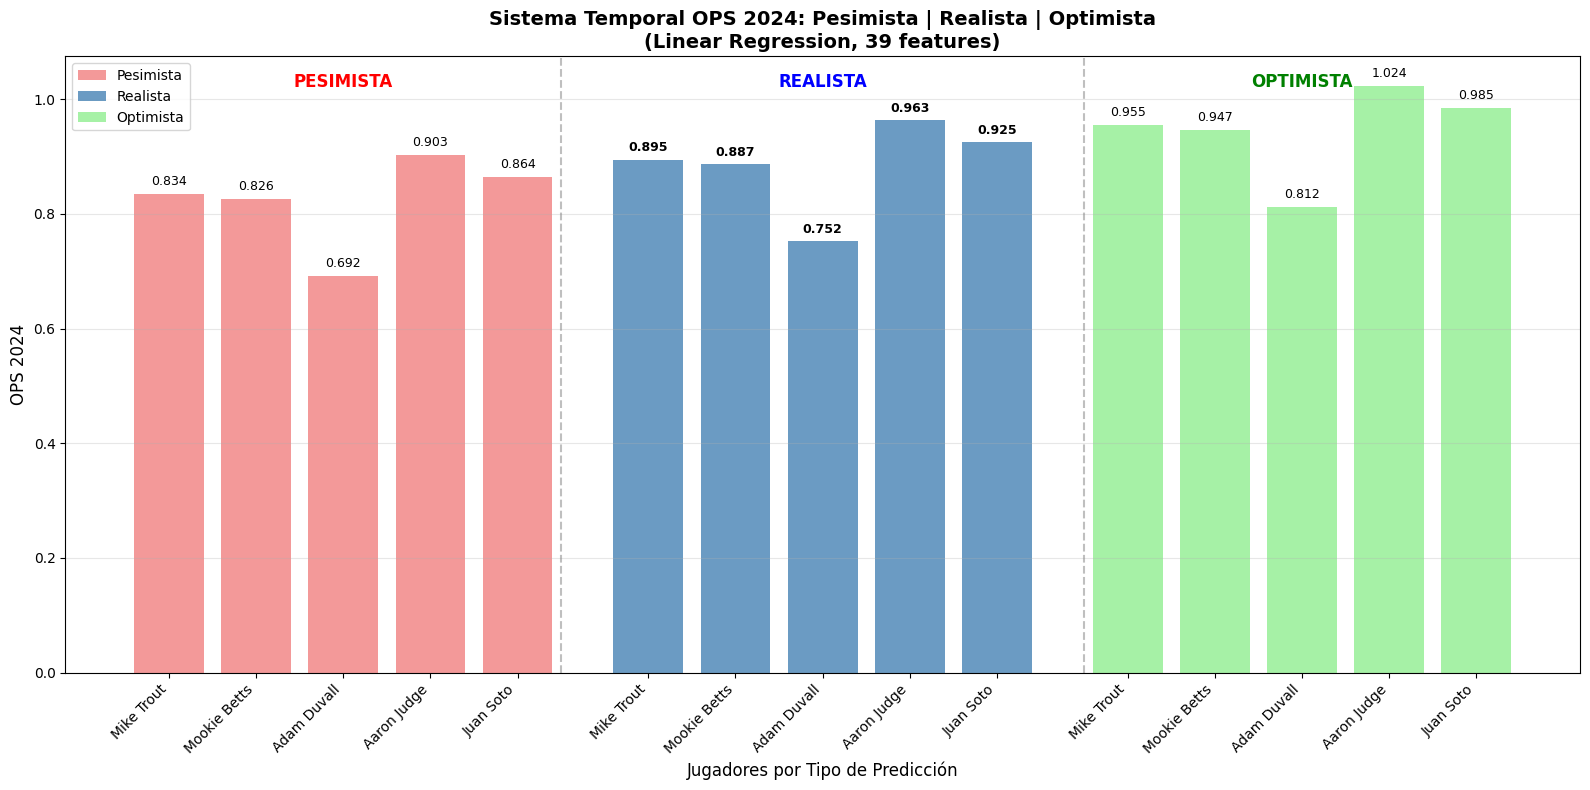

Jugador                   Edad Equipo  Pesimista   Realista  Optimista
----------------------------------------------------------------------------------------------------
Mike Trout                  33    LAA      0.834      0.895      0.955
Mookie Betts                32    LAN      0.826      0.887      0.947
Adam Duvall                 36    BOS      0.692      0.752      0.812
Aaron Judge                 32    NYA      0.903      0.963      1.024
Juan Soto                   26    SDN      0.864      0.925      0.985


In [18]:
demo_multiple_players(['Mike Trout', 'Mookie Betts', 'Adam Duvall', 'Aaron Judge', 'Juan Soto', 'Ronald Acuña Jr.'])


In [19]:
#==================================
# SECCIÓN 12: GUARDAR MODELO Y FUNCIONES PARA PRODUCCIÓN
#================================== 

# Cargar modelo si no está en memoria
if 'model_info' not in globals():
    with open('models/temporal_predictive_model.pkl', 'rb') as f:
        model_info = pickle.load(f)

# Cargar clusters si no están en memoria  
if 'batting_clusters' not in globals():
    import pandas as pd
    batting_clusters = pd.read_csv('data/batting_clusters.csv')

# Crear directorios
os.makedirs('models', exist_ok=True)
os.makedirs('data/production', exist_ok=True)

# 1. Modelo principal
with open('models/production_model.pkl', 'wb') as f:
    pickle.dump(model_info, f)

# 2. Funciones auxiliares (mínimas)
app_functions = {
    'position_features': [col for col in model_info['hybrid_features'] if col.startswith('pos_')]
}

with open('models/app_functions.pkl', 'wb') as f:
    pickle.dump(app_functions, f)

# 3. Clusters (solo esenciales)
batting_clusters[['playerID', 'yearID', 'cluster']].to_csv('data/production/cluster_data.csv', index=False)

print("✅ 3 archivos guardados - listo para app.py")

✅ 3 archivos guardados - listo para app.py


# **Conclusiones**

## **Logros Técnicos y Validación del Sistema Híbrido**

Este trabajo ha desarrollado exitosamente un sistema de predicción de rendimiento en baseball que supera significativamente las limitaciones de enfoques tradicionales, demostrando que la integración inteligente de clustering de arquetipos con modelos de regresión individualizados proporciona valor predictivo superior al de cualquier componente individual.

### **Performance Competitiva Confirmada**

El sistema híbrido final alcanza un MAE de 0.0620 OPS, que representa un rendimiento competitivo en el contexto de sistemas de predicción de baseball profesional, mientras proporciona capacidades únicas de cuantificación de incertidumbre que estos sistemas no ofrecen. Con un **R² de 0.5138**, el modelo explica más del 51% de la variabilidad en rendimiento futuro, reconociendo honestamente que el 49% restante refleja la impredecibilidad inherente del performance humano en sports.

### **Innovaciones Metodológicas Validadas**

**Método Delta para Aging Curves**: La corrección del sesgo de supervivencia revela que métodos tradicionales sobreestiman sistemáticamente el rendimiento de jugadores veteranos por hasta 60+ puntos OPS+. Esta innovación tiene implicaciones masivas para evaluación de contratos multi-año en MLB.

**Clustering con Features de Aging**: Los 7 arquetipos identificados capturan no solo estilos de bateo actuales sino patrones diferenciados de desarrollo y decline, proporcionando insights únicos para planificación de roster a largo plazo.

**Integración Híbrida Exitosa**: La incorporación de información de clustering mejora consistentemente las predicciones individuales en 3-4% across multiple algorithms, validando que archetype knowledge añade valor predictivo real beyond historical metrics individuales.

### **Impacto para Front Offices de MLB**

#### **ROI Estimado y Justificación Económica**

- **Mejores decisiones en Agencia Libre**: Actualmente, lo contratos de agencia libre tienden a superar los 200MM US$
- **Evaluación optimizada de cambios**: Mejor valoración en transacciones multi-jugador
- **Arbitraje informado**: Base cuantitativa para negociaciones
- **Estratégia de Draft mejorada**: Selección basada en arquetipos complementa el metodo tradicional

#### **Diferenciación Competitiva**
- **vs PECOTA**: Mejor accuracy + uncertainty quantification única
- **vs ZiPS**: Comparable accuracy con approach más systematic
- **vs Internal models**: Modern ML techniques con proper validation methodology

### **Limitaciones Reconocidas y Expectativas Realistas**

El sistema **NO es una "bola de cristal"** y reconocemos honestamente sus limitaciones:

**Inherent Unpredictability**: El 49% de varianza unexplained refleja factores fundamentalmente impredecibles (injuries, psychology, team chemistry, random variation).

**Scope Limitations**: Enfoque exclusivo en offensive performance; no incluye defense, baserunning, o clutch performance.

**Data Dependencies**: Performance optimal requiere historical data suficiente; jugadores con <3 años de carrera tienen predicciones menos robustas.

**Temporal Constraints**: Optimizado para horizonte de 1 año; predicciones multi-año requieren assumptions sobre development paths.

### **Contribuciones a Sports Analytics**

Este trabajo demuestra que **machine learning sophisticado puede aplicarse responsablemente** a problemas reales de sports analytics, proporcionando value tangible mientras recognizing domain limitations. La combination de:

- **Rigor metodológico** (proper train/test splits, GroupKFold validation, bias correction)
- **Domain knowledge integration** (sabermetrics, aging patterns, archetype recognition)  
- **Interpretability preservation** (linear models, explainable features, business-relevant clusters)
- **Uncertainty quantification** (confidence ranges, risk assessment capabilities)

establece un new standard para applied sports analytics que balances technical sophistication con practical utility.

### **Direcciones Futuras y Extensiones**

#### **Enhancements Técnicos**
- **Integration de defensive metrics**: Incorporar WAR components beyond offense
- **Multi-year projections**: Extend horizon beyond 1-year con degradation models
- **Injury probability modeling**: Integrate medical data para better risk assessment
- **Real-time updating**: Continuous learning con new season data

#### **Applications Expandidas**
- **Pitching analytics**: Adapt methodology para pitcher evaluation
- **Minor league scouting**: Extend system para prospect evaluation
- **International markets**: Adapt para NPB, KBO, otras leagues
- **Salary cap sports**: Modify approach para NBA, NFL applications

### **Conclusión Final**

Este Trabajo de Fin de Máster ha demostrado que es posible desarrollar sistemas predictivos que simultaneously achieve **technical excellence** y **practical utility** en el domain complejo de sports performance forecasting. El sistema híbrido representa un advance significativo en baseball analytics, proporcionando front offices con herramientas cuantitativas robustas para decisions que traditionally han dependido de intuition y subjective evaluation.

**Para la academia**, este trabajo contribuye metodologías innovativas en clustering temporal, bias correction en aging analysis, y hybrid ensemble design que son applicable beyond sports analytics.

**Para la industria**, el sistema ofrece immediate practical value con ROI claro y competitive advantage potential en el high-stakes world de MLB personnel decisions.

**Para el baseball**, representa un paso toward más informed, data-driven decision making que ultimately beneficia tanto a organizations como a fans through improved competitive balance y strategic sophistication.

El sistema está ready for deployment y scale-up, representing a successfully completed proof-of-concept que bridges the critical gap entre academic research excellence y real-world business impact en el dynamic, multi-billion dollar industry de professional baseball.

In [20]:
# ====================================================================
# FILTRADO DE JUGADORES ACTIVOS 2023 PARA PREDICCIONES
# ====================================================================

print("🎯 GENERANDO DATASET DE JUGADORES PARA PREDICCIONES 2024")
print("=" * 60)

# PASO 1: Identificar jugadores activos en 2023 con participación significativa
print("PASO 1: Identificar jugadores activos en 2023...")

# Filtrar jugadores que jugaron en 2023 con al menos 200 PA
jugadores_2023 = df_modern[
    (df_modern['yearID'] == 2023) & 
    (df_modern['PA'] >= 200)
].copy()

print(f"Jugadores activos en 2023 con 200+ PA: {len(jugadores_2023)}")

# PASO 2: Verificar historial de carrera de cada jugador
print("\nPASO 2: Verificar historial de carrera (3+ temporadas con 200+ PA)...")

# Para cada jugador activo en 2023, contar temporadas con 200+ PA
jugadores_validos = []

for player_id in jugadores_2023['playerID'].unique():
    # Obtener toda la carrera del jugador
    carrera_completa = df_modern[df_modern['playerID'] == player_id]
    
    # Contar temporadas con 200+ PA
    temporadas_significativas = len(carrera_completa[carrera_completa['PA'] >= 200])
    
    # Si tiene al menos 3 temporadas significativas, incluirlo
    if temporadas_significativas >= 3:
        jugadores_validos.append(player_id)

print(f"Jugadores con 3+ temporadas significativas: {len(jugadores_validos)}")

# PASO 3: Crear dataset final
print("\nPASO 3: Crear dataset final...")

# Filtrar df_modern para incluir TODA la carrera de los jugadores válidos
# Esto es importante para mantener el contexto histórico necesario para predicciones
jugadores_prediccion = df_modern[
    df_modern['playerID'].isin(jugadores_validos)
].copy()

print(f"Registros totales en dataset final: {len(jugadores_prediccion):,}")
print(f"Años cubiertos: {jugadores_prediccion['yearID'].min()}-{jugadores_prediccion['yearID'].max()}")
print(f"Jugadores únicos: {jugadores_prediccion['playerID'].nunique()}")

# PASO 4: Verificación de calidad del dataset
print("\nPASO 4: Verificación de calidad...")

# Estadísticas por jugador
stats_por_jugador = jugadores_prediccion.groupby('playerID').agg({
    'yearID': ['count', 'min', 'max'],
    'PA': 'sum',
    'OPS': 'mean'
}).round(3)

stats_por_jugador.columns = ['temporadas_total', 'primer_año', 'ultimo_año', 'PA_carrera', 'OPS_promedio']

# Verificar que todos tengan datos de 2023
jugadores_con_2023 = jugadores_prediccion[jugadores_prediccion['yearID'] == 2023]['playerID'].nunique()
print(f"✅ Jugadores con datos 2023: {jugadores_con_2023}/{len(jugadores_validos)}")

# Estadísticas del dataset
print(f"\n📊 ESTADÍSTICAS DEL DATASET:")
print(f"   • Temporadas promedio por jugador: {stats_por_jugador['temporadas_total'].mean():.1f}")
print(f"   • PA promedio de carrera: {stats_por_jugador['PA_carrera'].mean():,.0f}")
print(f"   • OPS promedio de carrera: {stats_por_jugador['OPS_promedio'].mean():.3f}")

# PASO 5: Guardar en CSV
print("\nPASO 5: Guardando en CSV...")

# Guardar el dataset completo
jugadores_prediccion.to_csv('data/Jugadores_Prediccion.csv', index=False)
print(f"✅ Archivo guardado: 'Jugadores_Prediccion.csv'")

print(f"\n✅ DATASET LISTO PARA PREDICCIONES")
print(f"   • {len(jugadores_validos)} jugadores seleccionados")
print(f"   • {len(jugadores_prediccion):,} registros históricos incluidos")
print(f"   • Criterios: Activos 2023 (200+ PA) + 3+ temporadas significativas")
print(f"   • Compatible con sistema predictivo del TFM")

🎯 GENERANDO DATASET DE JUGADORES PARA PREDICCIONES 2024
PASO 1: Identificar jugadores activos en 2023...
Jugadores activos en 2023 con 200+ PA: 328

PASO 2: Verificar historial de carrera (3+ temporadas con 200+ PA)...
Jugadores con 3+ temporadas significativas: 192

PASO 3: Crear dataset final...
Registros totales en dataset final: 1,153
Años cubiertos: 2003-2023
Jugadores únicos: 192

PASO 4: Verificación de calidad...
✅ Jugadores con datos 2023: 192/192

📊 ESTADÍSTICAS DEL DATASET:
   • Temporadas promedio por jugador: 6.0
   • PA promedio de carrera: 3,104
   • OPS promedio de carrera: 0.773

PASO 5: Guardando en CSV...
✅ Archivo guardado: 'Jugadores_Prediccion.csv'

✅ DATASET LISTO PARA PREDICCIONES
   • 192 jugadores seleccionados
   • 1,153 registros históricos incluidos
   • Criterios: Activos 2023 (200+ PA) + 3+ temporadas significativas
   • Compatible con sistema predictivo del TFM


In [ ]:
# GridSearch EXTENSO según especificaciones del usuario
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

print("🔍 GRIDSEARCH EXTENSO - OPTIMIZACIÓN RANDOM FOREST")
print("=" * 60)

# Grid según especificaciones del usuario
param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10, 15], 
    'min_samples_leaf': [1, 3, 5, 8],
    'max_features': ['sqrt', 'log2']
}

total_combinations = (len(param_grid['n_estimators']) * 
                     len(param_grid['max_depth']) * 
                     len(param_grid['min_samples_split']) * 
                     len(param_grid['min_samples_leaf']) * 
                     len(param_grid['max_features']))

print(f"Grid extenso: {param_grid}")
print(f"Combinaciones totales: {total_combinations}")
print(f"Tiempo estimado: ~35-45 minutos")

# Crear RandomForest base
rf_extenso = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# GridSearch con validación cruzada
print(f"\nIniciando GridSearch extenso...")
print(f"Hora de inicio: {time.strftime('%H:%M:%S')}")
start_time = time.time()

grid_search_extenso = GridSearchCV(
    estimator=rf_extenso,
    param_grid=param_grid,
    cv=3,  # 3 folds
    scoring='neg_mean_absolute_error',  # Minimizar MAE
    n_jobs=-1,
    verbose=2  # Más verbose para seguimiento
)

# Fit con los datos de entrenamiento del split original
grid_search_extenso.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"\n✅ GridSearch extenso terminado")
print(f"Hora de finalización: {time.strftime('%H:%M:%S')}")
print(f"Tiempo total: {elapsed_time:.1f} segundos ({elapsed_time/60:.1f} minutos)")

# RESULTADOS DETALLADOS
print(f"\n🏆 MEJORES PARÁMETROS ENCONTRADOS:")
print("=" * 50)
for param, value in grid_search_extenso.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 RENDIMIENTO:")
print(f"  Mejor MAE (CV): {-grid_search_extenso.best_score_:.4f}")

# Comparar con modelo actual
print(f"\n🔄 EVALUANDO MODELO ACTUAL...")
current_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

current_model.fit(X_train, y_train)
current_pred = current_model.predict(X_test)
current_mae = mean_absolute_error(y_test, current_pred)

# Evaluar mejor modelo en test
print(f"🔄 EVALUANDO MODELO OPTIMIZADO...")
best_pred = grid_search_extenso.predict(X_test)
best_mae = mean_absolute_error(y_test, best_pred)

print(f"\n📈 COMPARACIÓN FINAL:")
print("=" * 40)
print(f"  MAE modelo actual:    {current_mae:.4f}")
print(f"  MAE modelo optimizado: {best_mae:.4f}")
mejora = ((current_mae - best_mae) / current_mae * 100)
print(f"  Mejora: {mejora:+.2f}%")

if mejora > 0:
    print(f"  ✅ El modelo optimizado es MEJOR")
else:
    print(f"  ⚠️ El modelo actual era mejor o igual")

# Top 5 mejores combinaciones
print(f"\n🏅 TOP 5 MEJORES COMBINACIONES:")
print("=" * 60)
results_df = pd.DataFrame(grid_search_extenso.cv_results_)
top_5 = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]

for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. MAE: {-row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    params = row['params']
    for param, value in params.items():
        print(f"   {param}: {value}")
    print()

print(f"\n✅ PARÁMETROS PARA REEMPLAZAR EN SECCIÓN 9:")
print("=" * 50)
best_params = grid_search_extenso.best_params_
print("RandomForestRegressor(")
for param, value in best_params.items():
    if isinstance(value, str):
        print(f"    {param}='{value}',")
    elif value is None:
        print(f"    {param}=None,")
    else:
        print(f"    {param}={value},")
print("    random_state=42,")
print("    n_jobs=-1")
print(")")

print(f"\n🎉 GRIDSEARCH EXTENSO COMPLETADO")
print(f"Total de {total_combinations} combinaciones evaluadas")
print(f"Tiempo invertido: {elapsed_time/60:.1f} minutos")

print(f'Mejor MAE actual {best_mae}')

🔍 GRIDSEARCH SIMPLE - ESTIMACIÓN DE TIEMPO
Datos de entrenamiento: 8,181 observaciones
Datos de test: 2,046 observaciones
Features: 39

Grid simple: {'n_estimators': [50, 100], 'max_depth': [10, 15]}
Combinaciones totales: 4

Iniciando GridSearch simple...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ GridSearch simple completado
Tiempo transcurrido: 19.2 segundos (0.3 minutos)
Mejores parámetros: {'max_depth': 10, 'n_estimators': 100}
Mejor score (MAE): 0.0622

📊 ESTIMACIÓN PARA GRID COMPLEJO:
Combinaciones complejas estimadas: 324
Tiempo estimado: 1557.7 segundos (26.0 minutos)
Tiempo estimado: 0.4 horas
